# Telecom Churn Case Study
## Assignment is divided into three parts:
* Importing Libraries
* Reading and Inspecting Data
* Data Cleaning and Preparation
* Modelling
* Conclusion

## Importing Libraries

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing important libraries
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.impute import KNNImputer # to impute missing values

from sklearn.preprocessing import MinMaxScaler # for scaling

from sklearn.decomposition import PCA # for PCA

from sklearn.decomposition import IncrementalPCA # for Incremental PCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# confusion matrix
from sklearn import metrics

# precision and recall
from sklearn.metrics import precision_score, recall_score

# Precision and recall trade off
from sklearn.metrics import precision_recall_curve

# Model Building
import statsmodels.api as sm

# ROC Curve
from sklearn.metrics import plot_roc_curve

# tree
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# for train-test split and GridSearchCV
from sklearn import model_selection

## Reading and Inspecting Data

In [11]:
df = pd.read_csv("telecom_churn_data.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [12]:
df.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

In [13]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [14]:
df.shape

(99999, 226)

In [15]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## Data Cleaning

Removing certain columns that won't be useful to the analysis, like: mobile_number, all the numerical columns that have a single value, and the date columns since those are not important to the analysis

In [16]:
cols_to_delete = ['mobile_number','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9'] 

numerics = ['int32','int64','float32','float64']
numericCols = df.select_dtypes(include=numerics).columns # getting a list of numerical columns

for col in numericCols:
    if (df[col].min() == df[col].max()):
        cols_to_delete.append(col)

cols_to_delete # print columns to delete

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

Appending columns that have null values above 70% to ***cols_to_delete*** variable. Even if those missing values are meaningful missing values, imputing those will make the features highly biased and hence won't be important for the analysis.

In [17]:
for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0] >= 0.7):
        cols_to_delete.append(col) # append columns with more than 70% null values
        print(col + " :  " +str(100*df[col].isnull().sum()/df.shape[0])) # print the columns with more than 70% null values and also the percentage of null values in those features

date_of_last_rech_data_6 :  74.84674846748467
date_of_last_rech_data_7 :  74.42874428744287
date_of_last_rech_data_8 :  73.66073660736608
date_of_last_rech_data_9 :  74.07774077740777
total_rech_data_6 :  74.84674846748467
total_rech_data_7 :  74.42874428744287
total_rech_data_8 :  73.66073660736608
total_rech_data_9 :  74.07774077740777
max_rech_data_6 :  74.84674846748467
max_rech_data_7 :  74.42874428744287
max_rech_data_8 :  73.66073660736608
max_rech_data_9 :  74.07774077740777
count_rech_2g_6 :  74.84674846748467
count_rech_2g_7 :  74.42874428744287
count_rech_2g_8 :  73.66073660736608
count_rech_2g_9 :  74.07774077740777
count_rech_3g_6 :  74.84674846748467
count_rech_3g_7 :  74.42874428744287
count_rech_3g_8 :  73.66073660736608
count_rech_3g_9 :  74.07774077740777
av_rech_amt_data_6 :  74.84674846748467
av_rech_amt_data_7 :  74.42874428744287
av_rech_amt_data_8 :  73.66073660736608
av_rech_amt_data_9 :  74.07774077740777
arpu_3g_6 :  74.84674846748467
arpu_3g_7 :  74.428744287

In [18]:
cols_to_delete # final list of columns that we will delete before filtering high-value customers

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count

In [11]:
df.drop(cols_to_delete, axis = 1, inplace = True) # dropping the columns above
df.shape # Checking the shape of the dataframe again

(99999, 165)

Converting some columns to the correct data type i.e. converting any columns with unique values less than or equal to 31 to categorical columns.

In [20]:
toConvert = []

for col in df.columns:
    uniqueVal = df[col].nunique() # getting unique values of each column
    if (uniqueVal <= 31): # any column with unique values less than or equal to 31
        print(col + " : " + str(uniqueVal)) # print the column and the number of unique value
        toConvert.append(col)

circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std_og_t2c_mou_8 : 1
std_og_t2c_mou_9 : 1
std_ic_t2o_mou_6 : 1
std_ic_t2o_mou_7 : 1
std_ic_t2o_mou_8 : 1
std_ic_t2o_mou_9 : 1
date_of_last_rech_6 : 30
date_of_last_rech_7 : 31
date_of_last_rech_8 : 31
date_of_last_rech_9 : 30
date_of_last_rech_data_6 : 30
date_of_last_rech_data_7 : 31
date_of_last_rech_data_8 : 31
date_of_last_rech_data_9 : 30
count_rech_2g_6 : 31
count_rech_3g_6 : 25
count_rech_3g_7 : 28
count_rech_3g_8 : 29
count_rech_3g_9 : 27
night_pck_user_6 : 2
night_pck_user_7 : 2
night_pck_user_8 : 2
night_pck_user_9 : 2
monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_2g_9 : 5
monthly_3g_6 : 12
monthly_3g_7 : 15
monthly_3g_8 : 12
monthly_3g_9 : 11
sachet_3g_6 : 25
sachet_3g_7 : 27
sachet_3g_8 : 29
sachet_3g_9 : 27
fb_user_6 : 2
fb_user_7 : 2
fb_user_8 : 2
fb

Looking at the value_counts for the above columns before converting them to the data type of 'object' i.e. to categorical column to check if they are skewed or not.

In [21]:
for col in toConvert:
    print(col)
    print(df[col].value_counts(normalize = True)*100)
    print("------------")

circle_id
109    100.0
Name: circle_id, dtype: float64
------------
loc_og_t2o_mou
0.0    100.0
Name: loc_og_t2o_mou, dtype: float64
------------
std_og_t2o_mou
0.0    100.0
Name: std_og_t2o_mou, dtype: float64
------------
loc_ic_t2o_mou
0.0    100.0
Name: loc_ic_t2o_mou, dtype: float64
------------
last_date_of_month_6
6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64
------------
last_date_of_month_7
7/31/2014    100.0
Name: last_date_of_month_7, dtype: float64
------------
last_date_of_month_8
8/31/2014    100.0
Name: last_date_of_month_8, dtype: float64
------------
last_date_of_month_9
9/30/2014    100.0
Name: last_date_of_month_9, dtype: float64
------------
std_og_t2c_mou_6
0.0    100.0
Name: std_og_t2c_mou_6, dtype: float64
------------
std_og_t2c_mou_7
0.0    100.0
Name: std_og_t2c_mou_7, dtype: float64
------------
std_og_t2c_mou_8
0.0    100.0
Name: std_og_t2c_mou_8, dtype: float64
------------
std_og_t2c_mou_9
0.0    100.0
Name: std_og_t2c_mou_9, dtype: float64

Above columns are highly skewed. These columns contain more than 90% of the value of '0'. So these columns won't be useful. Hence, dropping these columns

In [22]:
df.drop(toConvert, axis = 1, inplace = True)
df.shape

(99999, 177)

Now that high missing columns and highly skewed columns have been removed, will impute other columns with null values. Looking at columns with null values

In [23]:
null_cols = [] # list to keep column names with null values

for col in df.columns:
    if ((df[col].isnull().sum() / df.shape[0]) > 0): # cols with null percentage greater than 0
        null_cols.append(col)
        print(col + " : " +str(100 * df[col].isnull().sum() / df.shape[0])) # print only the columns with null values with the percentage of null values

onnet_mou_6 : 3.937039370393704
onnet_mou_7 : 3.8590385903859037
onnet_mou_8 : 5.3780537805378055
onnet_mou_9 : 7.745077450774508
offnet_mou_6 : 3.937039370393704
offnet_mou_7 : 3.8590385903859037
offnet_mou_8 : 5.3780537805378055
offnet_mou_9 : 7.745077450774508
roam_ic_mou_6 : 3.937039370393704
roam_ic_mou_7 : 3.8590385903859037
roam_ic_mou_8 : 5.3780537805378055
roam_ic_mou_9 : 7.745077450774508
roam_og_mou_6 : 3.937039370393704
roam_og_mou_7 : 3.8590385903859037
roam_og_mou_8 : 5.3780537805378055
roam_og_mou_9 : 7.745077450774508
loc_og_t2t_mou_6 : 3.937039370393704
loc_og_t2t_mou_7 : 3.8590385903859037
loc_og_t2t_mou_8 : 5.3780537805378055
loc_og_t2t_mou_9 : 7.745077450774508
loc_og_t2m_mou_6 : 3.937039370393704
loc_og_t2m_mou_7 : 3.8590385903859037
loc_og_t2m_mou_8 : 5.3780537805378055
loc_og_t2m_mou_9 : 7.745077450774508
loc_og_t2f_mou_6 : 3.937039370393704
loc_og_t2f_mou_7 : 3.8590385903859037
loc_og_t2f_mou_8 : 5.3780537805378055
loc_og_t2f_mou_9 : 7.745077450774508
loc_og_t2c

All the null values that exist are less than 10%. So will impute those using KNN Imputer from SKLearn Library.  

Compared to using simple imputation methods like replacing with mean/median, KNN Imputer takes longer, but the accuracy of the model increases with KNN Imputer

In [24]:
%%time

cols = df.columns 

imputer = KNNImputer(n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(df[cols])

df[cols] = imputer.transform(df[cols])

df.head()

KeyboardInterrupt: 

Confirming again to check if any null values exist in the dataset

In [26]:
df.isnull().values.any()

True

### Filtering high-value customers

In [27]:
for col in df.columns:
    if col.startswith('total_rech_amt') :
        print(col)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9


To filter high-value customers, need to do the following steps:
- Find Average recharge amount in the first 2 months i.e. the good phase
- Find the 70th percentile of that average recharge amount
- Get customers who have the average recharge of equal or more than 70th percentile of the average recharge amount

In [28]:
df['total_rech_amt_good_avg'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
df.shape

(99999, 178)

In [29]:
df.drop(['total_rech_amt_6','total_rech_amt_7'], axis = 1, inplace = True) # since we derived a new feature which we will do for all the months of 6 and 7
df.shape

(99999, 176)

In [30]:
df['total_rech_amt_good_avg'].quantile([0.7])

0.7    368.5
Name: total_rech_amt_good_avg, dtype: float64

In [31]:
high_df = df[df['total_rech_amt_good_avg'] >= 368.5]
high_df.shape

(30011, 176)

### Derive Churn

Will create a column 'churn' based on the 9th month:
- Users who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

Attributes:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [32]:
high_df[(high_df['total_ic_mou_9'] == 0) & (high_df['total_og_mou_9'] == 0) & (high_df['vol_2g_mb_9'] == 0) & (high_df['vol_3g_mb_9'] == 0)]

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7         7000701601  1069.180  1349.850  3171.480  500.000        57.84   
97        7000589828   374.863   294.023   183.043    0.000       433.59   
111       7001300706   596.301   146.073     0.000    0.000        55.19   
143       7000106299   695.609    39.981     0.000    0.000      1325.91   
188       7000340381   734.641   183.668     0.000    0.000         4.38   
...              ...       ...       ...       ...      ...          ...   
99827     7000231239  1053.035    20.060     0.000    0.000      1263.94   
99868     7000556474   594.210   591.700   506.715  200.145       230.93   
99885     7000229809   456.151   486.175   526.636    8.750       741.94   
99887     7001271496   816.531   628.336   142.974    0.010       326.06   
99961     7000992757   283.572   464.217   138.881    0.000        75.24   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7            54.68        52.29          NaN        453.43        567.16   
97          415.66       221.06          NaN         74.54         43.66   
111           3.26          NaN          NaN         45.51         12.34   
143          28.61          NaN          NaN         13.91          1.89   
188           0.98          NaN          NaN        105.16         39.39   
...            ...          ...          ...           ...           ...   
99827         0.06          NaN          NaN        151.26          0.00   
99868        73.76        55.93        48.19        194.11        191.04   
99885       931.84       966.33         4.74         63.53         27.08   
99887       299.59         8.61         0.00        522.14        514.78   
99961       168.46        65.79          NaN        123.96        231.99   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
7            325.91           NaN          16.23          33.49   
97            31.86           NaN           0.00           0.00   
111             NaN           NaN           0.00           0.00   
143             NaN           NaN           0.00           8.94   
188             NaN           NaN           0.00           0.00   
...             ...           ...            ...            ...   
99827           NaN           NaN         385.51           0.00   
99868         59.06         33.64           0.00          80.41   
99885         50.06          0.83           0.00           0.00   
99887        436.74          0.03         172.53         182.14   
99961        132.51           NaN           0.00           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
7              31.64            NaN          23.74          12.59   
97              6.16            NaN           0.00           0.00   
111              NaN            NaN           0.00           0.00   
143              NaN            NaN           0.00           8.53   
188              NaN            NaN           0.00           0.00   
...              ...            ...            ...            ...   
99827            NaN            NaN         899.01           0.06   
99868         147.03          68.36           0.00          19.60   
99885           4.31           2.11           0.00           0.00   
99887          10.76          15.16         530.71         472.48   
99961           0.00            NaN           0.00           0.00   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7              38.06            NaN             51.39             31.38   
97             23.91            NaN              2.83             16.19   
111              NaN            NaN             55.19              3.26   
143              NaN            NaN             18.89              6.83   
188              NaN            NaN              4.38              0.98   
...              ...            ...               ...               ...   
99827            NaN  

There are 2593 rows where users have churned. So assigning the value '1' for new column 'churn' where users churned, for other rows the value will be 0.

In [33]:
high_df['churn'] = np.where(((high_df['total_ic_mou_9']== 0) & (high_df['total_og_mou_9']== 0) & (high_df['vol_2g_mb_9']== 0) & (high_df['vol_3g_mb_9']== 0)), 1, 0)

len(high_df[high_df['churn'] == 1]) # confirming the number of rows where churn is 1

2593

Since all the churned customers have been tagged, all the attributes of the churn phase are no longer required. Hence dropping all attributes having ‘ _9’, etc. in their names.

In [34]:
churnCols = []

for col in high_df.columns:
    if col.endswith('_9'):
        churnCols.append(col)

print(churnCols) # print the features of 9th month
print(len(churnCols)) # print the number of columns corresponding to the churn phase

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'sachet_2g_9']
43


In [35]:
final_df = high_df.copy() # create a new dataframe 

final_df.drop(churnCols, axis = 1, inplace = True)
final_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [36]:
final_df.shape

(30011, 134)

## Data Preparation

### Checking churn percentage

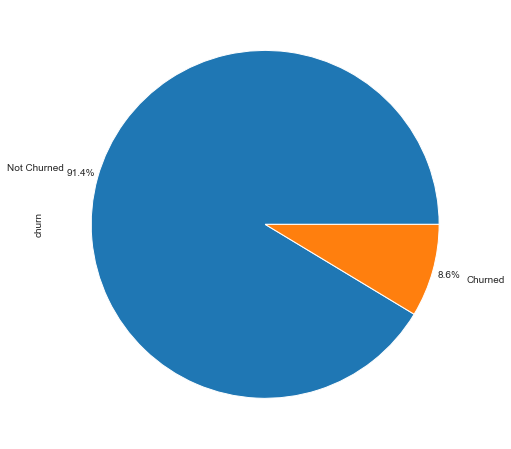

In [37]:
(final_df['churn'].value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, figsize = (8,8), labels = ["Not Churned", "Churned"])

plt.show()

"Churn" feature is highly skewed. To balance this column, will use "class_weight" command during the modeling process instead of using Undersampling/Oversampling.

For easier exploratory analysis, deriving some new features. Taking the average of the first 2 months i.e. Month 6 and Month 7, and will derive a new column for each feature using that. The new feature will be that of the good phase.

In [38]:
month_6 = [] # store all the features with _6 in the end
month_7 = [] # store all the features with _7 in the end

for col in final_df.columns:
    if col.endswith('_6'):
        month_6.append(col)
    elif col.endswith('_7'):
        month_7.append(col)

print('Month 6')
print(month_6) # print all the column names with _6 in the end
print(len(month_6))

print('-------------')

print('Month 7')
print(month_7) # print all the column names with _7 in the end
print(len(month_7))

Month 6
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'sachet_2g_6']
41
-------------
Month 7
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_

In [39]:
final_df.shape

(30011, 134)

In [40]:

for i in range(0,len(month_6)): 
    final_df[month_6[i].rstrip('_6') + '_good_avg'] = (final_df[month_6[i]] + final_df[month_7[i]]) / 2 # strip _6 from end, and add good_avg in the end for the average of the good phase

final_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

Checking the shape of the dataframe after adding the new derived features

In [41]:
final_df.shape

(30011, 175)

Removing the features with _6 and _7 in the end after deriving new features and the old features are no longer required.

In [42]:
final_df.drop(month_6, axis = 1, inplace = True)
final_df.drop(month_7, axis = 1, inplace = True)
final_df.shape

(30011, 92)

Inspecting the final dataframe

In [43]:
final_df.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
13     7002191713   593.260       534.24        482.46          72.11   
16     7000875565   187.894        70.61        162.76           0.00   
17     7000187447    25.499         7.79          5.54           4.81   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   
17          13.34              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
13              0.49        353.99            498.23            156.94   
16              0.00        205.93              3.23             18.29   
17              0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
13              0.00        655.18          1.29          4.78          0.0   
16              0.00         21.53          0.00          5.91          0.0   
17              0.00          0.00          0.00          0.00          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
13         1015.26             52.58            195.18              7.49   
16          233.38             28.89            150.16             32.71   
17            0.00              0.00              0.00              0.00   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
13        255.26            154.58            317.91              1.91   
16        211.78              6.33             73.93              2.18   
17          0.00              0.00              0.00              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
13        474.41         1144.53           0.0        393.39        21.44   
16         82.44          294.46           0.0          0.23         0.00   
17          0.00            0.00           0.0          0.00         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
7                  7              3638            1580                 779   
8                 14               120              30                  10   
13                11               717             130                   0   
16                 2               160             130                 130   
17                 4                30              30                   0   

    total_rech_data_8  max_rech_data_8  count_rech_2g_8  av_rech_amt_data_8  \
7                 NaN              NaN              NaN                 NaN   
8                 3.0             23.0              3.0                69.0   
13                3.0             23.0              3.0                69.0   
16                NaN              NaN      

In [44]:
final_df.describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count   3.001100e+04  30011.000000  29073.000000  29073.000000   29073.000000   
mean    7.001223e+09    534.857433    276.234168    387.121245      13.683965   
std     6.846405e+05    492.259586    471.505518    480.279273      75.706579   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.000000   
25%     7.000641e+09    289.609500     32.210000    107.660000       0.000000   
50%     7.001232e+09    452.091000    106.280000    251.360000       0.000000   
75%     7.001814e+09    671.150000    309.980000    493.510000       0.000000   
90%     7.002167e+09    985.202000    744.754000    866.450000      20.322000   
95%     7.002287e+09   1258.555500   1130.686000   1201.226000      65.988000   
99%     7.002387e+09   1987.934400   2220.414000   2233.063600     291.368000   
max     7.002411e+09  33543.624000  10752.560000  14007.340000    4169.810000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
count   29073.000000      29073.000000      29073.000000      29073.000000   
mean       22.161948         89.951446        172.998297          6.703844   
std       107.874014        237.947663        236.653042         20.509418   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          7.230000         26.840000          0.000000   
50%         0.000000         30.830000         95.910000          0.310000   
75%         0.000000         87.540000        229.610000          4.980000   
90%        39.596000        201.530000        423.922000         17.360000   
95%       118.748000        331.118000        592.560000         32.090000   
99%       445.150000        974.206400       1102.934000         87.473600   
max      5337.040000      10752.560000       4961.330000        928.490000   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
count      29073.000000  29073.000000      29073.000000      29073.000000   
mean           1.767998    269.662288        177.752086        185.362328   
std            7.509452    369.341135        415.409296        422.152597   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000     45.360000          0.000000          0.460000   
50%            0.000000    157.330000          7.790000         27.240000   
75%            0.110000    357.360000        143.340000        174.780000   
90%            4.650000    643.560000        583.156000        549.400000   
95%            9.634000    895.752000        957.232000        901.682000   
99%           29.179600   1711.240400       1969.239600       1925.018000   
max          351.830000  11039.910000       8014.430000      13950.040000   

       std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
count      29073.000000  29073.000000  29073.000000  29073.000000   
mean           1.847471    364.965911      2.094787      7.107334   
std           11.883145    622.748058     45.510330     23.225842   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      3.130000      0.000000      0.000000   
50%            0.000000     84.730000      0.000000      0.680000   
75%            0.000000    501.780000      0.000000      6.710000   
90%            1.880000   1076.228000      0.000000     18.506000   
95%            7.490000   1540.370000      0.630000     30.780000   
99%           40.090000   2834.839600     32.440000     74.810800   
max          516.910000  13980.060000   5681.540000   1390.880000   

        og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
count  29073.000000    30011.000000      29073.000000      29073.000000   
mean       0.061039      623.774684         68.064333        158.585128   
std        3.373442      685.983313        157.735902        218.709960   
min        0.000000        0.000000        

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mobile_number              30011 non-null  int64  
 1   arpu_8                     30011 non-null  float64
 2   onnet_mou_8                29073 non-null  float64
 3   offnet_mou_8               29073 non-null  float64
 4   roam_ic_mou_8              29073 non-null  float64
 5   roam_og_mou_8              29073 non-null  float64
 6   loc_og_t2t_mou_8           29073 non-null  float64
 7   loc_og_t2m_mou_8           29073 non-null  float64
 8   loc_og_t2f_mou_8           29073 non-null  float64
 9   loc_og_t2c_mou_8           29073 non-null  float64
 10  loc_og_mou_8               29073 non-null  float64
 11  std_og_t2t_mou_8           29073 non-null  float64
 12  std_og_t2m_mou_8           29073 non-null  float64
 13  std_og_t2f_mou_8           29073 non-null  flo

### Outlier Treatment

Plotting boxplots for each feature and then treating the outliers.

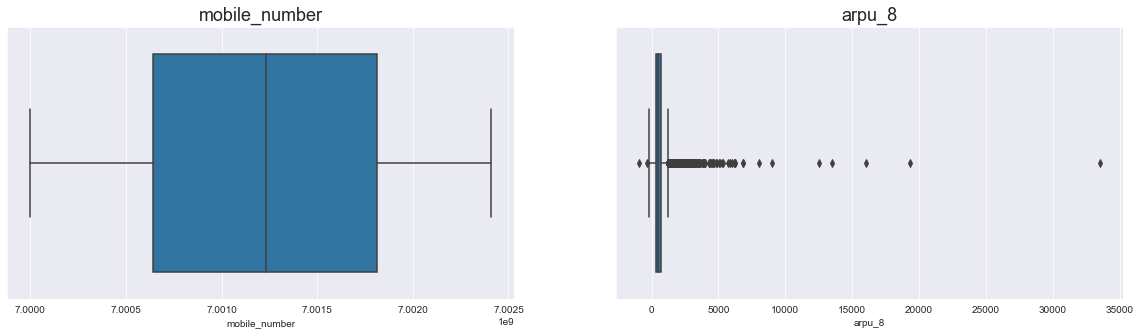

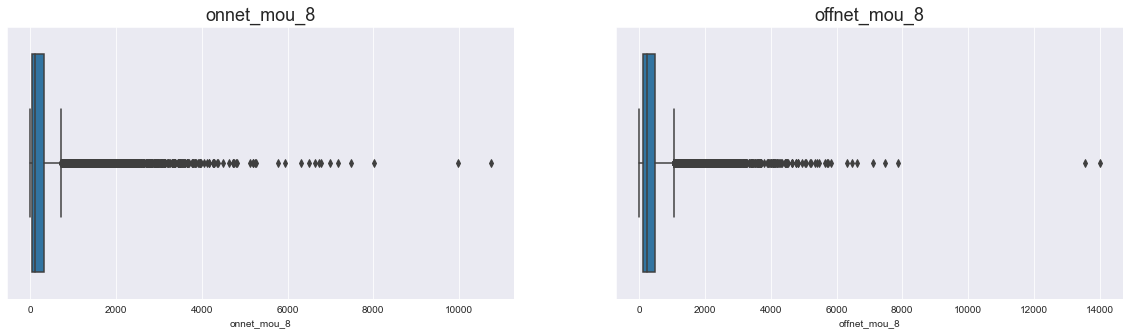

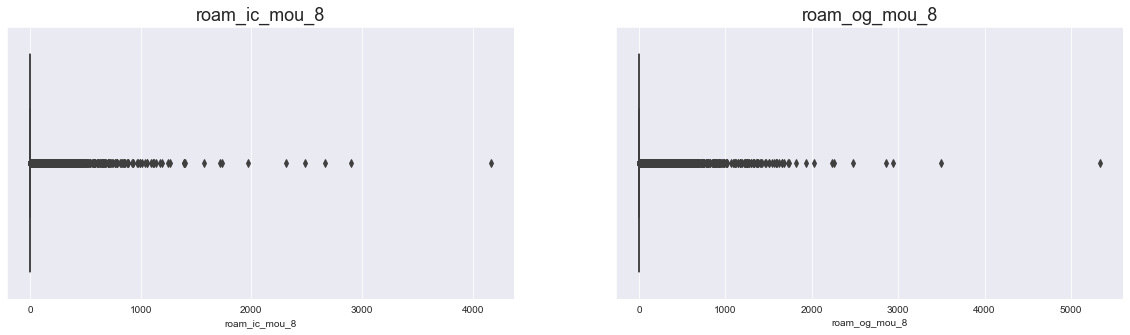

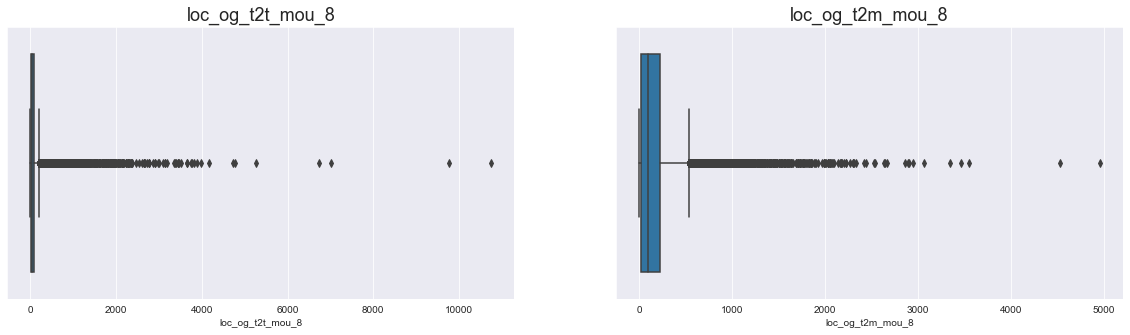

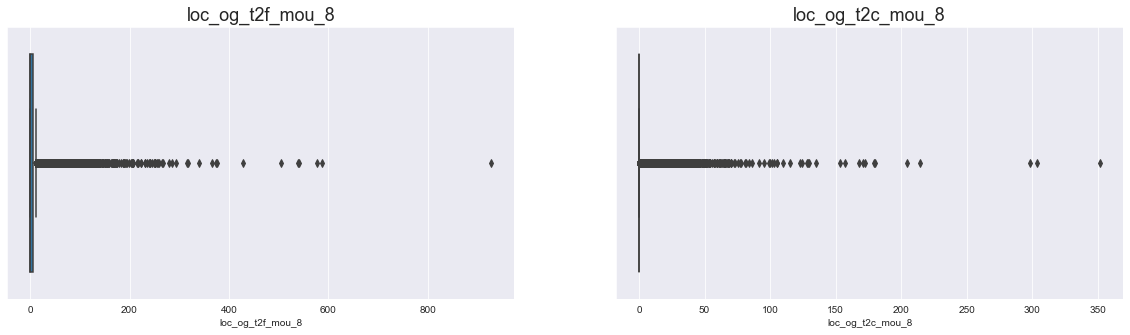

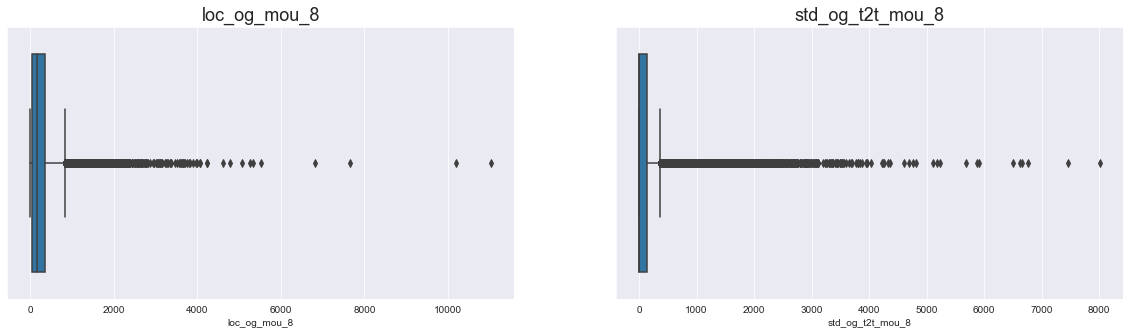

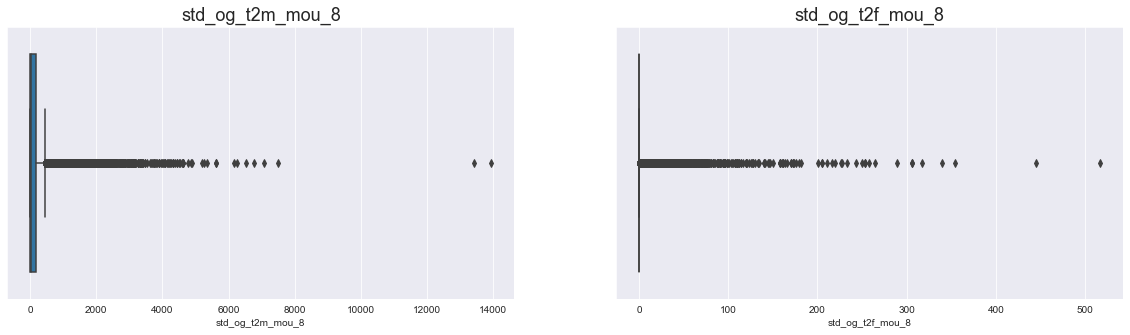

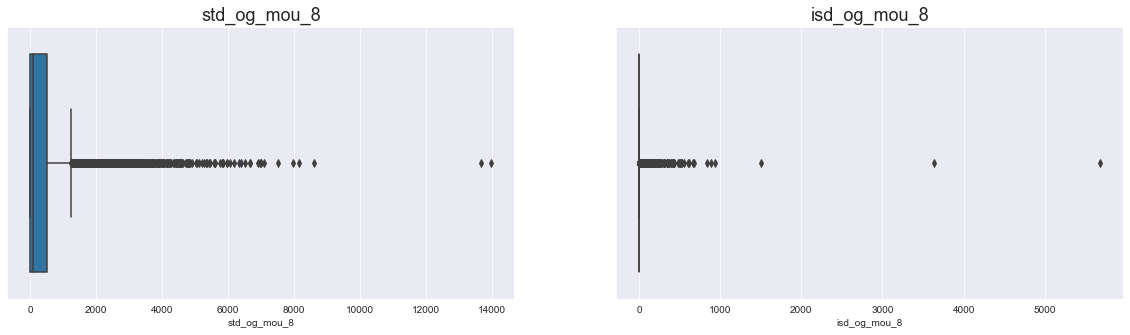

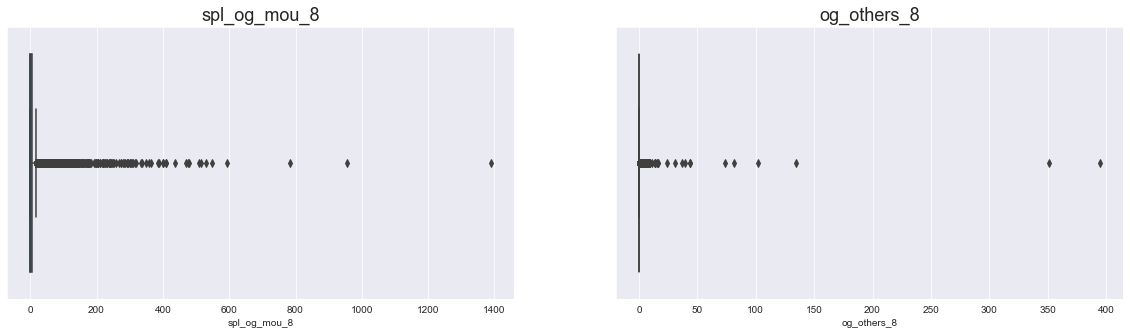

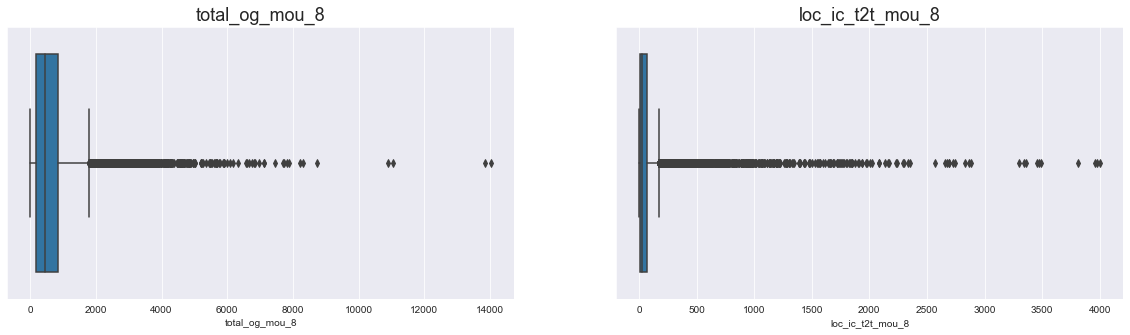

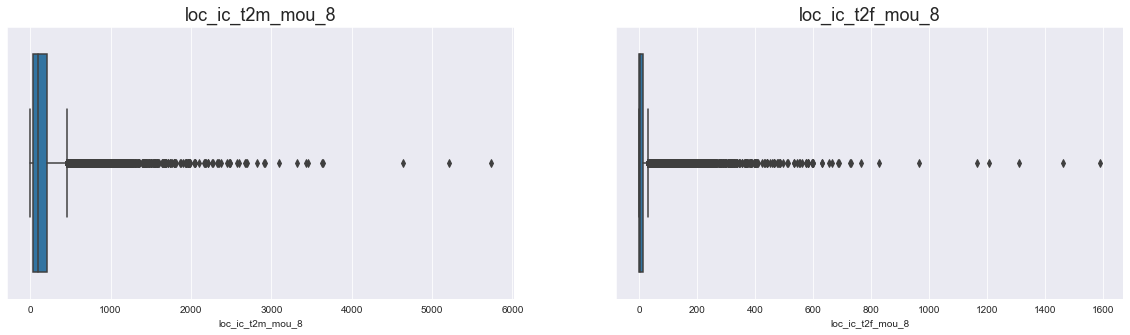

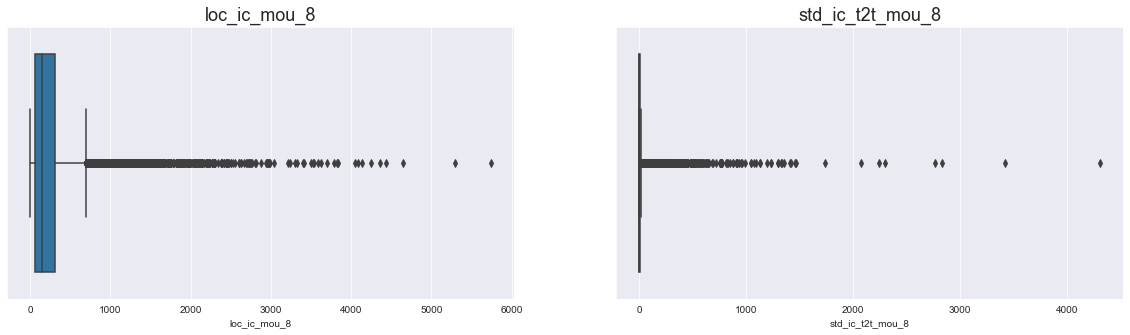

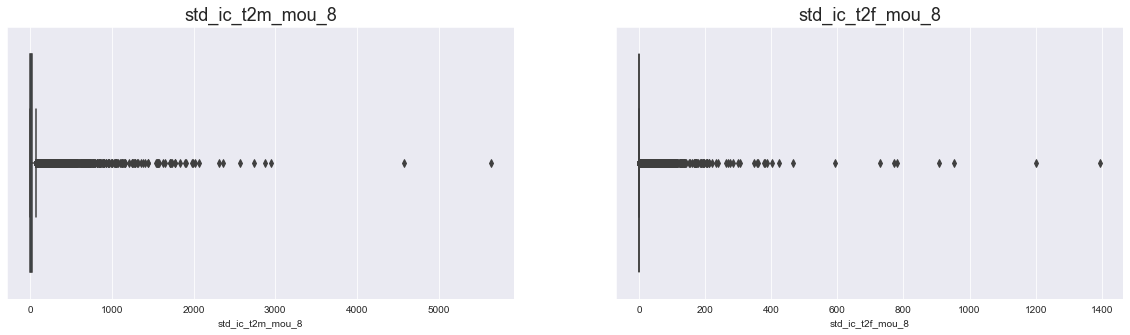

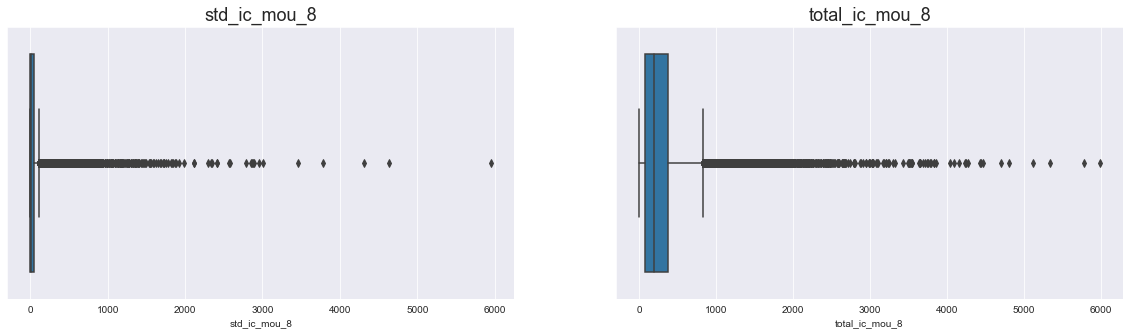

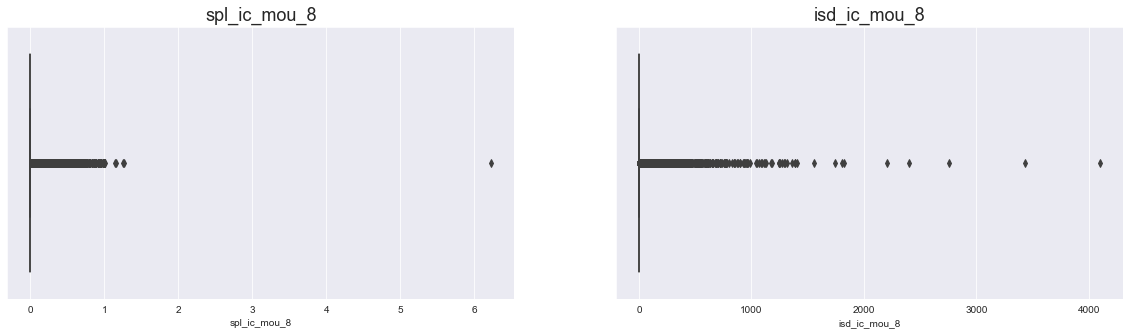

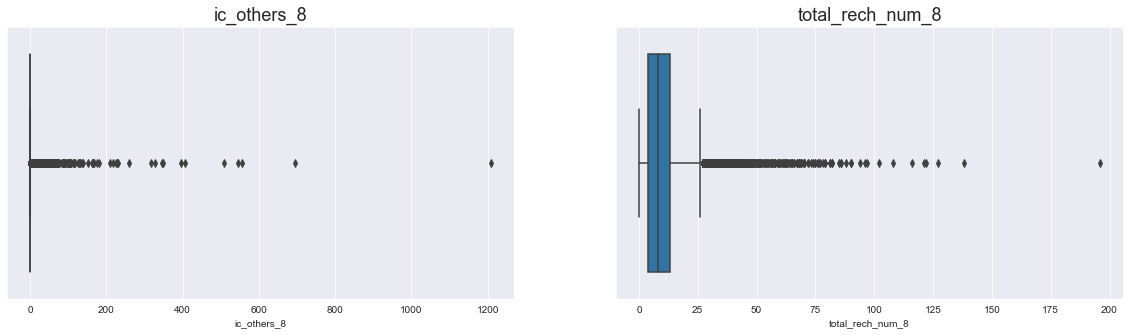

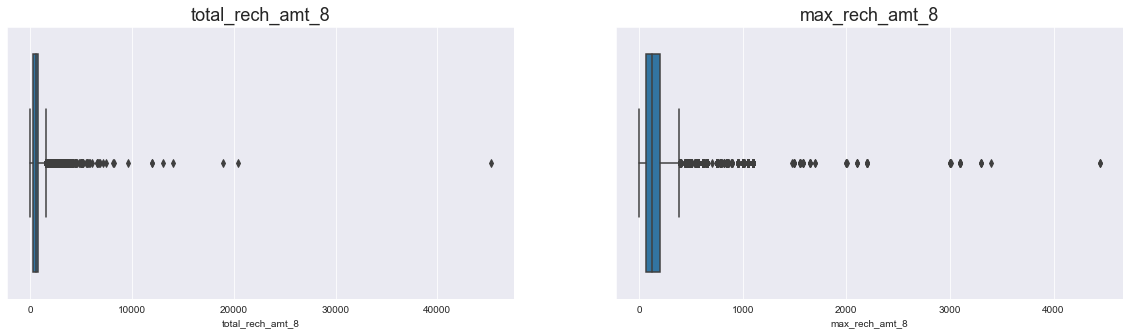

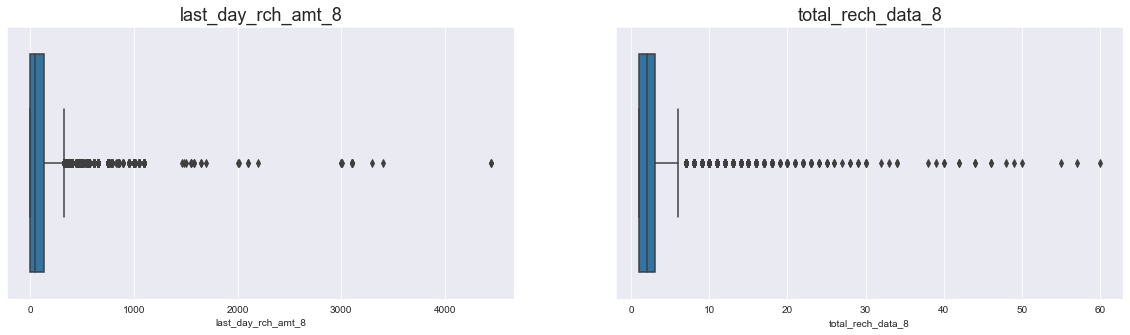

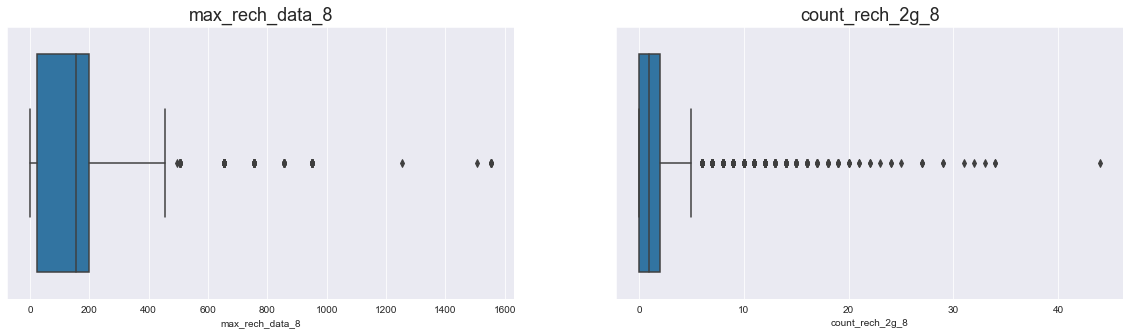

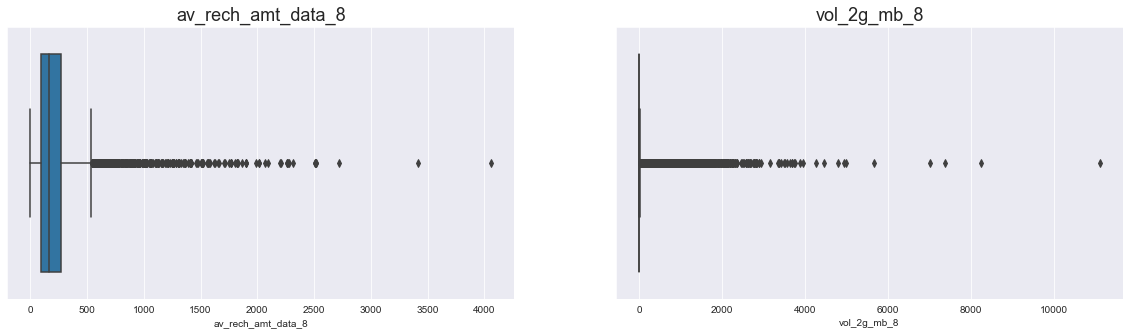

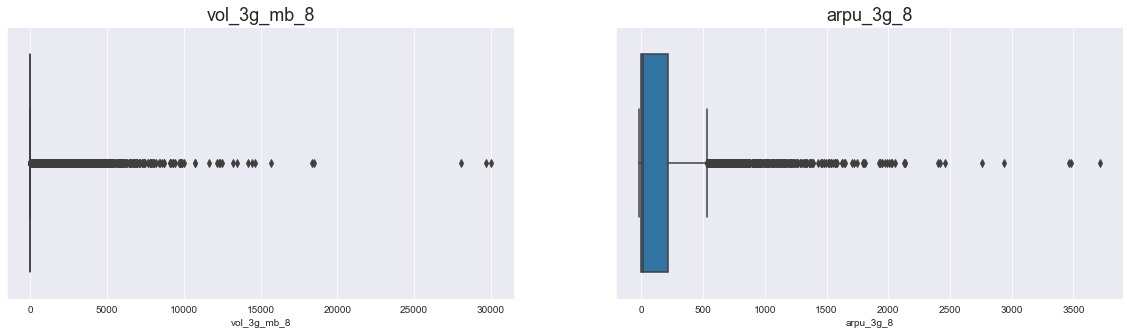

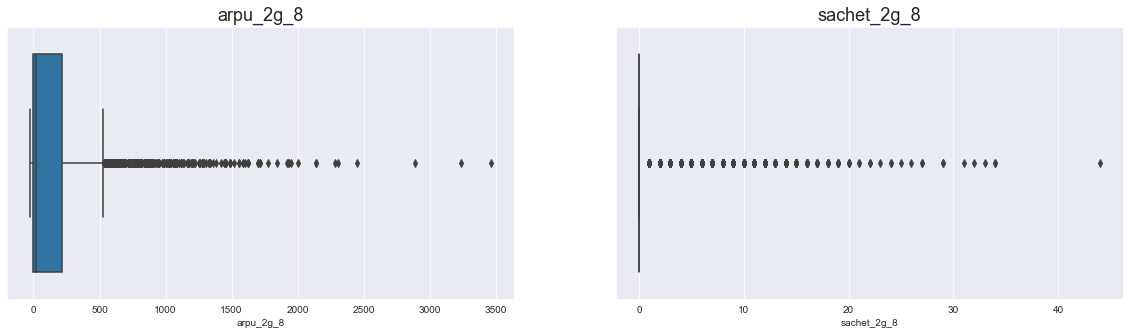

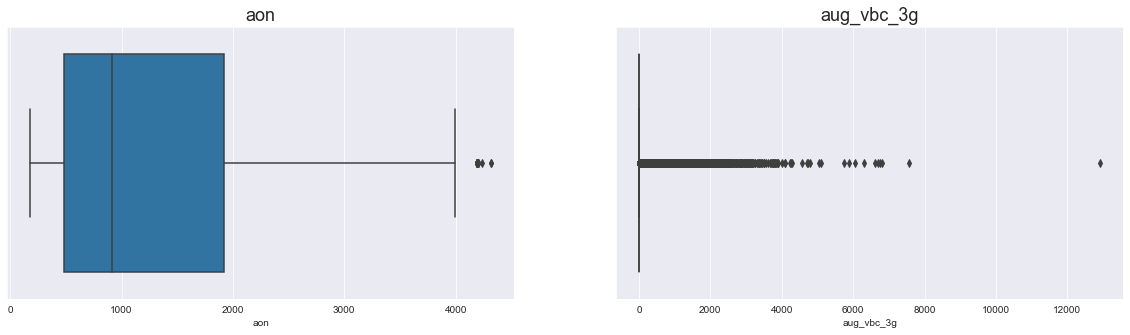

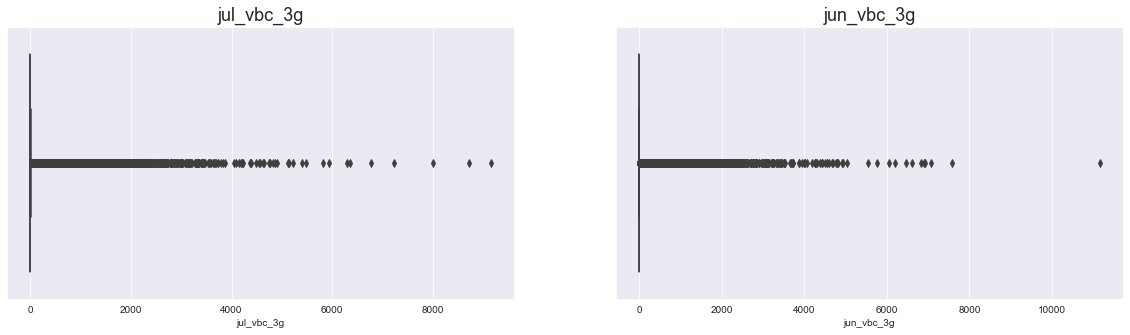

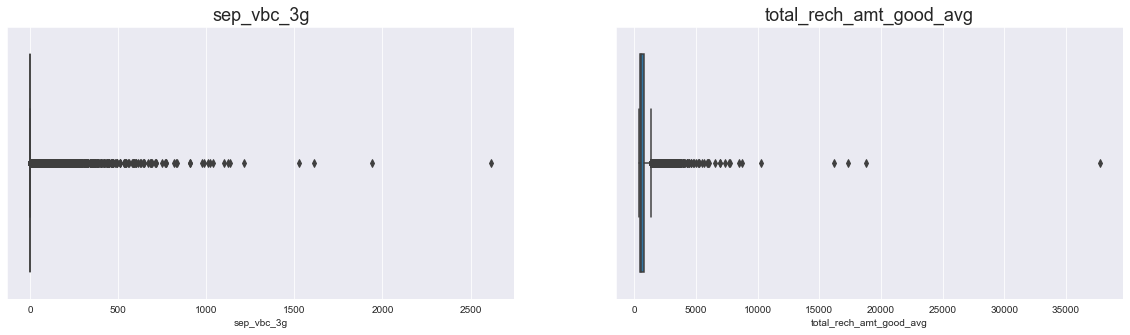

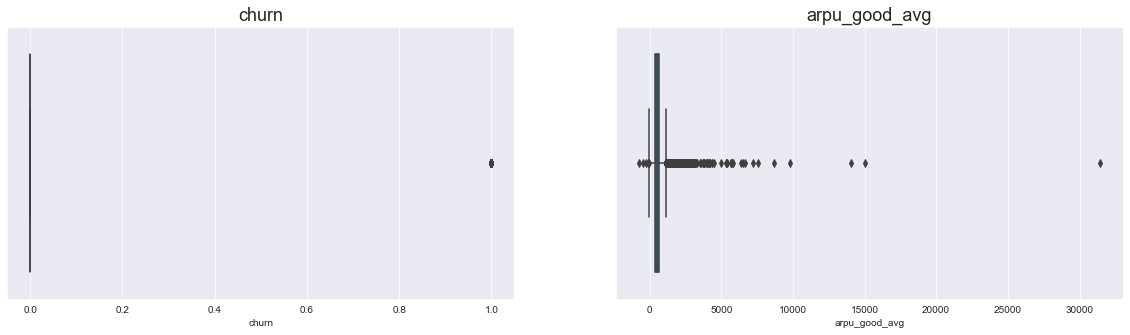

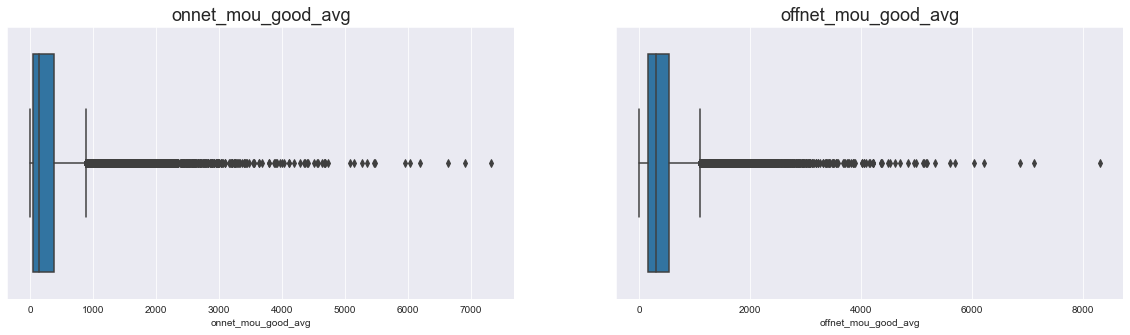

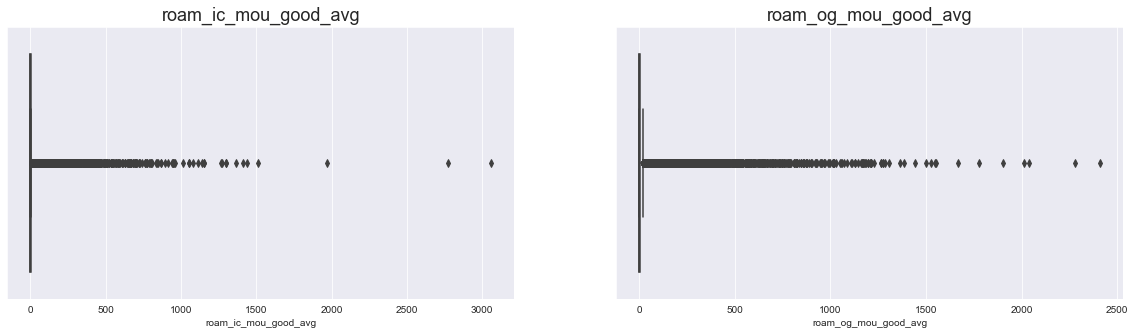

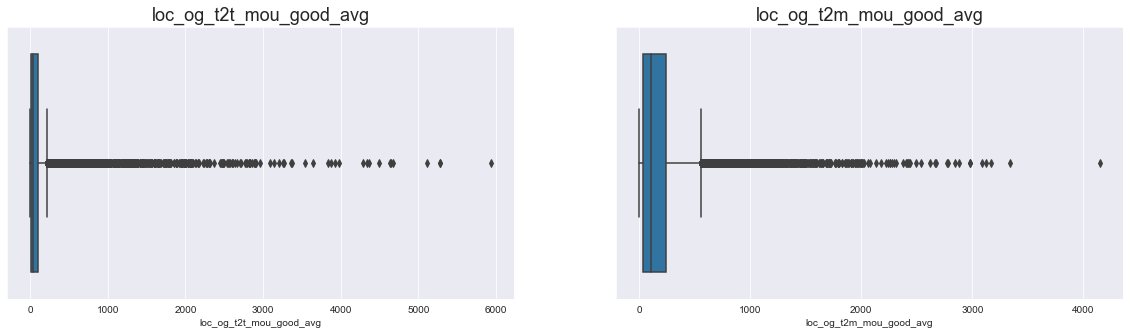

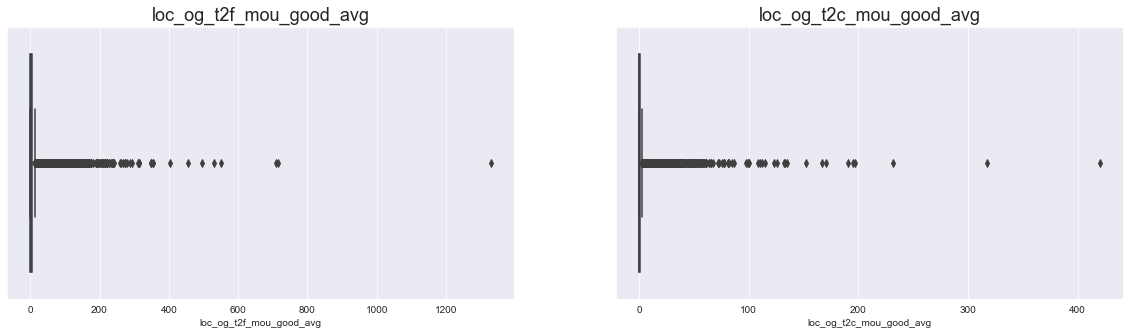

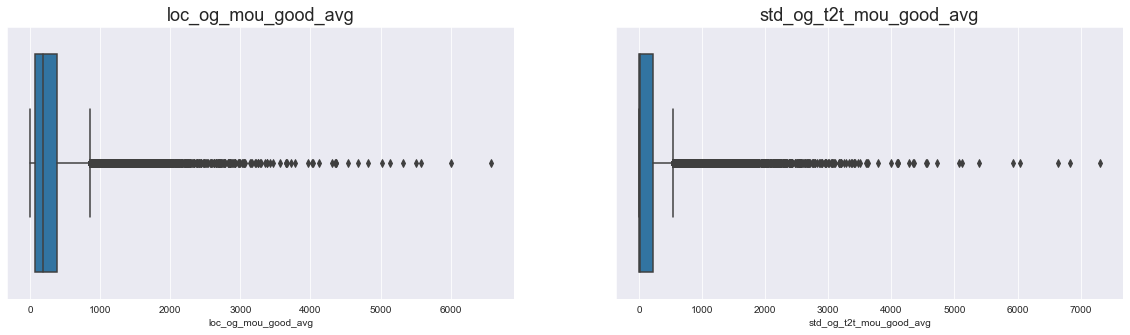

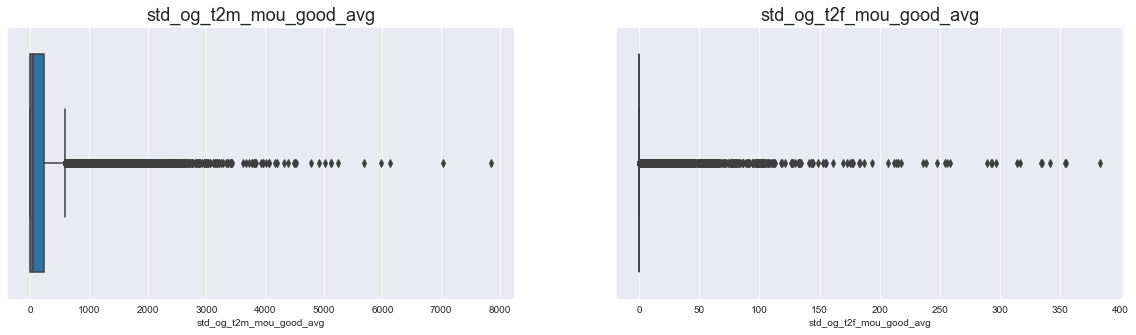

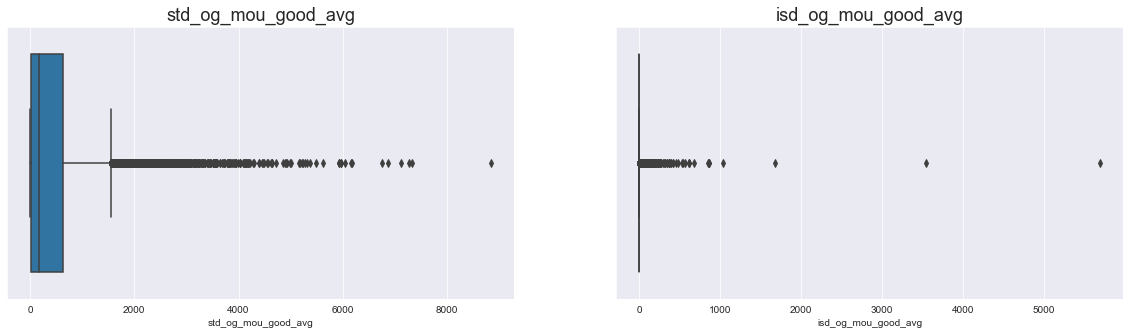

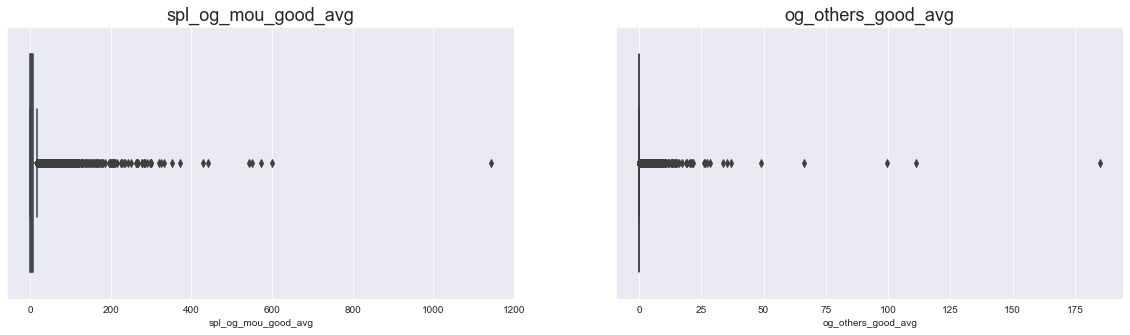

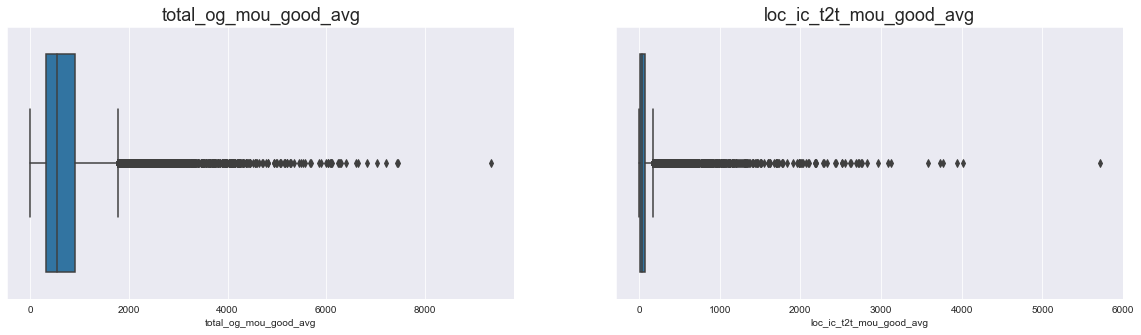

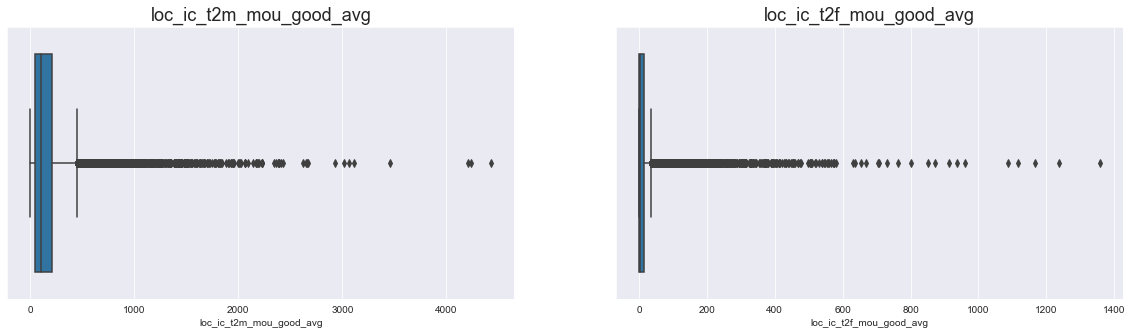

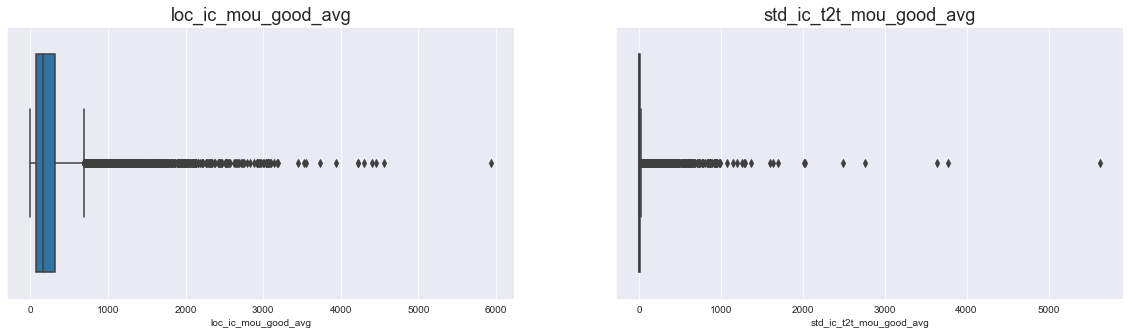

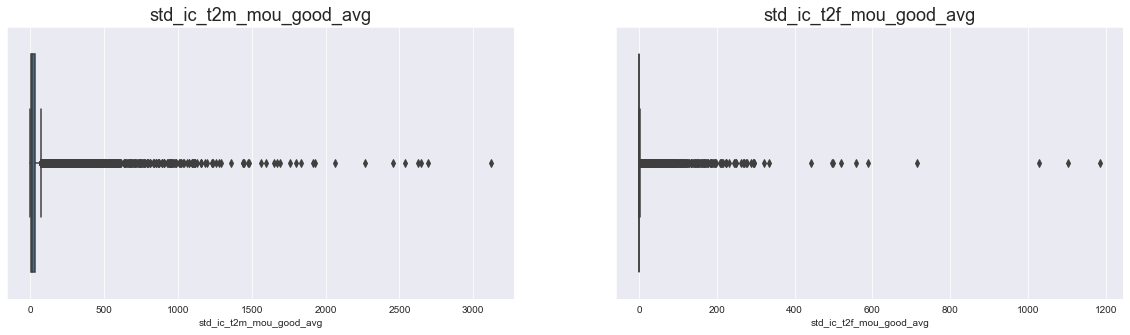

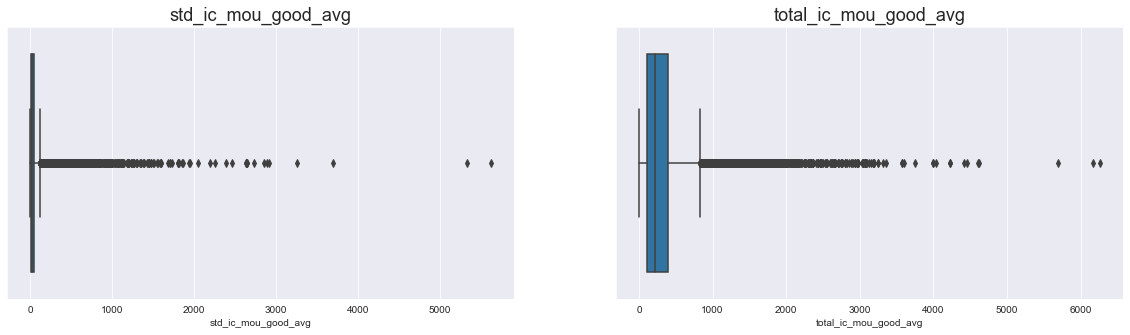

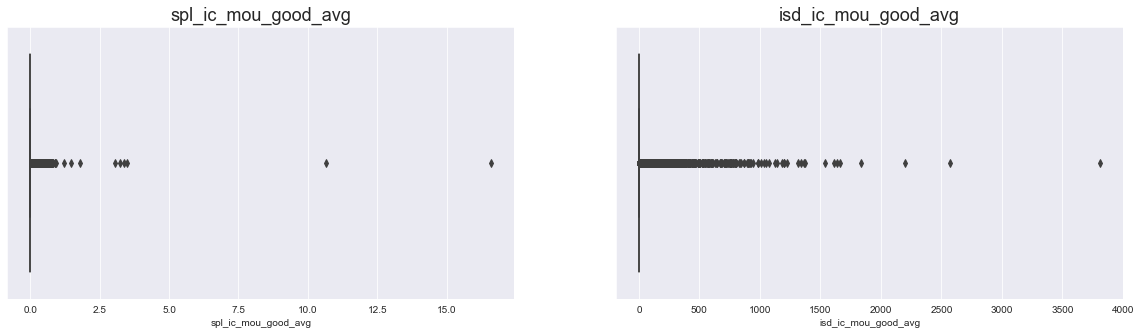

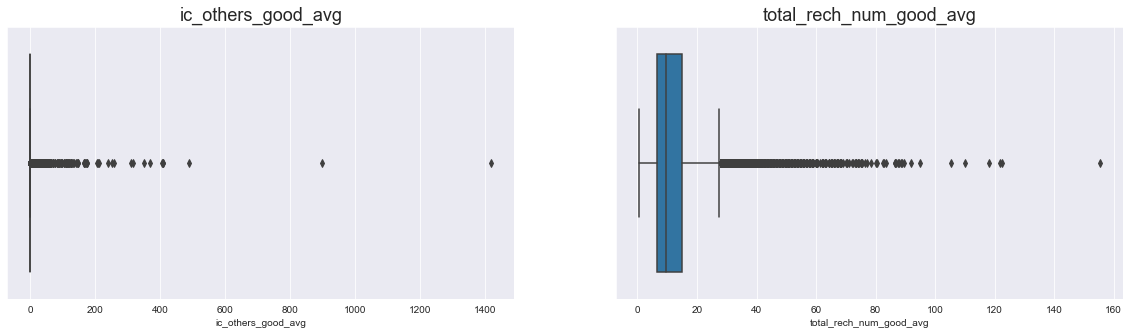

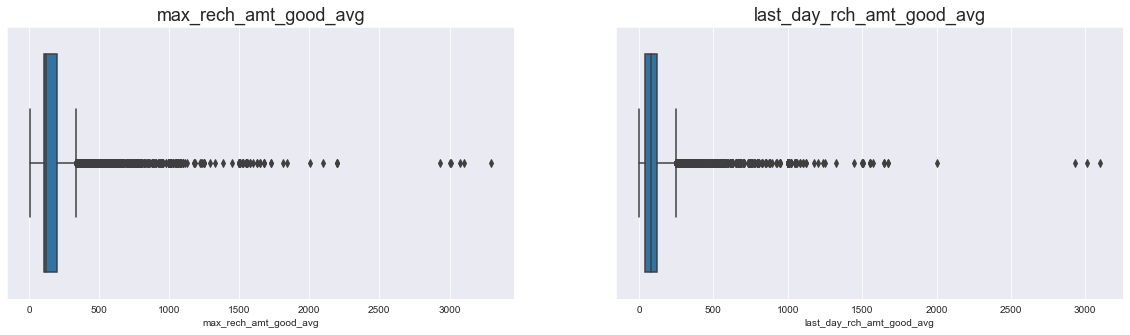

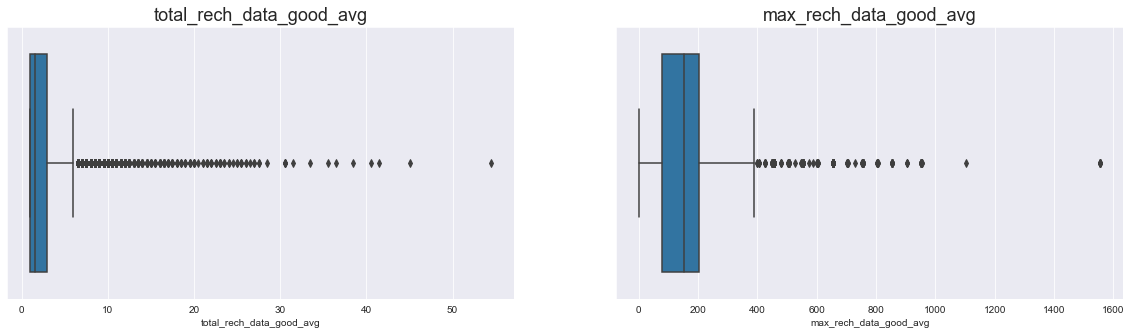

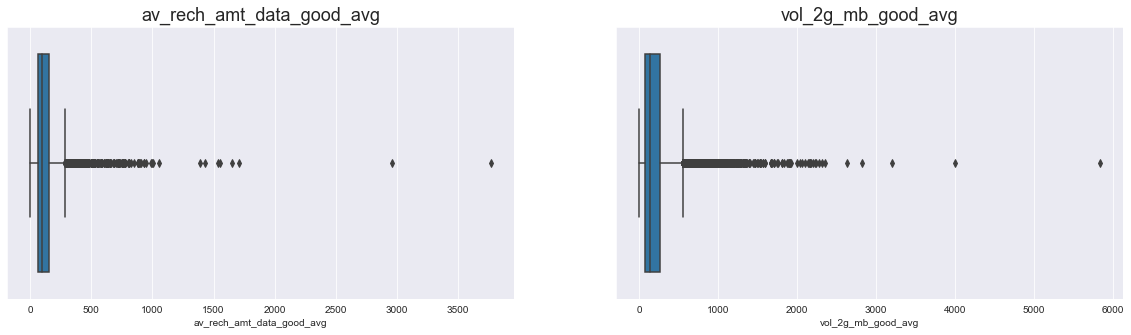

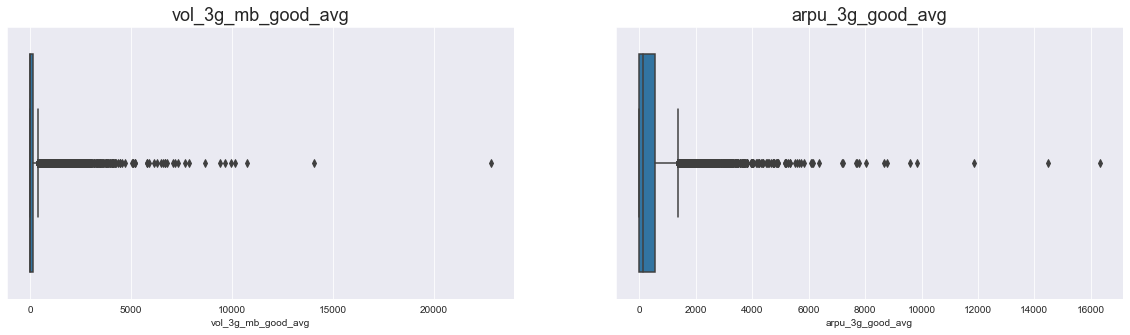

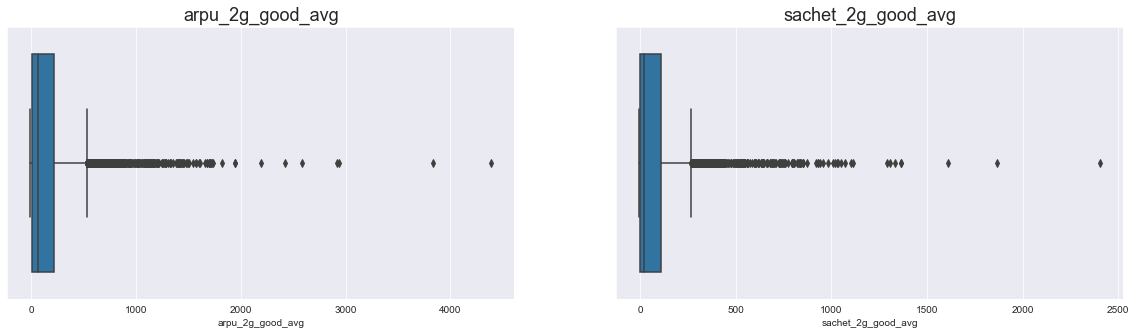

In [46]:
cols = final_df.columns # get all the columns

for i in range(0,len(cols),2): # printing 2 plots in a single row, hence the step of 2
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18) # column name being the title
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18) # column name being the title
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

It seems every column has outliers on the higher side. So instead of removing these rows, capping the outliers to the 95th percentile value.

In [38]:
for col in cols:
    if col!="churn": # we don't want to change the churn column
        val = final_df[col].quantile(0.95) # get the value of each column's 95th percentile value
        final_df[col][final_df[col] >= val] = val # assigning anything above the 95th percentile value to 95th percentile value

Checking outliers again using boxplot

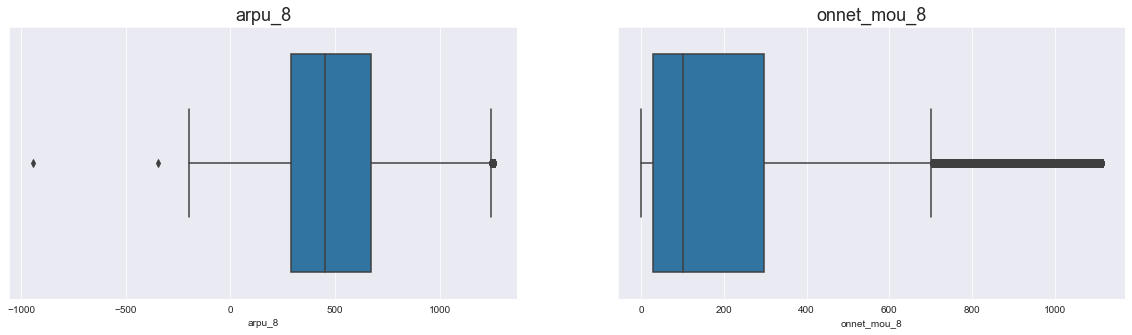

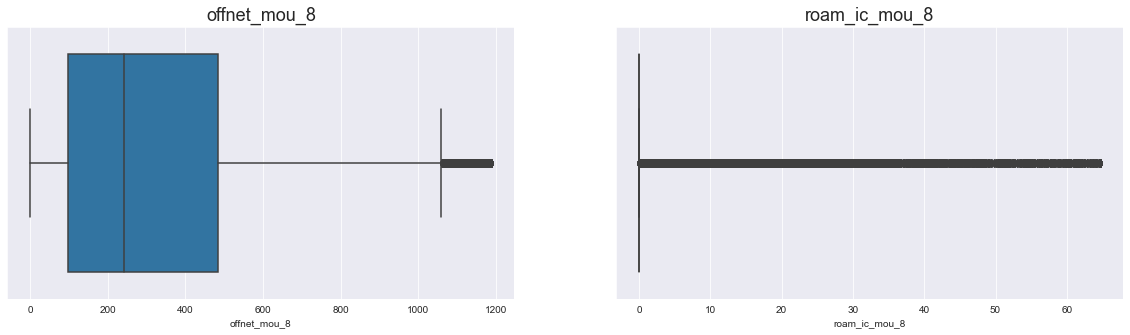

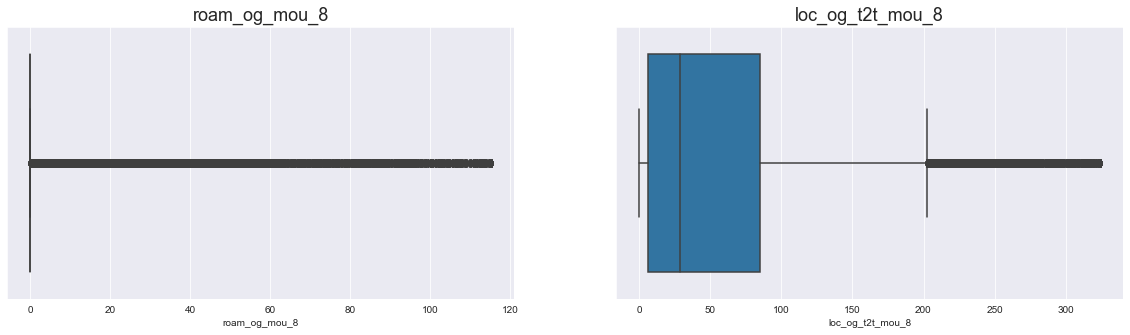

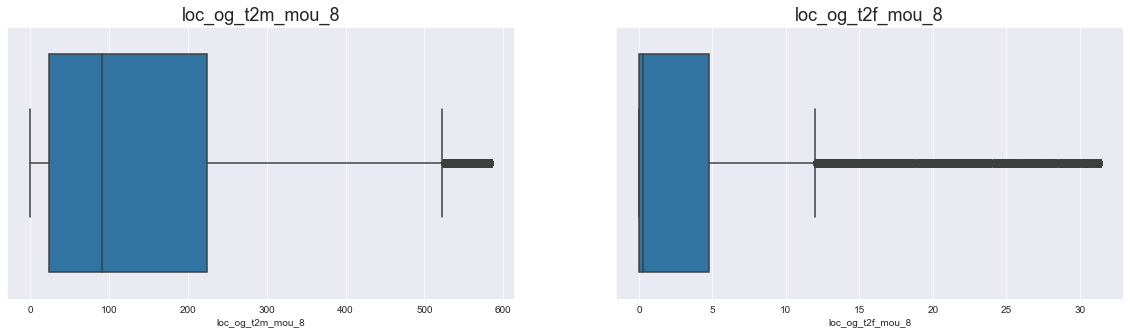

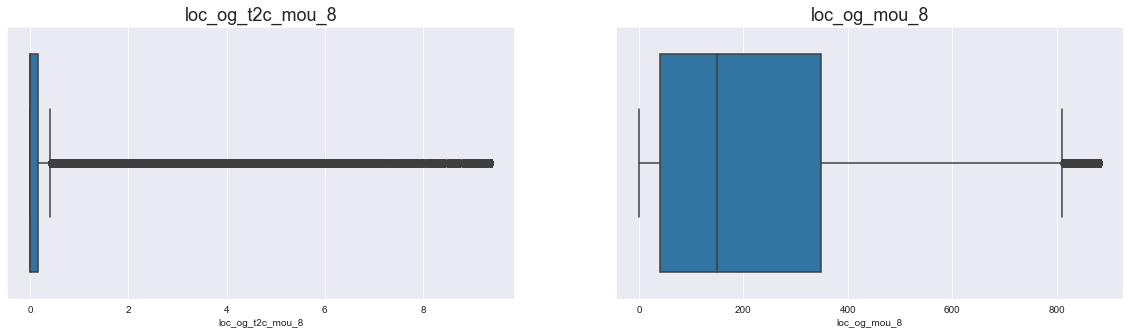

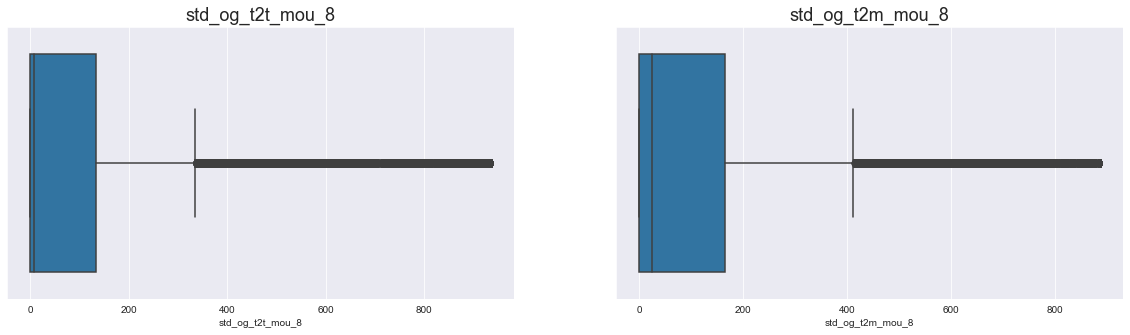

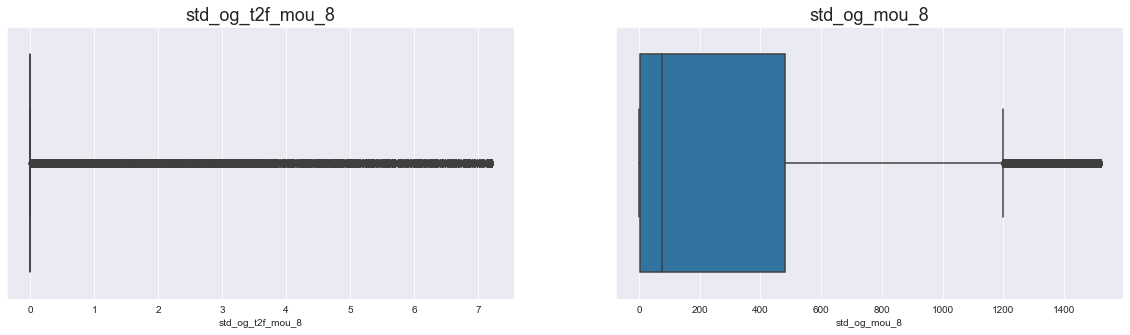

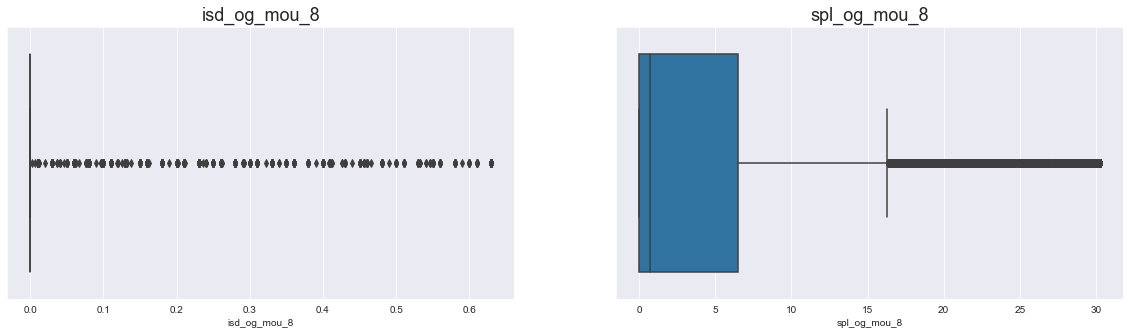

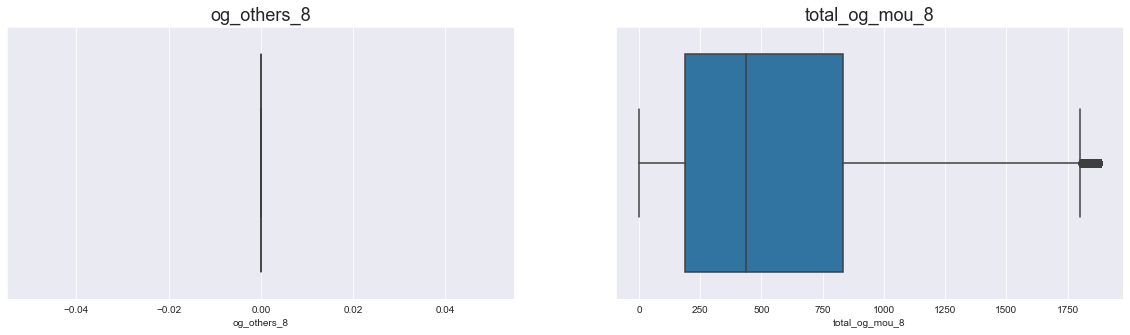

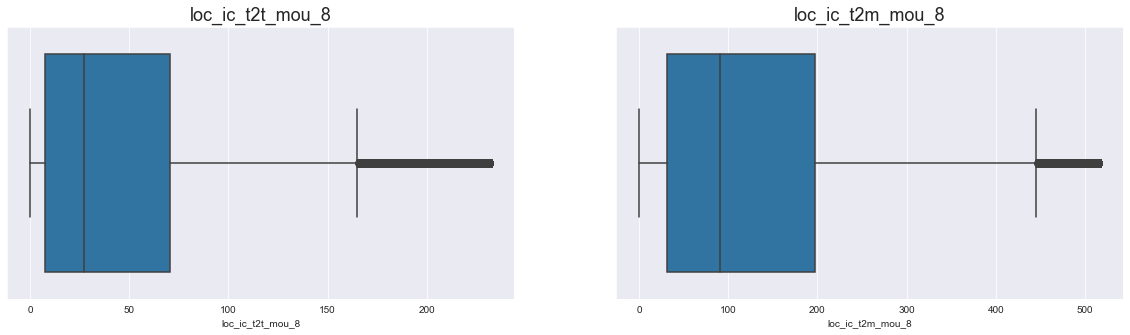

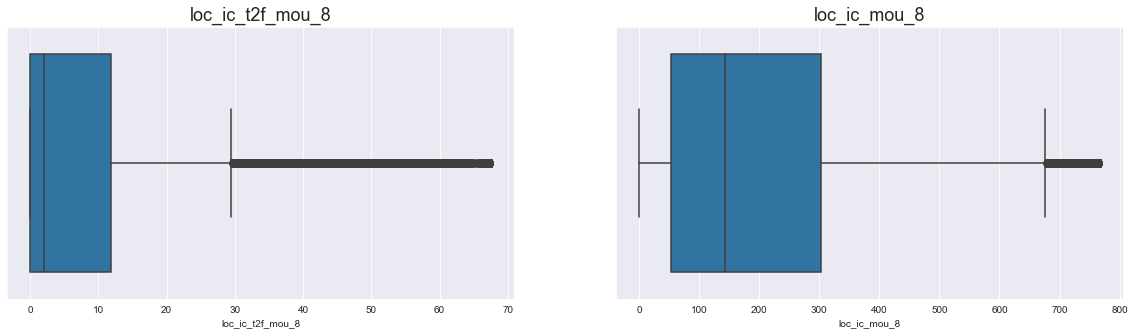

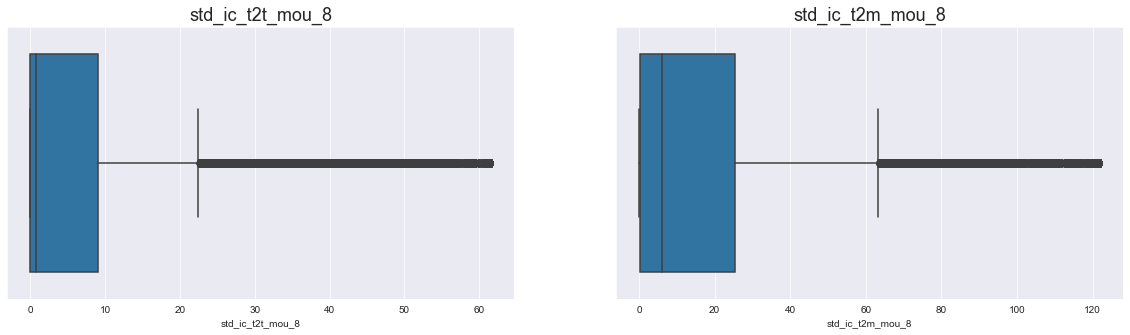

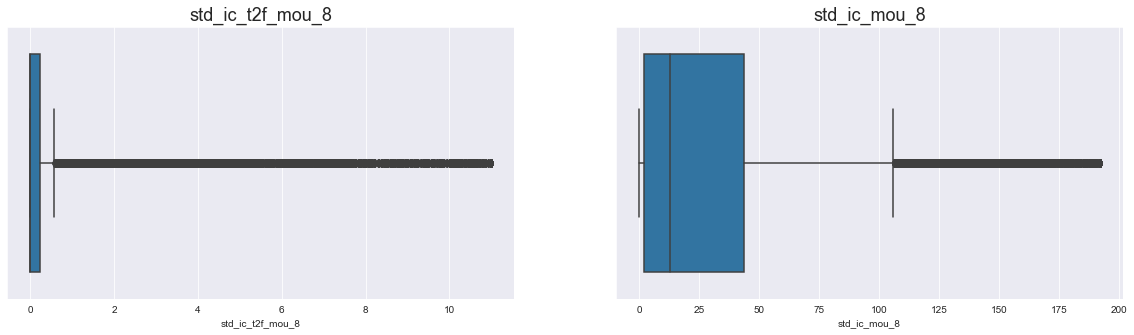

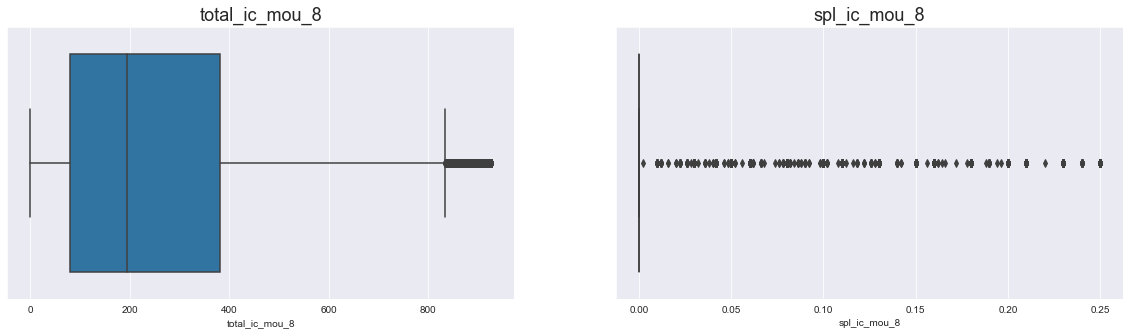

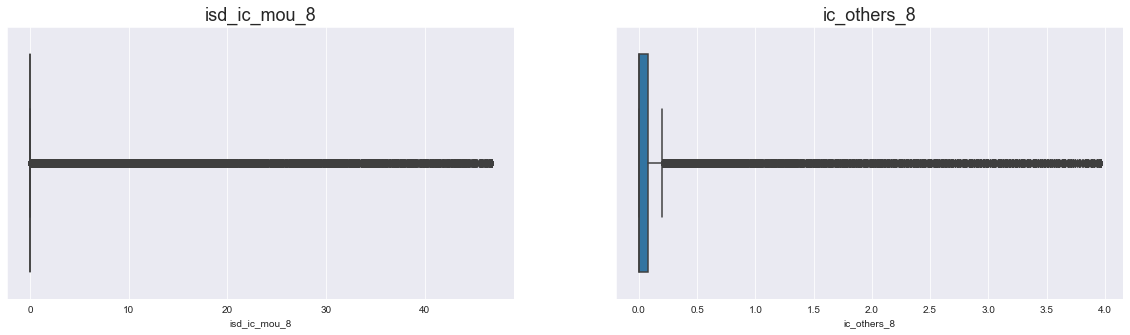

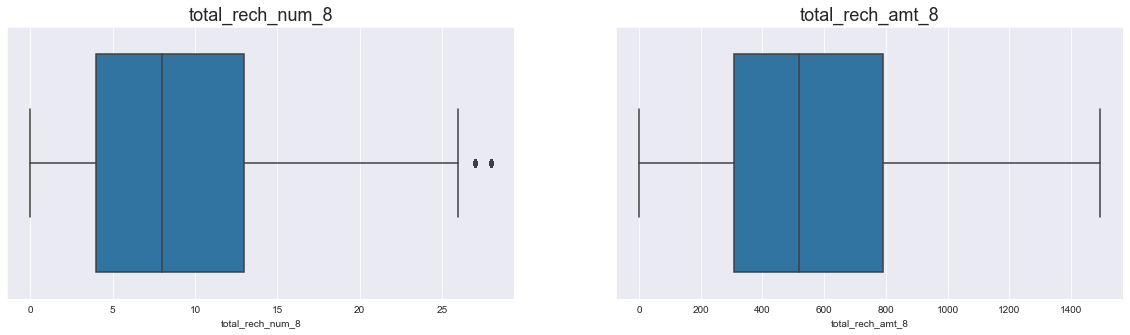

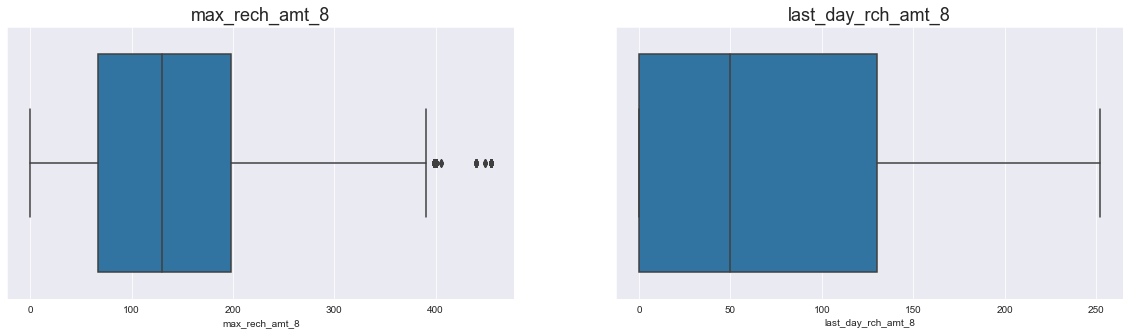

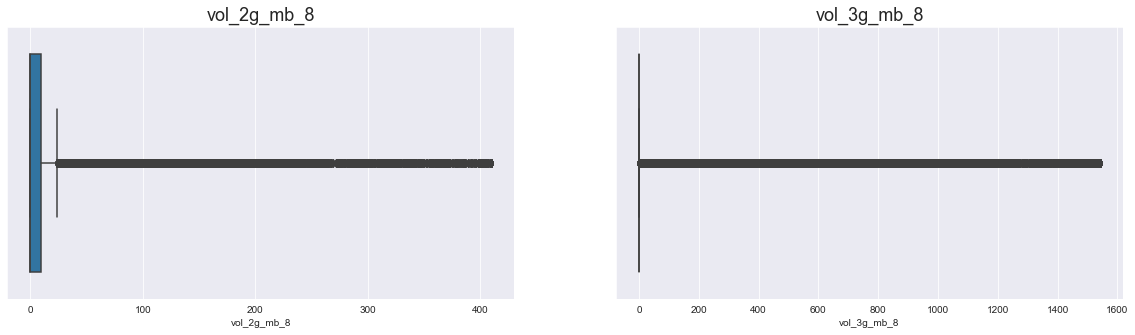

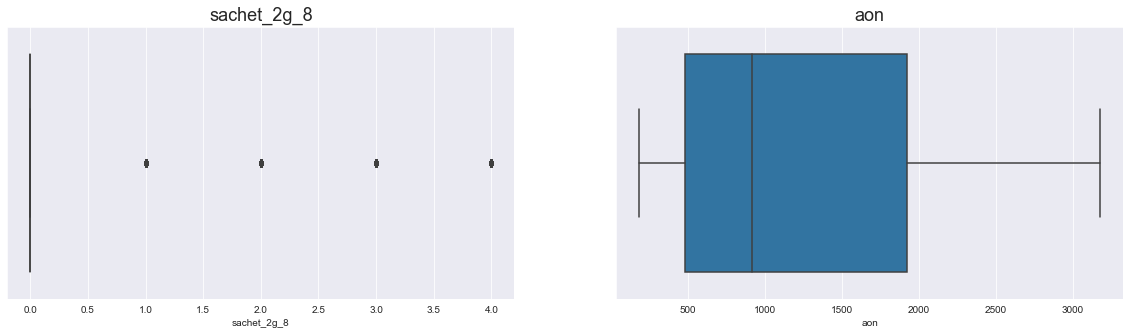

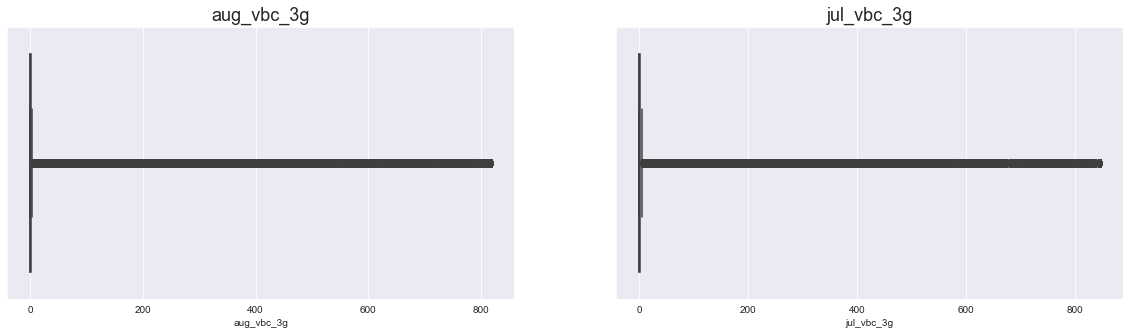

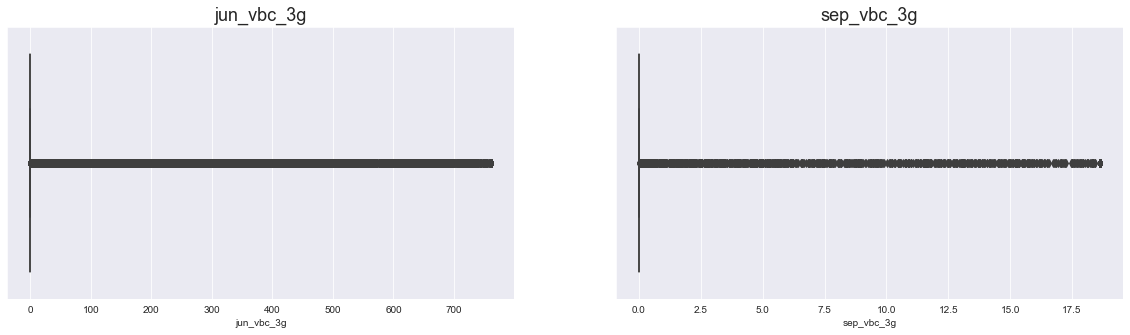

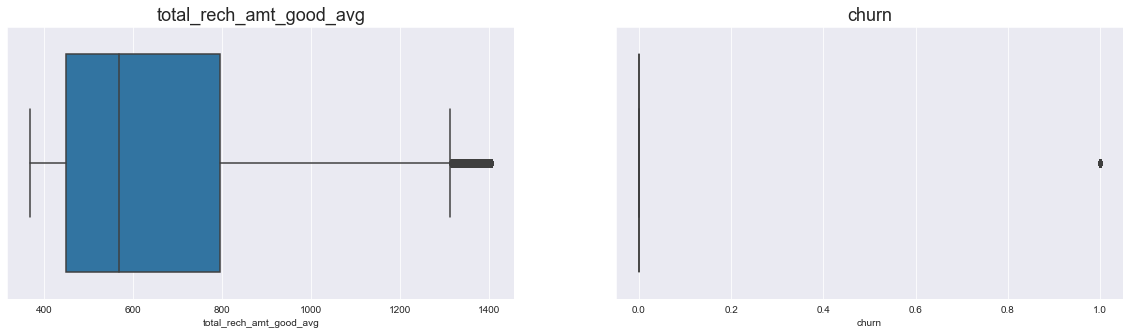

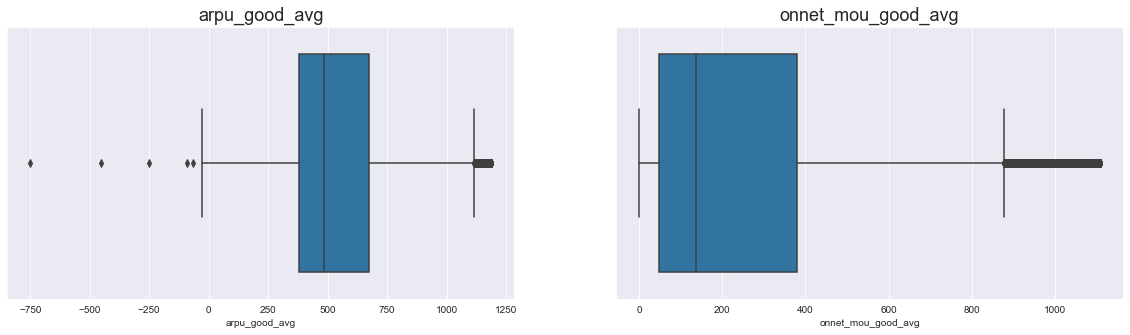

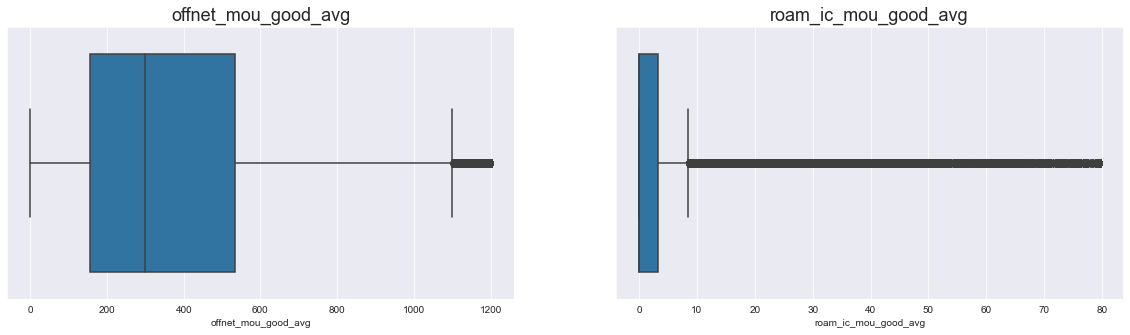

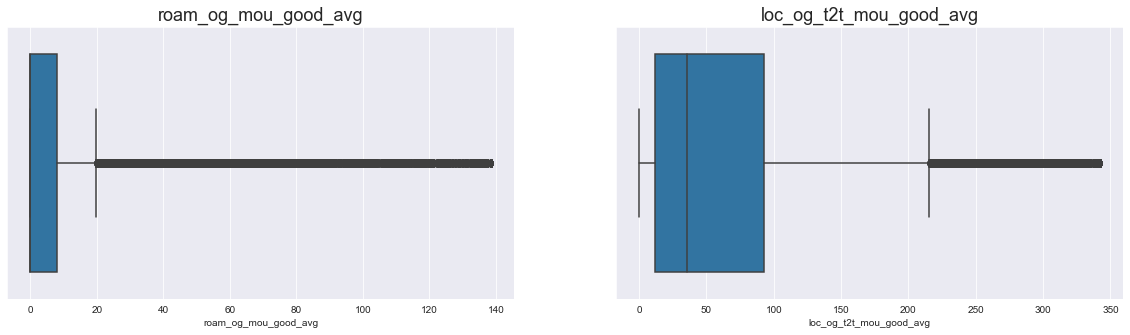

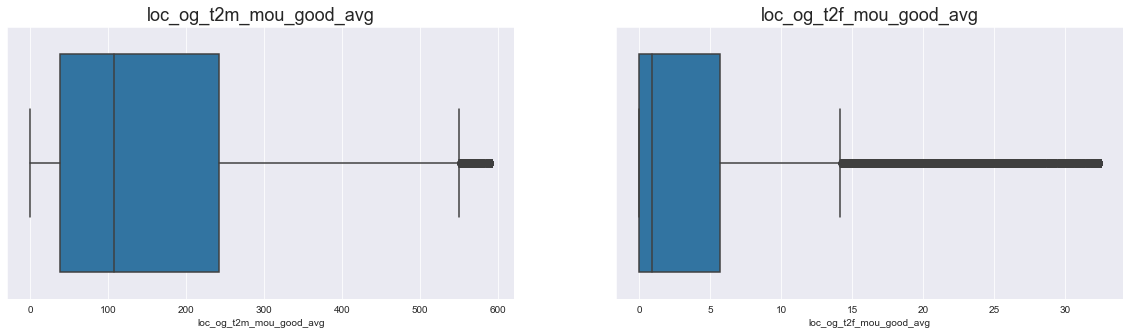

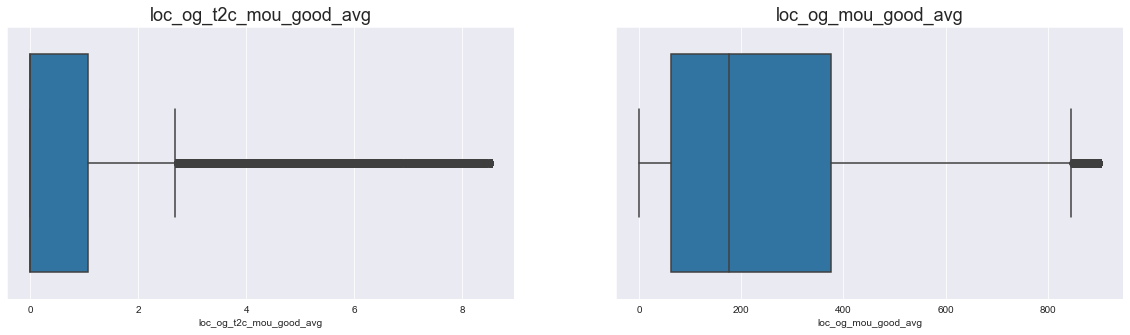

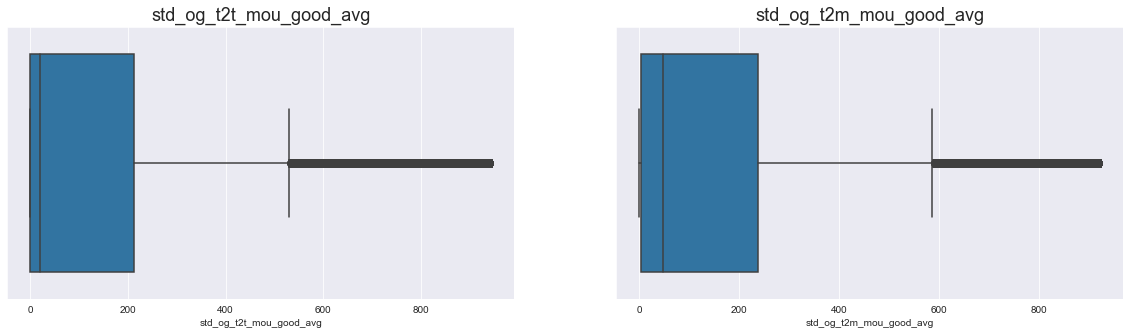

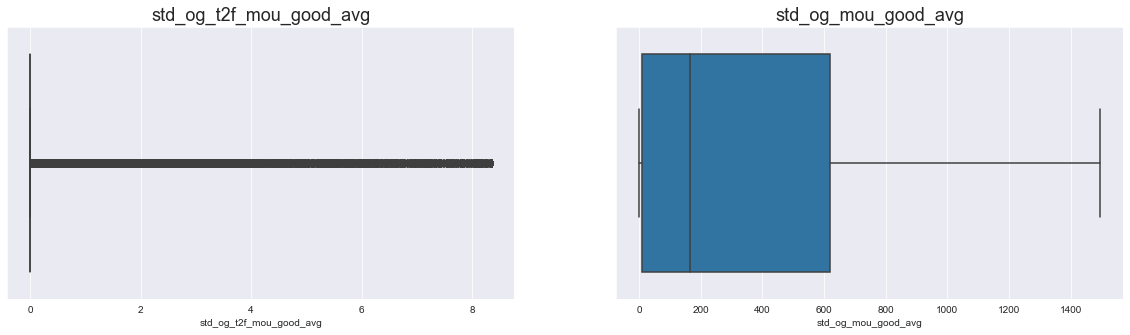

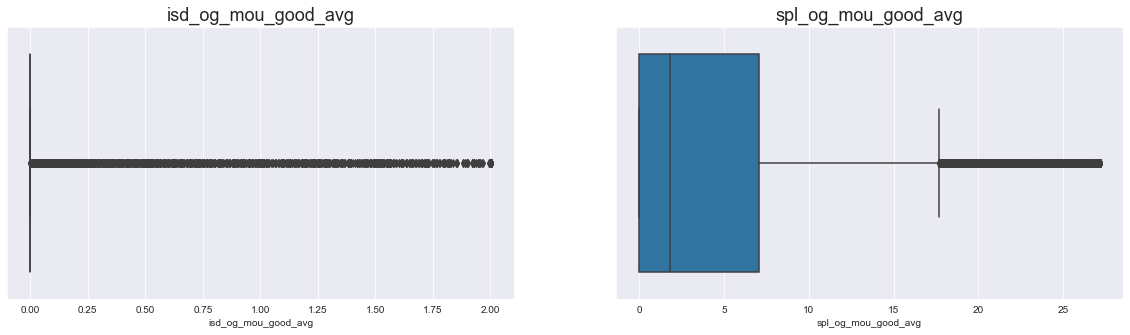

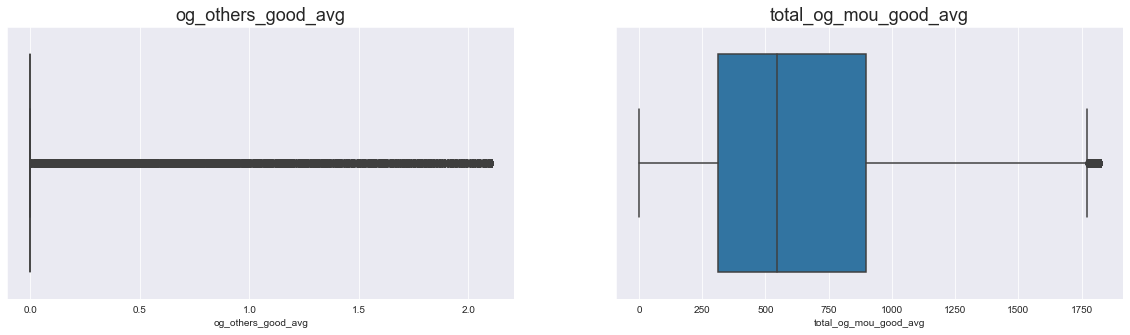

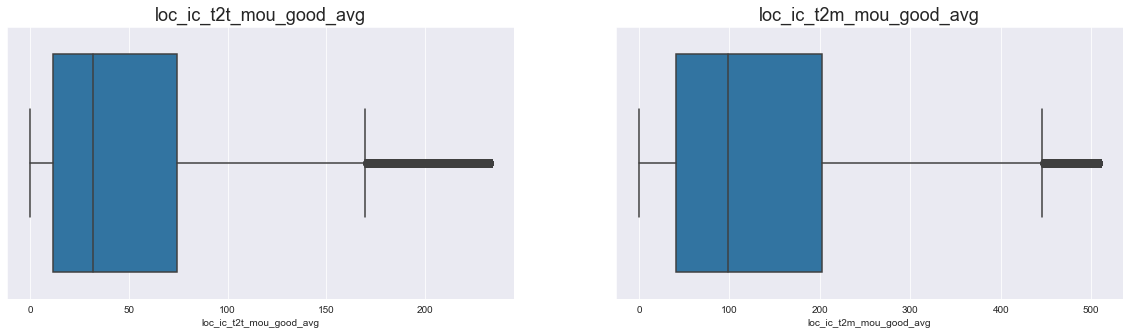

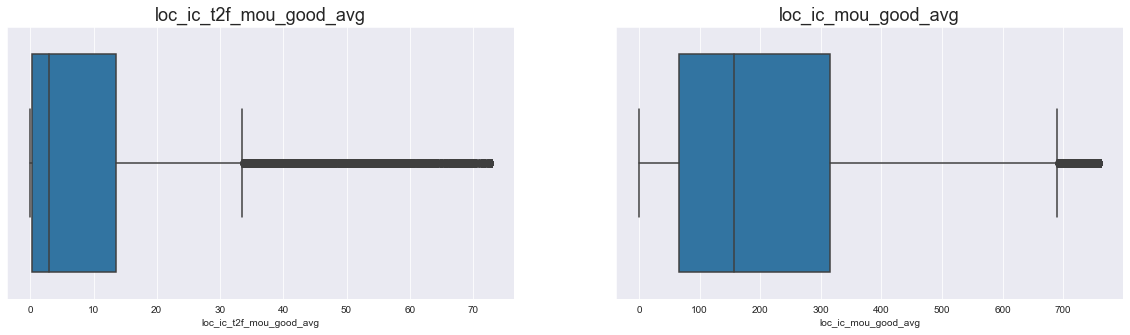

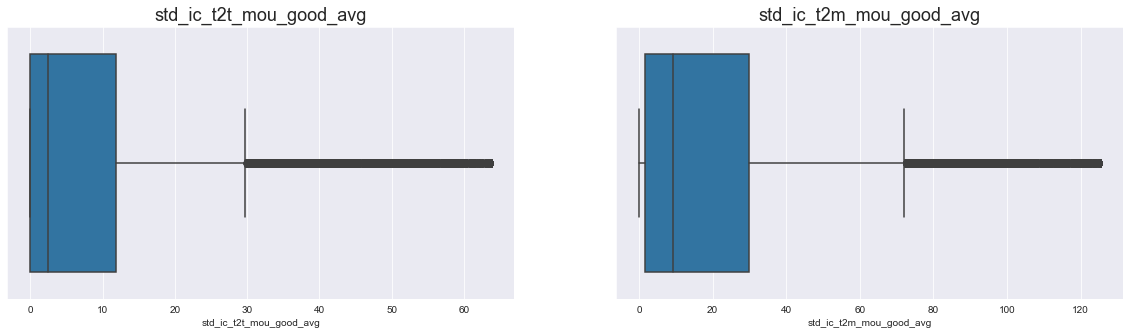

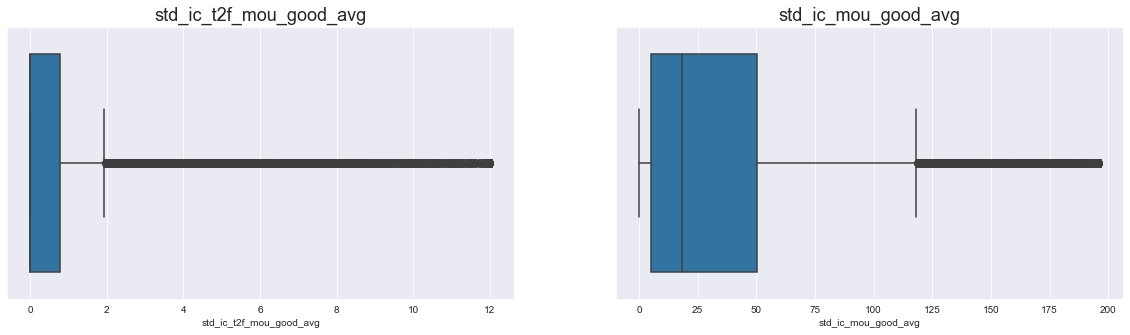

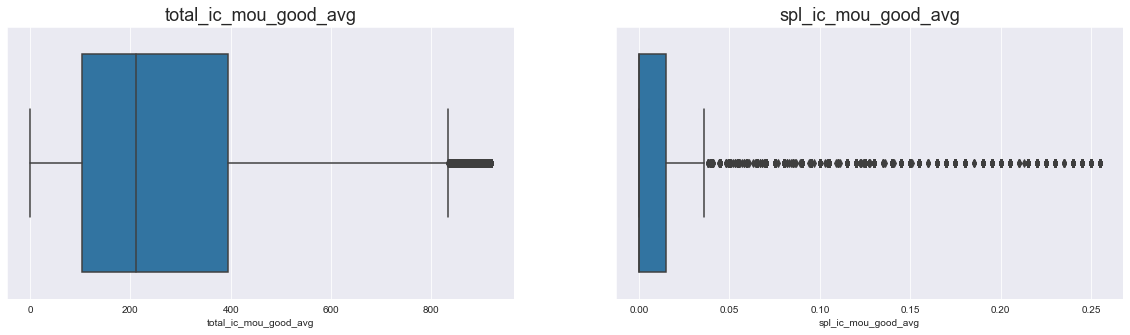

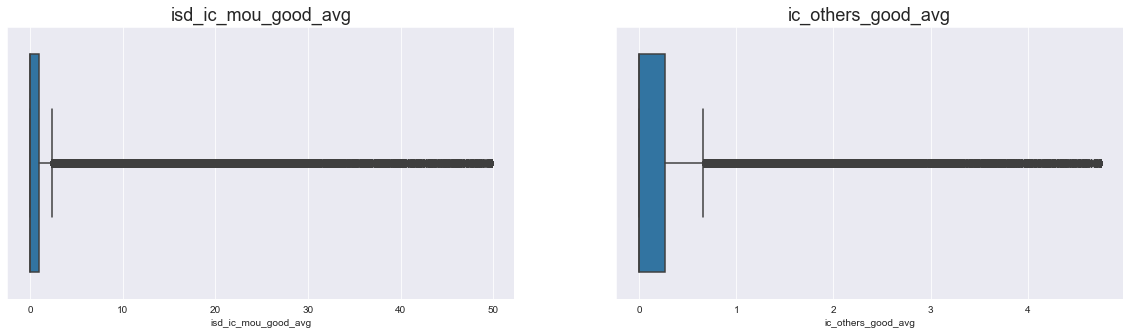

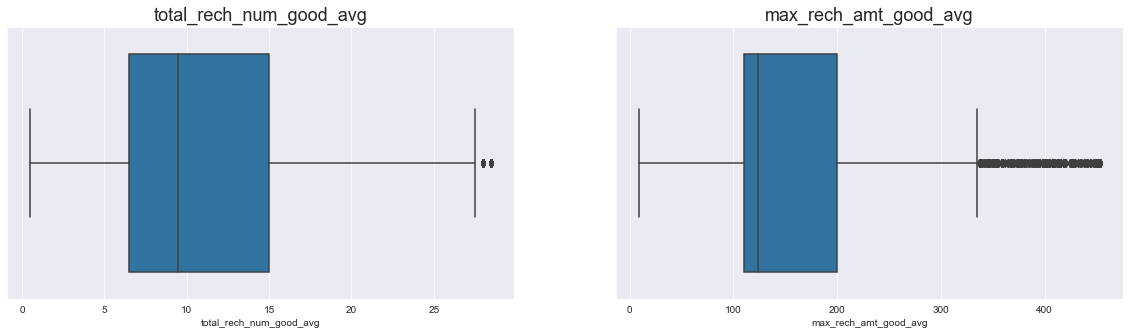

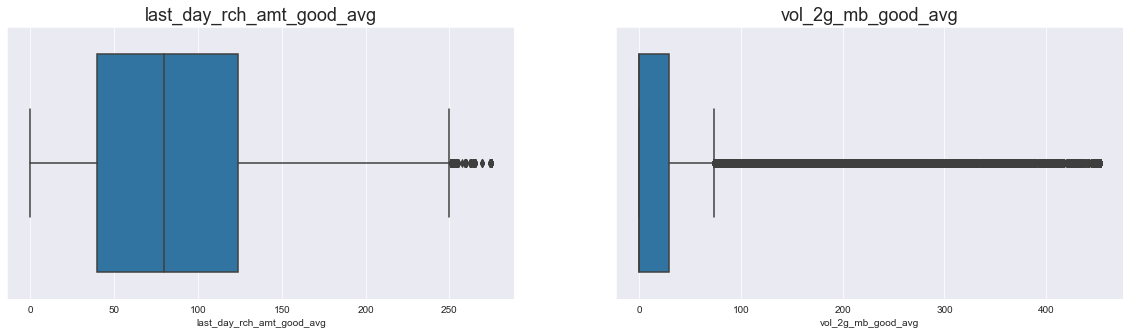

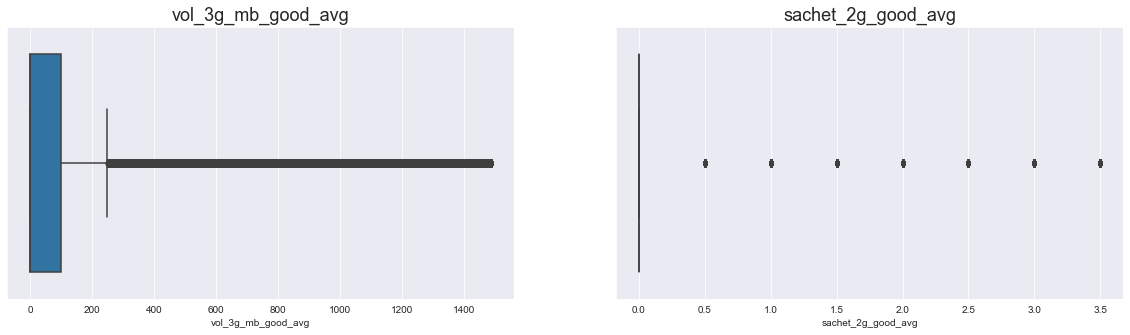

In [39]:
cols = final_df.columns

for i in range(0,len(cols),2):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18)
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18)
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

After capping the boxplots look much better, but there are still some features that look highly skewed. These features are:
1. roam_ic_mou_8
2. roam_og_mou_8
3. std_og_t2f_mou_8
4. isd_og_mou_8
5. og_others_8
6. spl_ic_mou_8
7. isd_ic_mou_8
8. vol_2g_mb_8
9. vol_3g_mb_8
10. sachet_2g_8
11. aug_vbc_3g
12. jul_vbc_3g
13. jun_vbc_3g
14. sep_vbc_3g
15. std_og_t2f_mou_good_avg
16. isd_og_mou_good_avg
17. og_others_good_avg
18. sachet_2g_good_avg

Using the describe function to check the above features in detail (like 90th, 95th, and 99th percentile value)

In [47]:
final_df[["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_2g_mb_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"]].describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

roam_ic_mou_8  roam_og_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
count   29073.000000   29073.000000      29073.000000  29073.000000   
mean       13.683965      22.161948          1.847471      2.094787   
std        75.706579     107.874014         11.883145     45.510330   
min         0.000000       0.000000          0.000000      0.000000   
25%         0.000000       0.000000          0.000000      0.000000   
50%         0.000000       0.000000          0.000000      0.000000   
75%         0.000000       0.000000          0.000000      0.000000   
90%        20.322000      39.596000          1.880000      0.000000   
95%        65.988000     118.748000          7.490000      0.630000   
99%       291.368000     445.150000         40.090000     32.440000   
max      4169.810000    5337.040000        516.910000   5681.540000   

        og_others_8  spl_ic_mou_8  isd_ic_mou_8   vol_2g_mb_8   vol_3g_mb_8  \
count  29073.000000  29073.000000  29073.000000  30011.000000  30011.000000   
mean       0.061039      0.028552     12.078346     69.209105    269.864111   
std        3.373442      0.118332     76.097831    268.494284    859.299266   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      9.620000      0.000000   
90%        0.000000      0.000000     16.658000    153.540000    914.600000   
95%        0.000000      0.250000     48.342000    409.905000   1542.315000   
99%        0.000000      0.630000    254.229200   1256.619000   3790.385000   
max      394.930000      6.230000   4100.380000  11117.610000  30036.060000   

        sachet_2g_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.607611    129.439626    135.127102    121.360548      6.562685   
std        1.844444    390.478591    408.024394    389.726031     48.638658   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.600000      1.990000      0.000000      0.000000   
90%        2.000000    438.970000    454.830000    394.500000      0.000000   
95%        4.000000    818.750000    845.315000    761.740000     18.635000   
99%        9.000000   1822.115000   1941.598000   1866.386000    173.662000   
max       44.000000  12916.220000   9165.600000  11166.210000   2618.570000   

       std_og_t2f_mou_good_avg  isd_og_mou_good_avg  og_others_good_avg  \
count             29532.000000         29532.000000        29532.000000   
mean                  2.043771             2.163842            0.373319   
std                  11.972013            44.926099            1.856808   
min                   0.000000             0.000000            0.000000   
25%                   0.000000             0.000000            0.000000   
50%                   0.000000             0.000000            0.000000   
75%                   0.000000             0.000000            0.000000   
90%                   2.975000             0.175000            1.165000   
95%                   8.380000             1.705000            2.115000   
99%                  41.620100            40.602250            4.793450   
max                 382.920000          5695.470000          185.065000   

       sachet_2g_good_avg  
count        11662.000000  
mean            67.285641  
std            115.244678  
min             -6.545000  
25%              0.650000  
50%             18.312500  
75%            106.085000  
90%            206.679500  
95%            272.408000  
99%            531.025600  
max           2404.680000

From above, the following columns are highly skewed (at least 75 percentile values are same as minimum) and there is not much difference in their other values:
- roam_ic_mou_8
- roam_og_mou_8
- std_og_t2f_mou_8
- isd_og_mou_8
- og_others_8
- spl_ic_mou_8
- isd_ic_mou_8
- vol_3g_mb_8
- sachet_2g_8
- aug_vbc_3g
- jul_vbc_3g
- jun_vbc_3g
- sep_vbc_3g
- std_og_t2f_mou_good_avg
- isd_og_mou_good_avg
- og_others_good_avg
- sachet_2g_good_avg


So dropping these highly skewed features

In [48]:
final_df.drop(["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"], axis = 1, inplace = True)
final_df.shape

(30011, 75)

Below features have outliers on the lower side as well. Looking at those in detail
- arpu_8
- arpu_good_avg

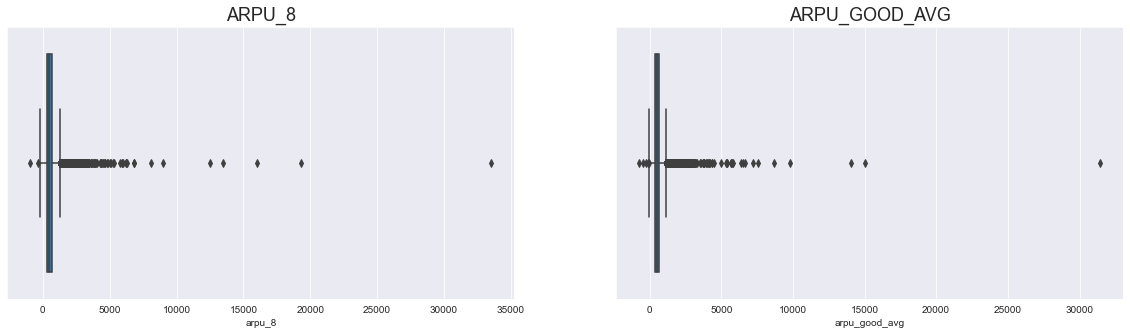

arpu_8  arpu_good_avg
count  30011.000000   30011.000000
mean     534.857433     588.209915
std      492.259586     409.006147
min     -945.808000    -749.783000
0.1%      -5.000000      72.150000
1%         0.000000     253.246200
5%        22.206000     313.706750
10%      134.170000     333.576000
20%      252.300000     364.696000
25%      289.609500     381.272250
50%      452.091000     485.602500
75%      671.150000     674.492000
max    33543.624000   31438.461000

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

Looking at the boxplots and the description of the 2 columns, it will be best to cap the lower value to 0.1% for both the columns

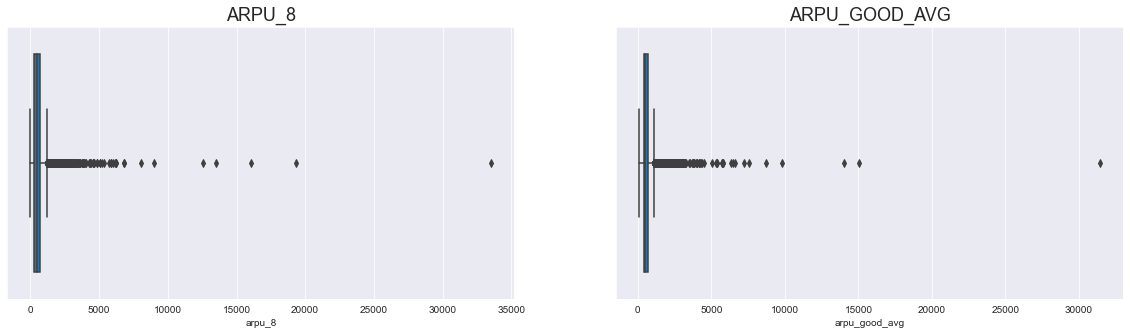

arpu_8  arpu_good_avg
count  30011.000000   30011.000000
mean     534.912605     588.306042
std      492.163736     408.837788
min       -5.000000      72.150000
0.1%      -5.000000      72.275235
1%         0.000000     253.246200
5%        22.206000     313.706750
10%      134.170000     333.576000
20%      252.300000     364.696000
25%      289.609500     381.272250
50%      452.091000     485.602500
75%      671.150000     674.492000
max    33543.624000   31438.461000

In [50]:
arpu_8_val = final_df["arpu_8"].quantile(0.001)
final_df["arpu_8"][final_df["arpu_8"] <= arpu_8_val] = arpu_8_val


arpu_good_avg_val = final_df["arpu_good_avg"].quantile(0.001)
final_df["arpu_good_avg"][final_df["arpu_good_avg"] <= arpu_good_avg_val] = arpu_good_avg_val



plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

### Bivariate Analysis

Looking at each feature for customers that churned and those that did not.

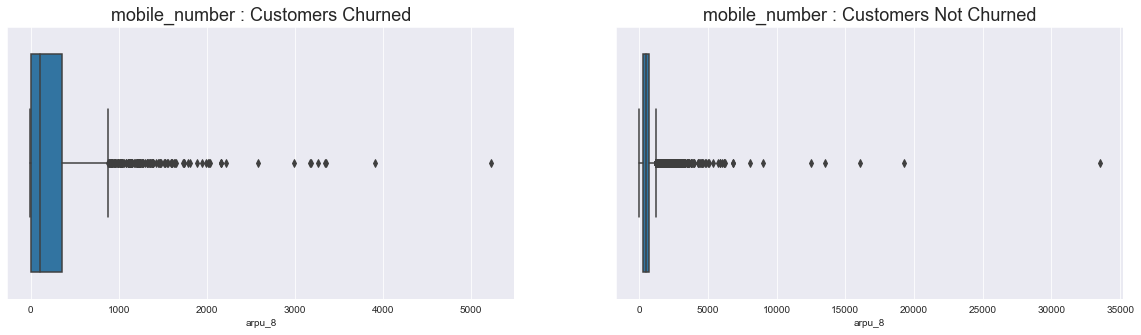

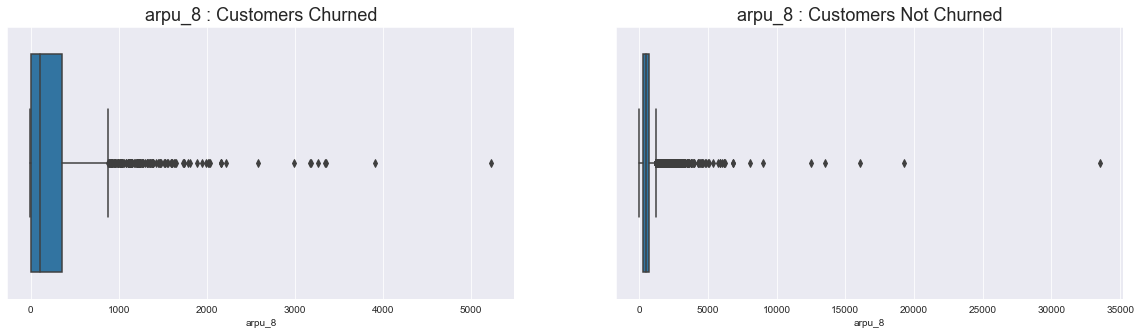

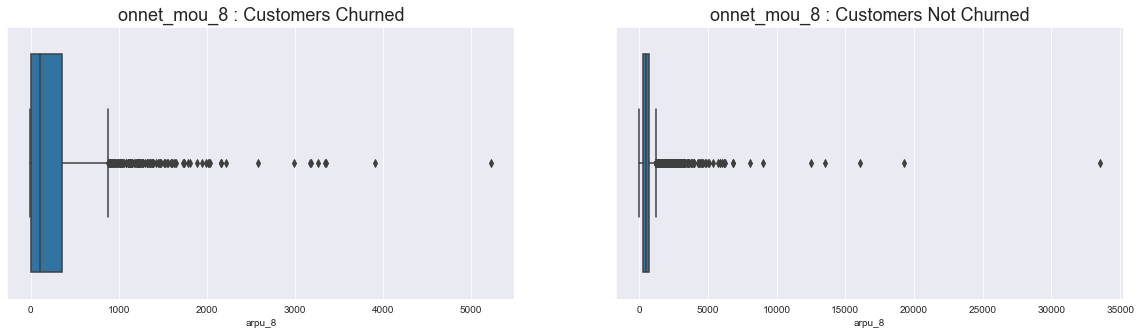

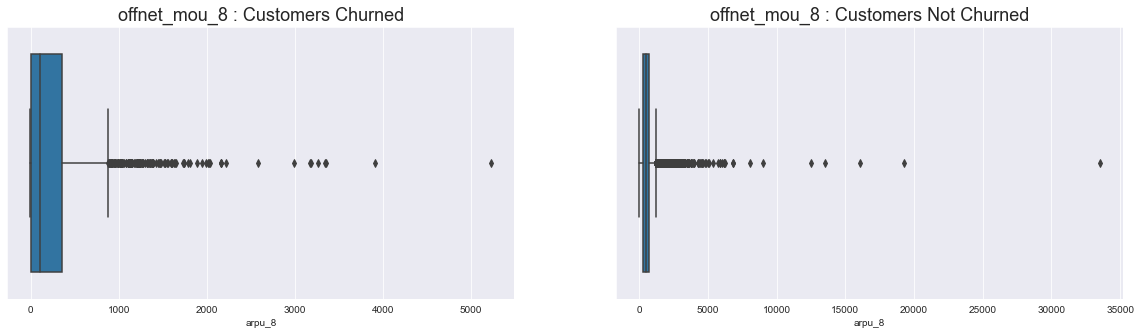

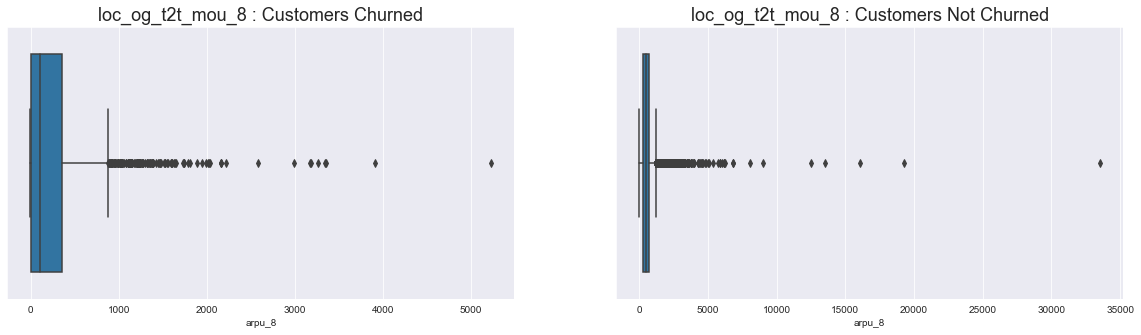

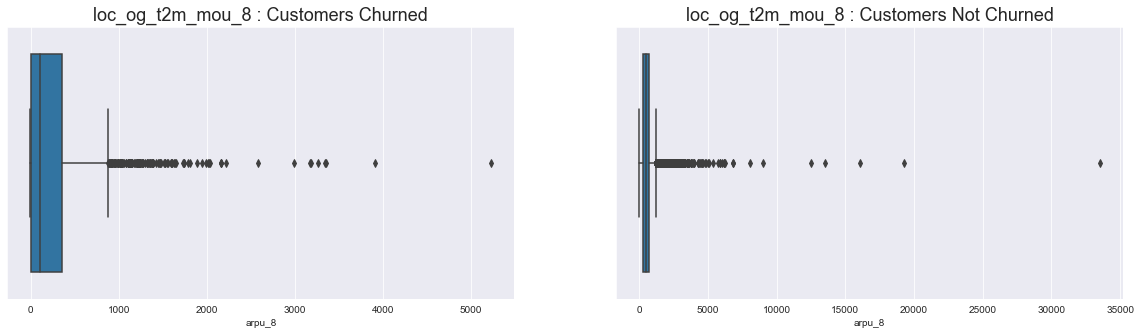

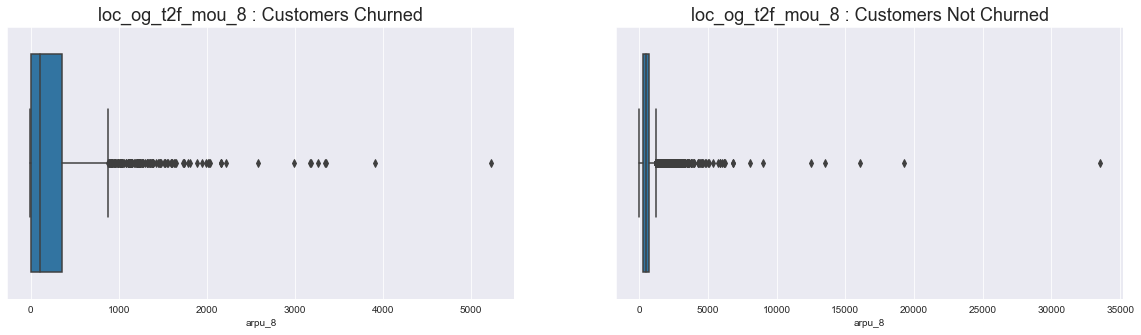

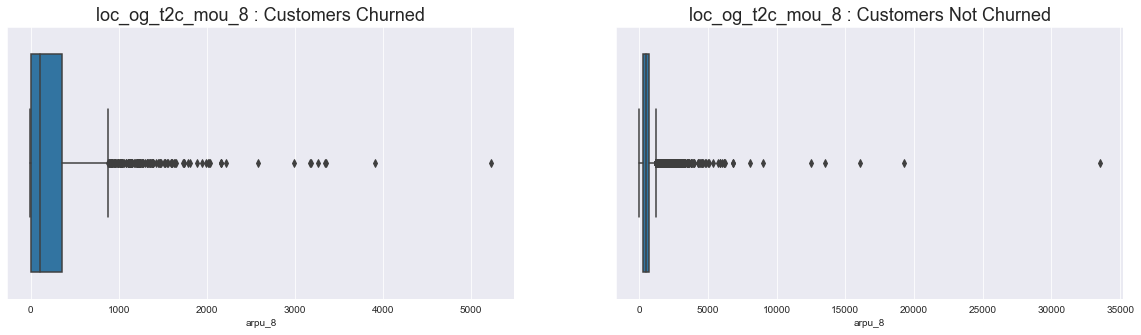

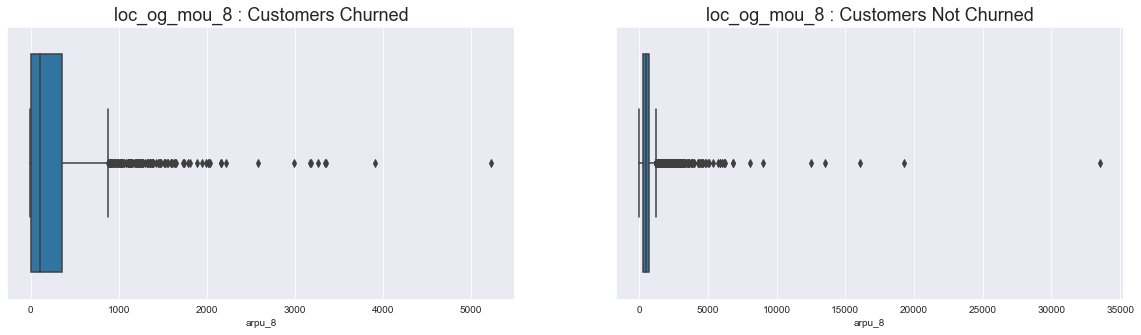

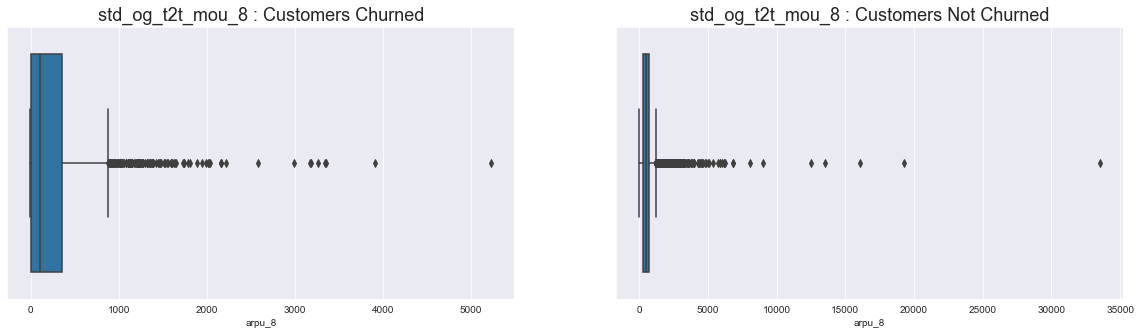

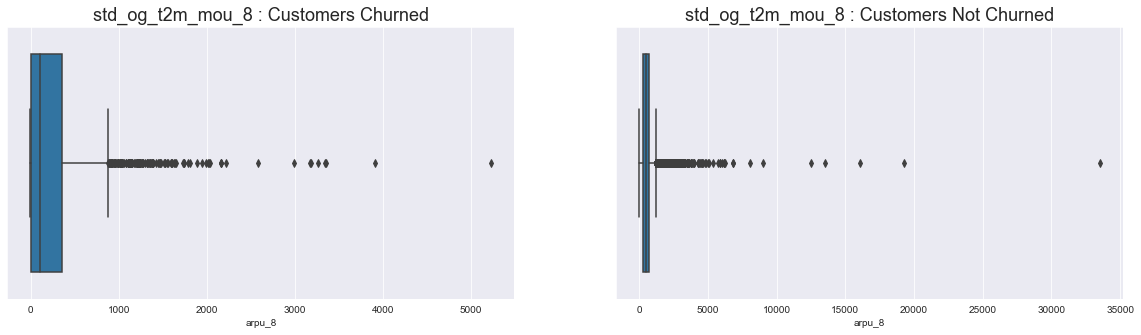

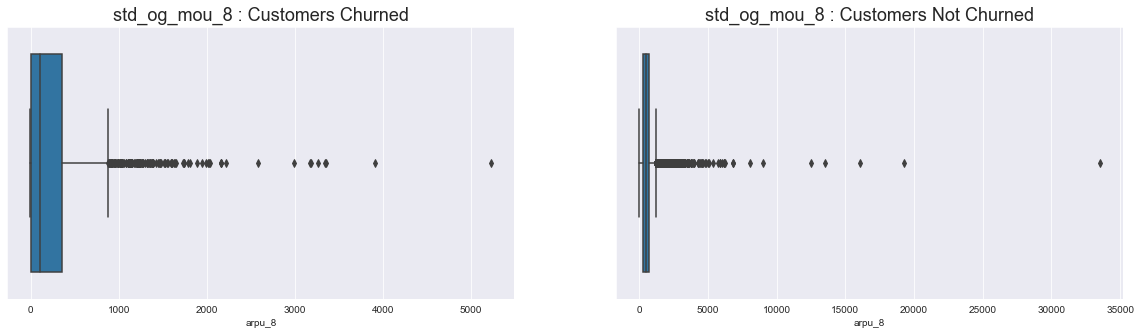

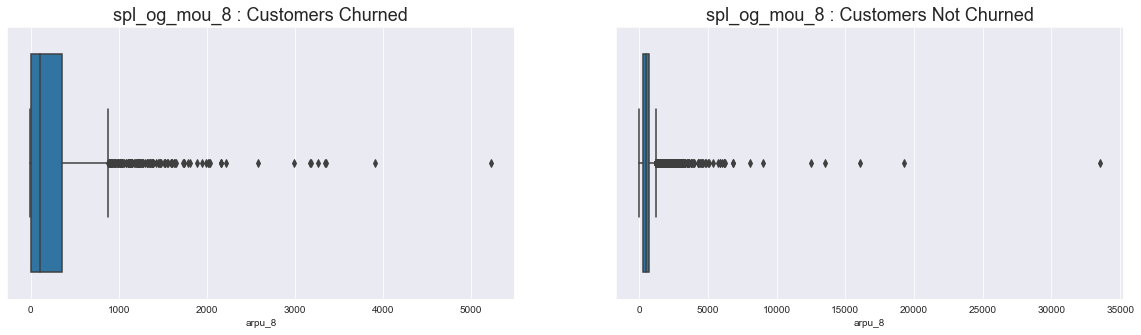

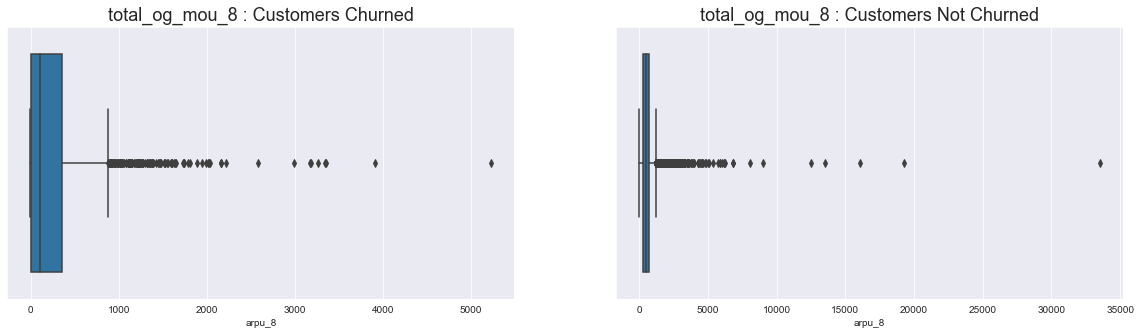

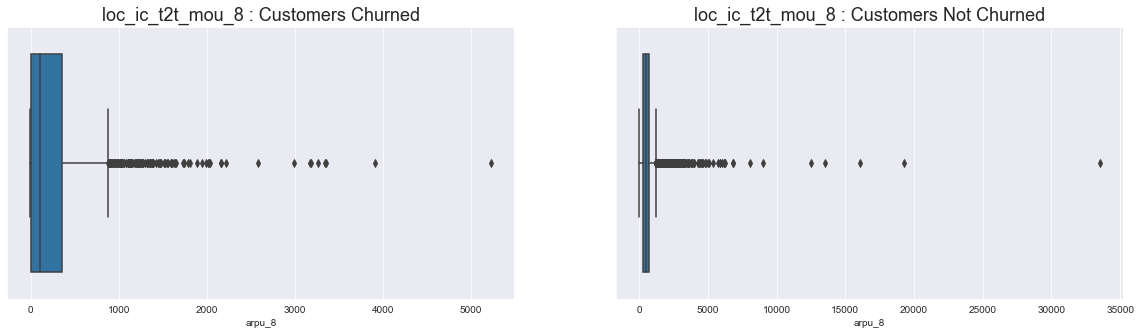

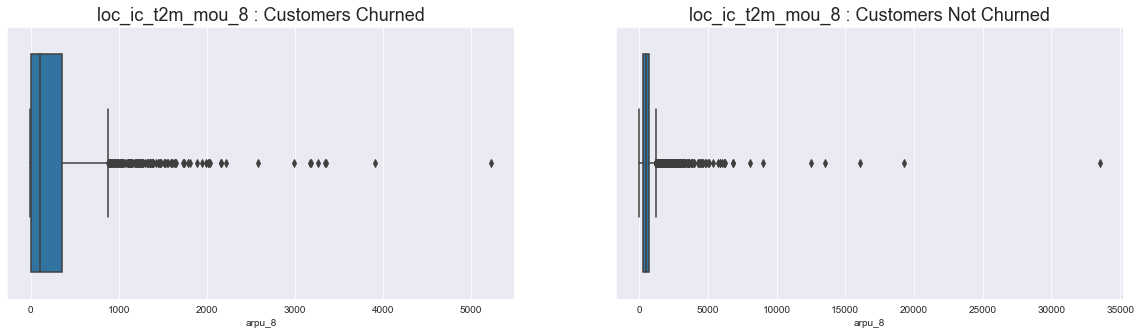

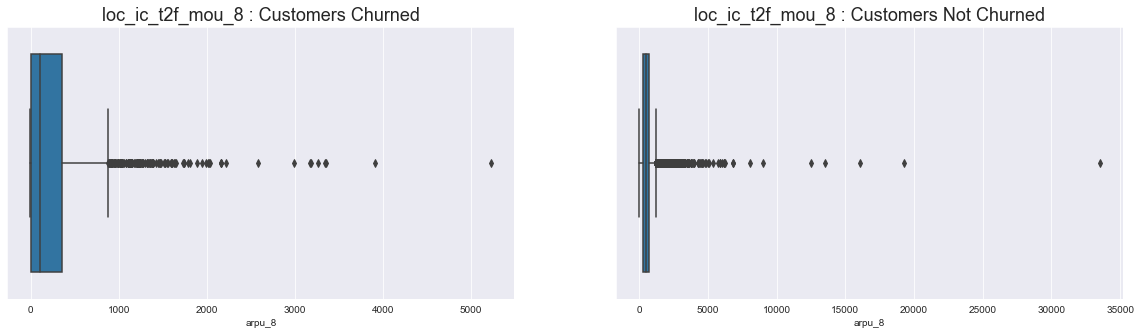

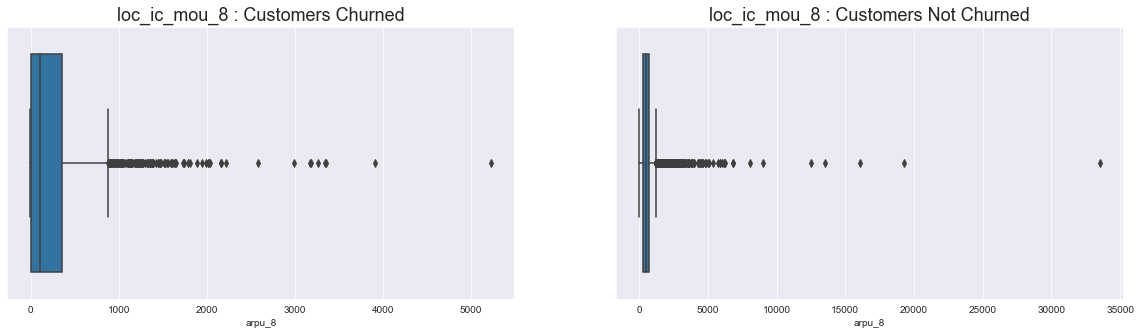

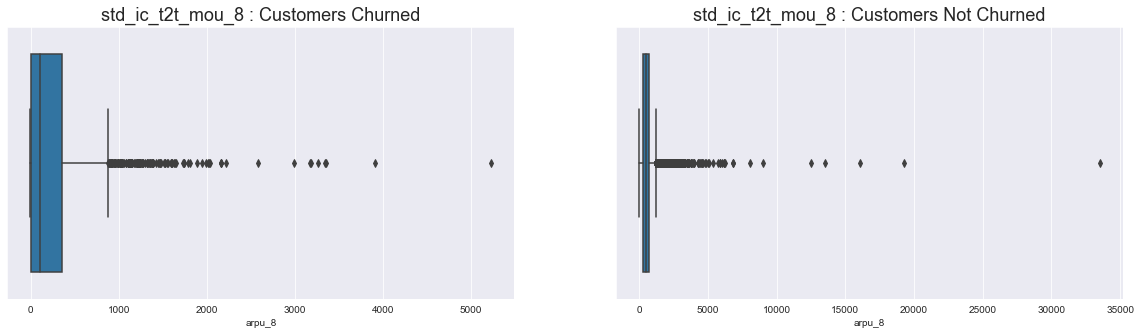

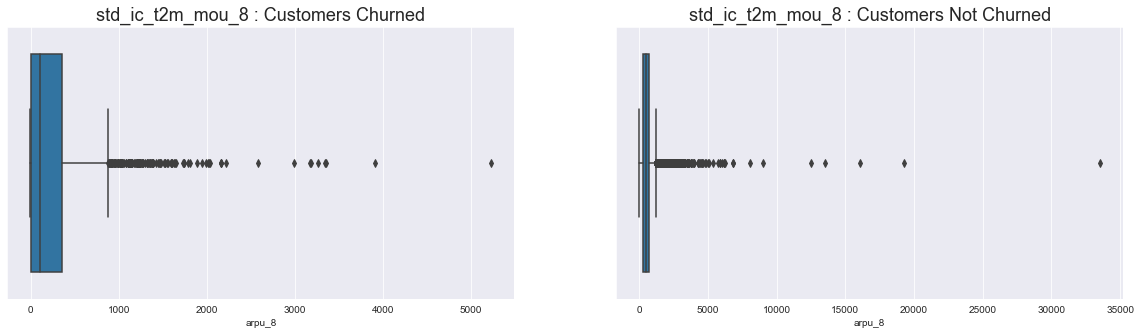

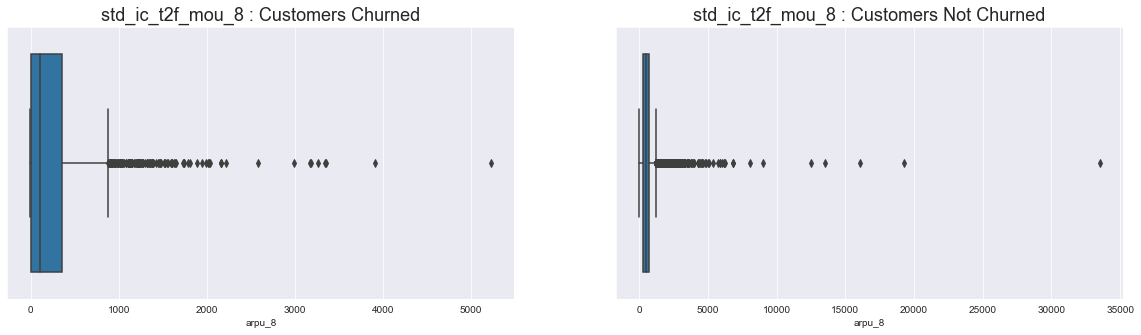

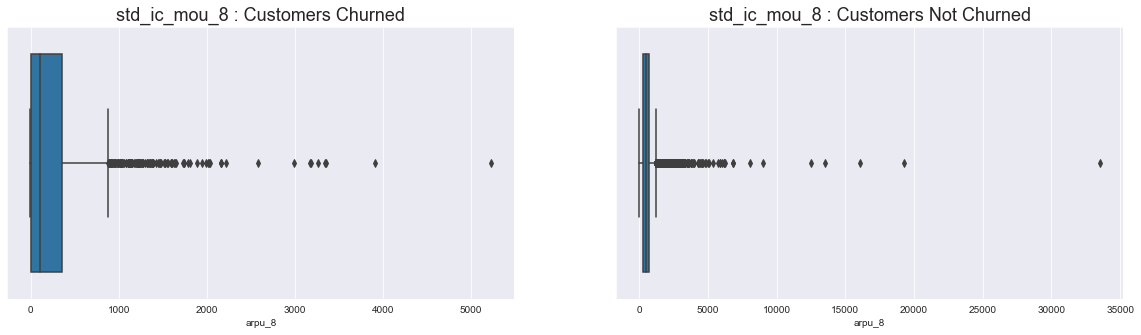

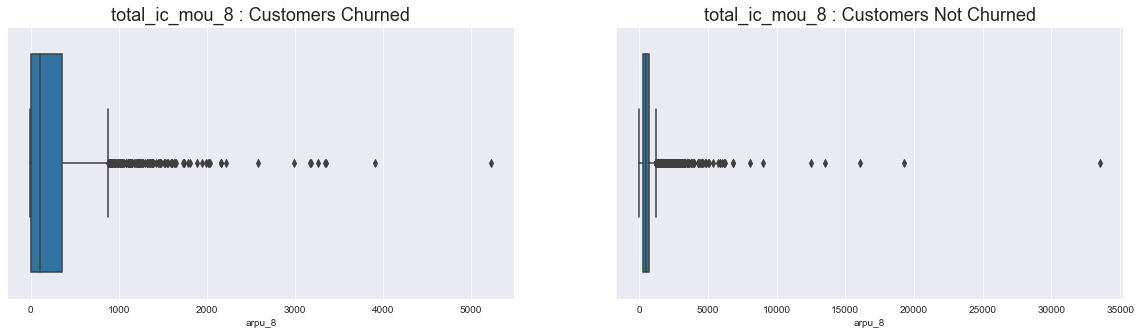

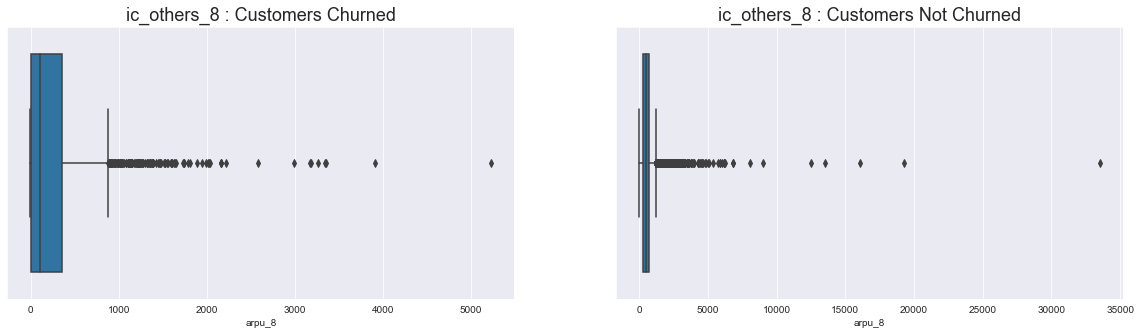

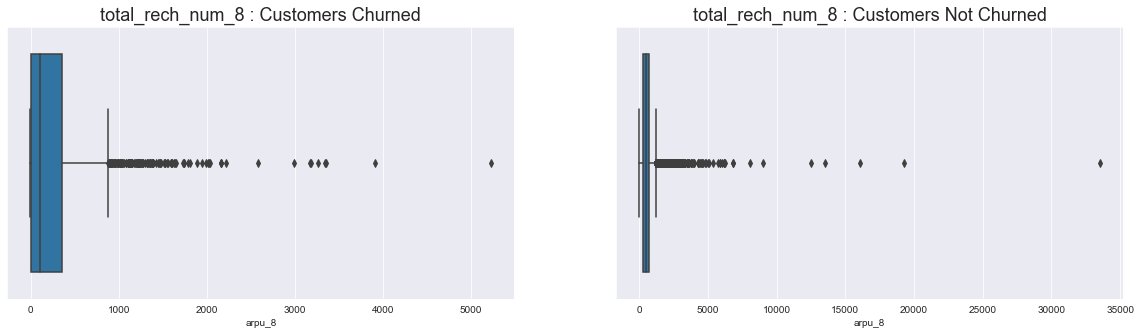

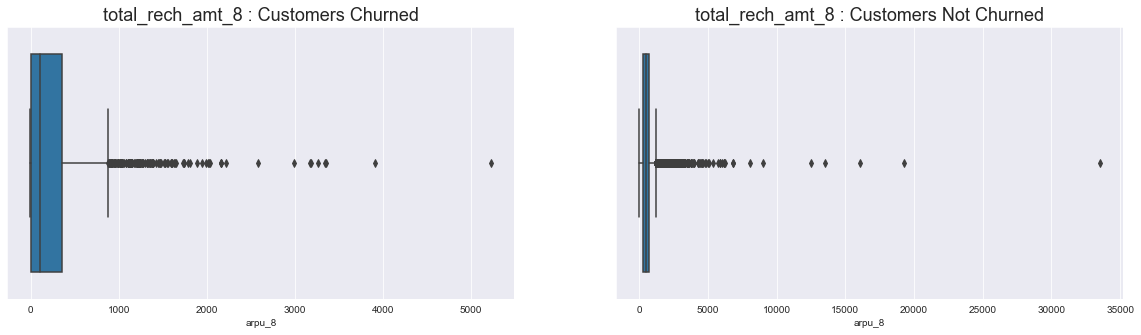

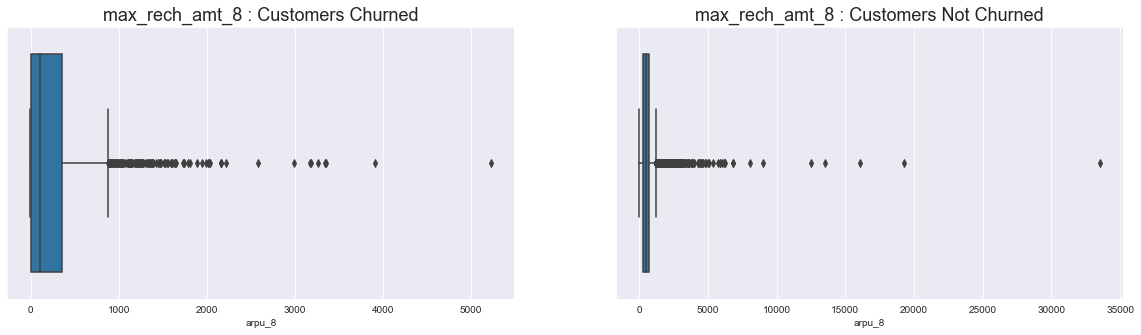

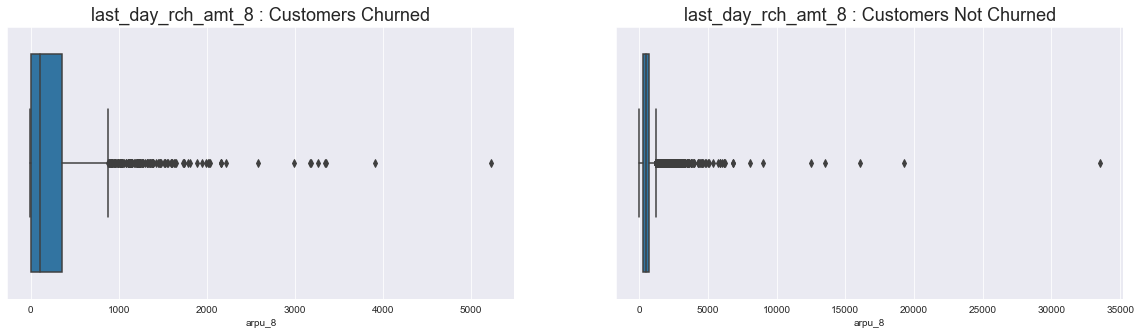

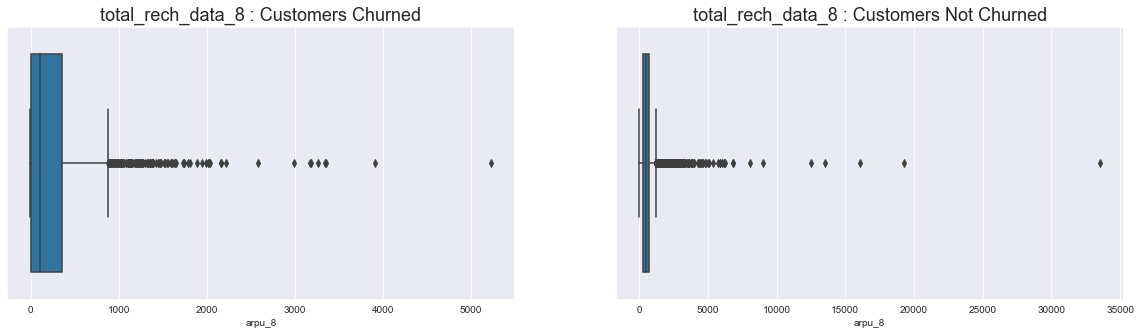

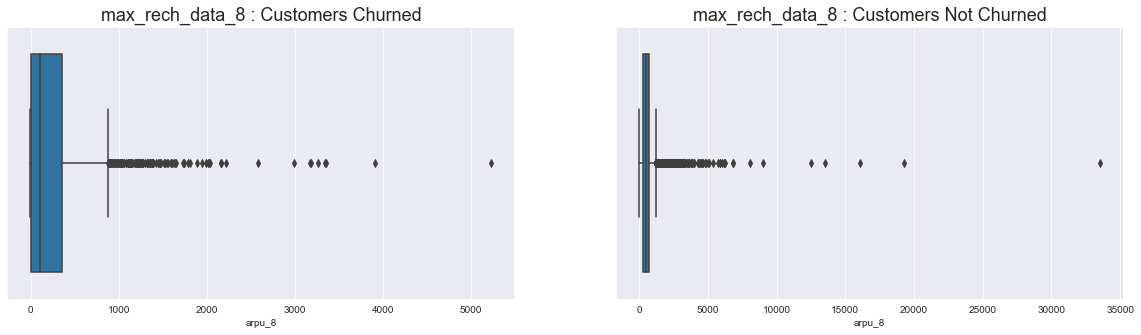

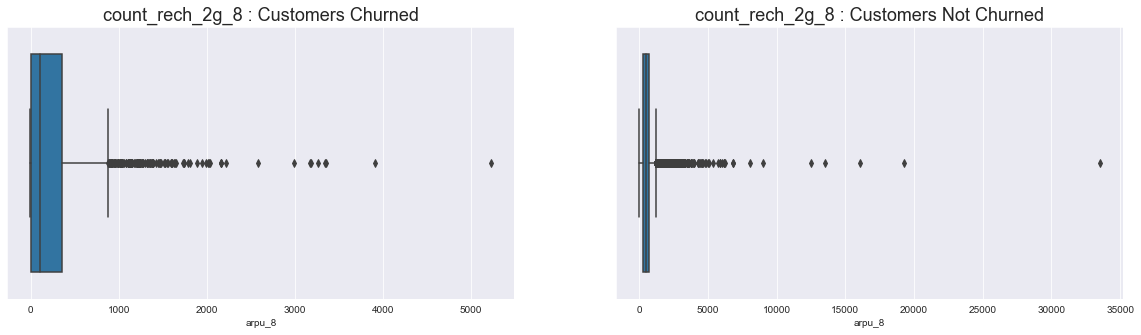

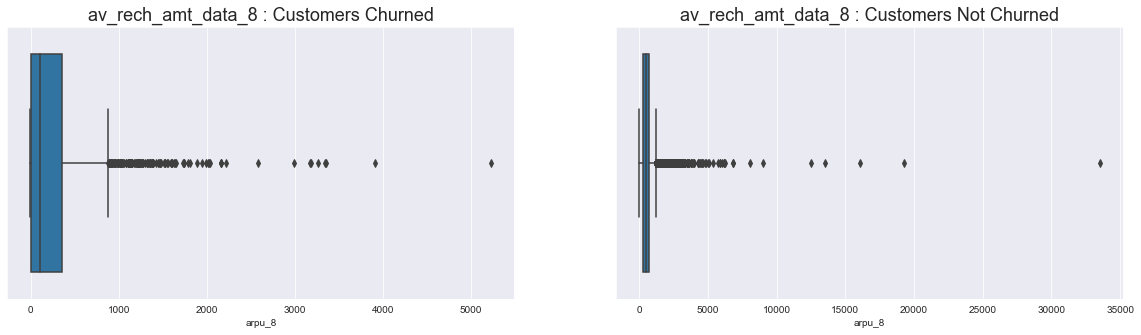

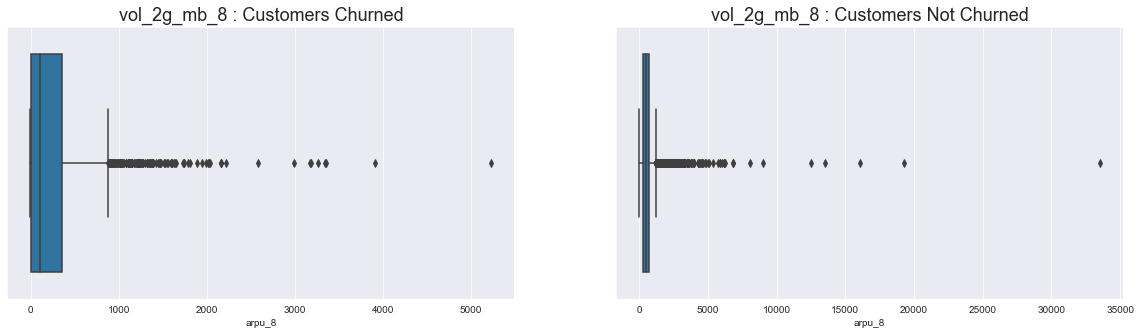

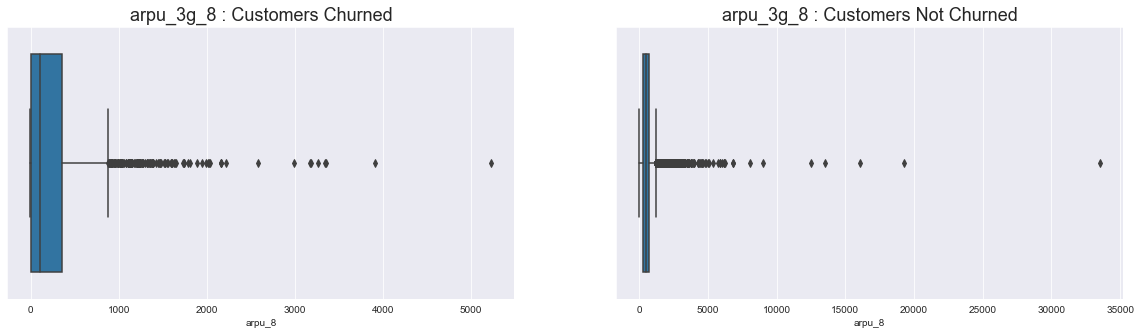

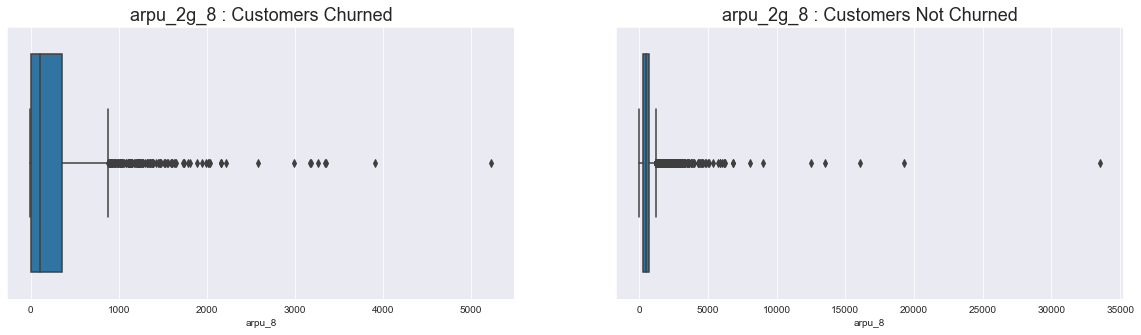

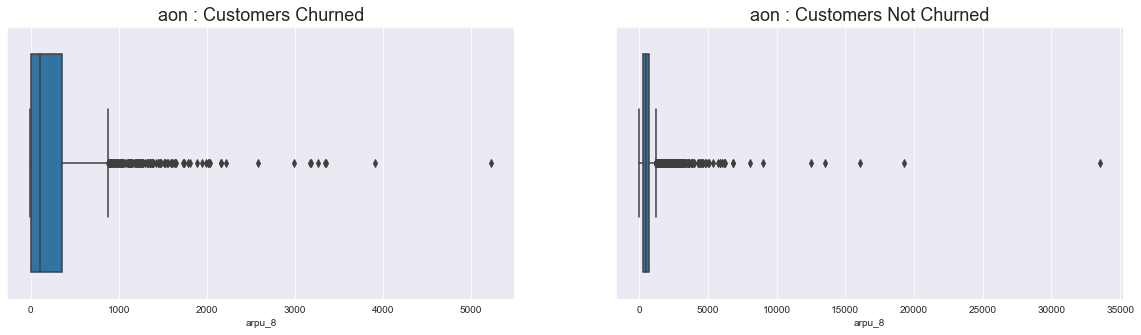

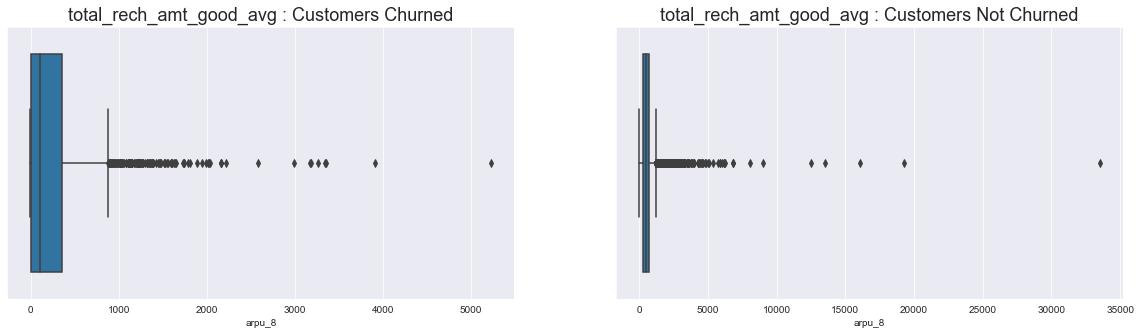

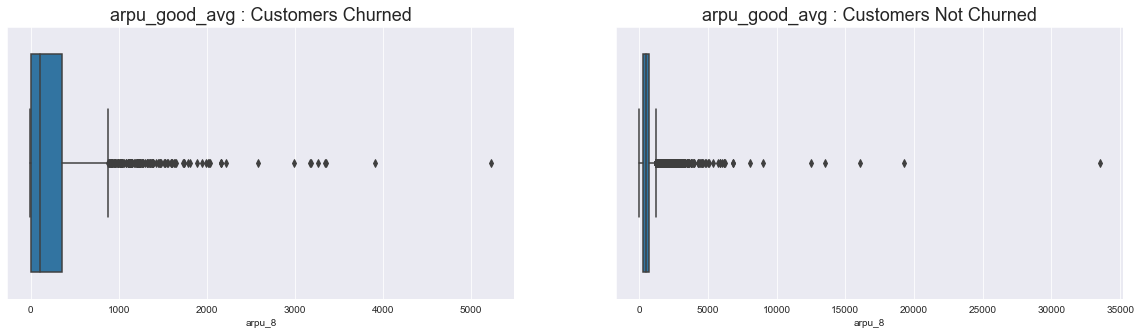

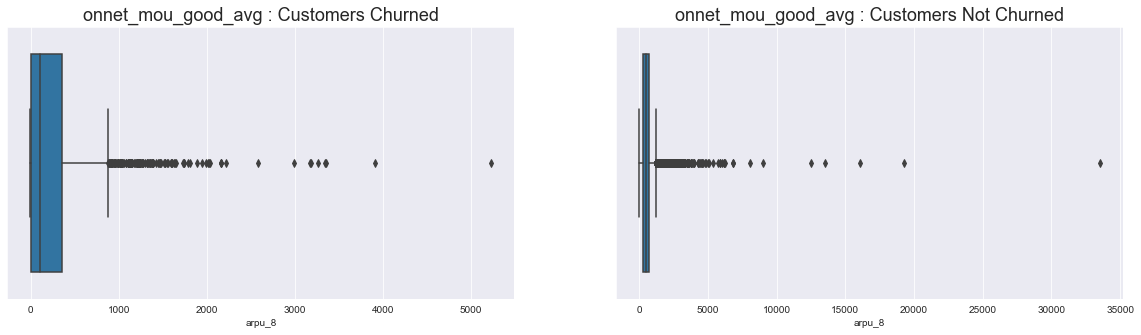

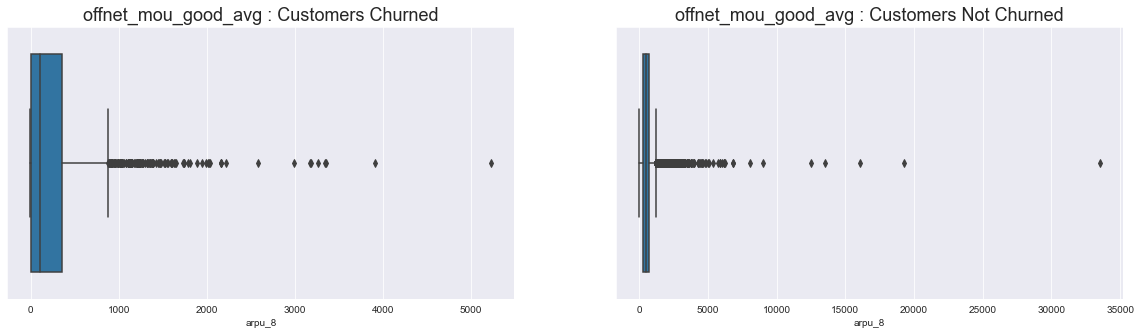

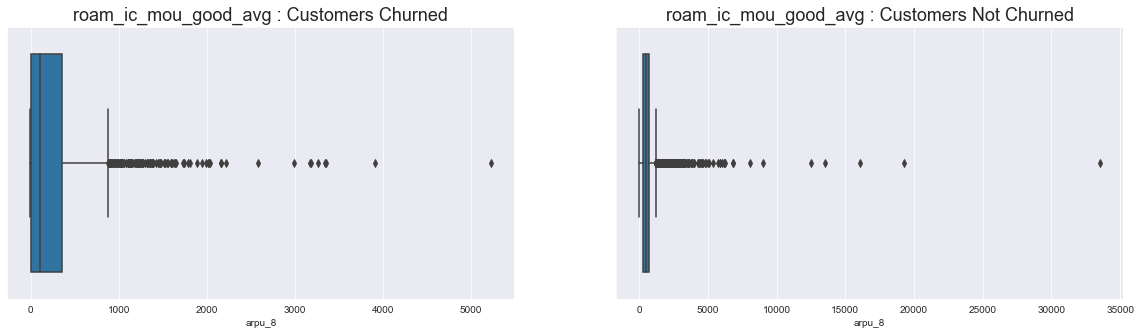

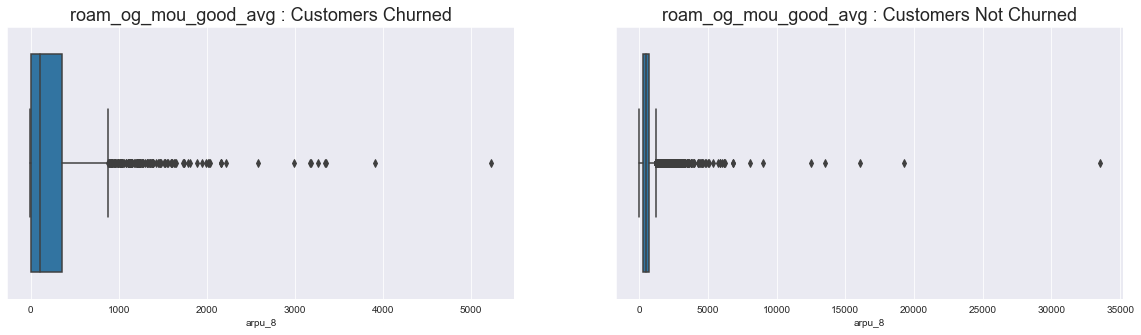

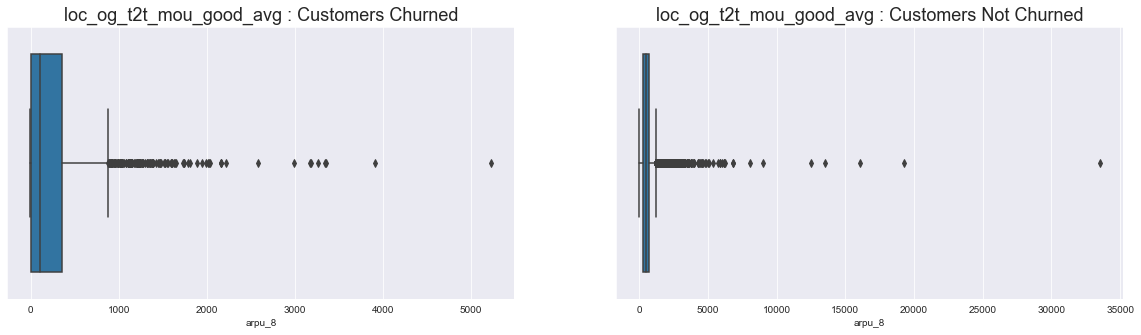

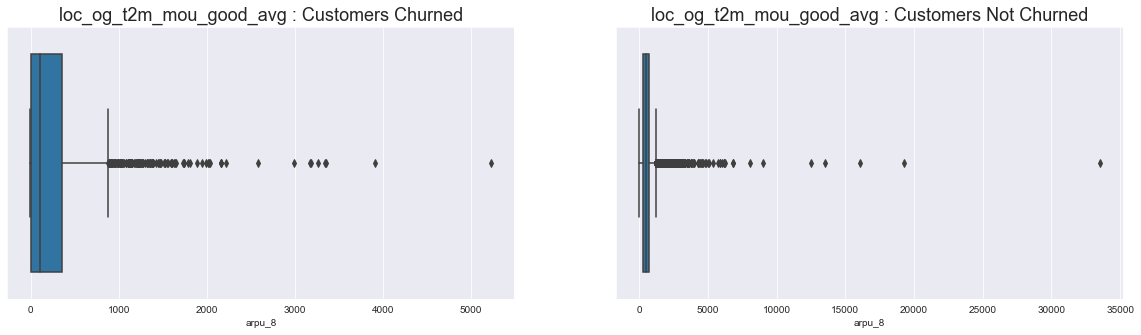

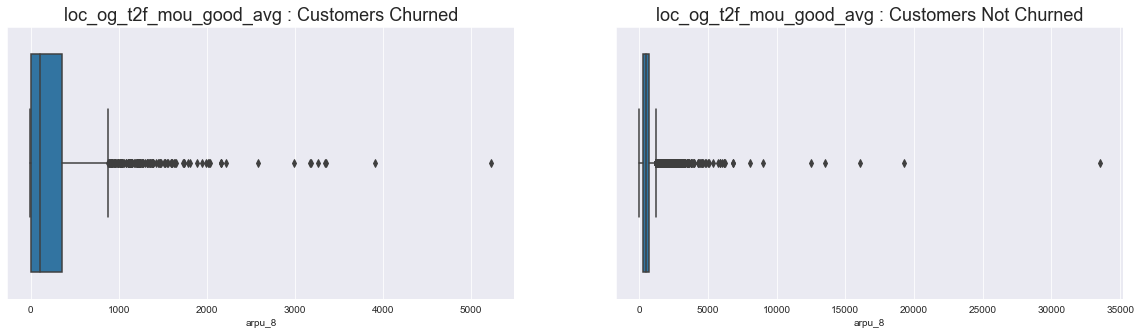

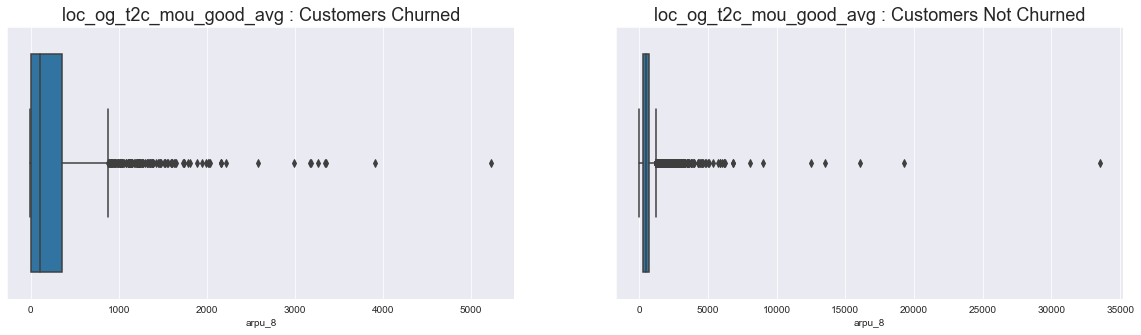

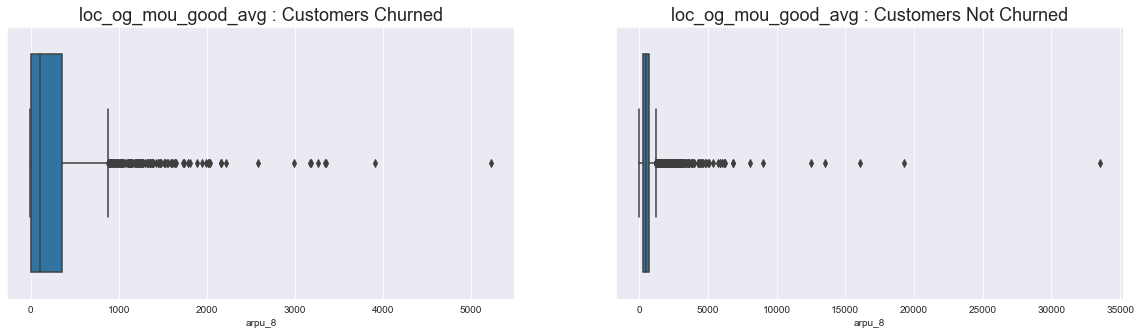

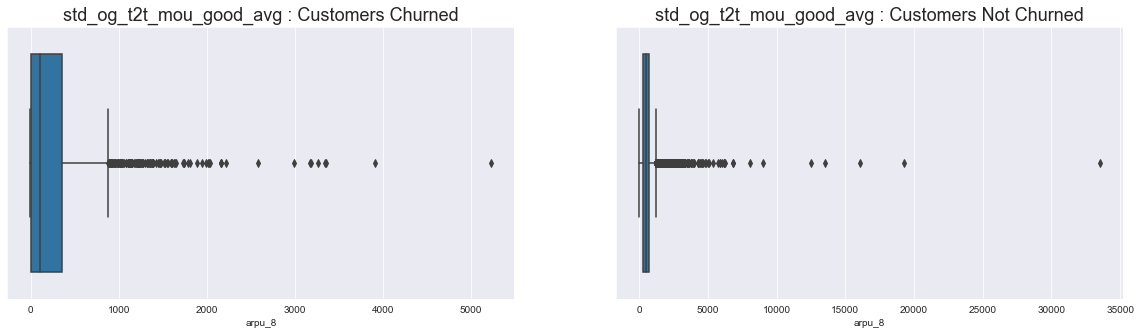

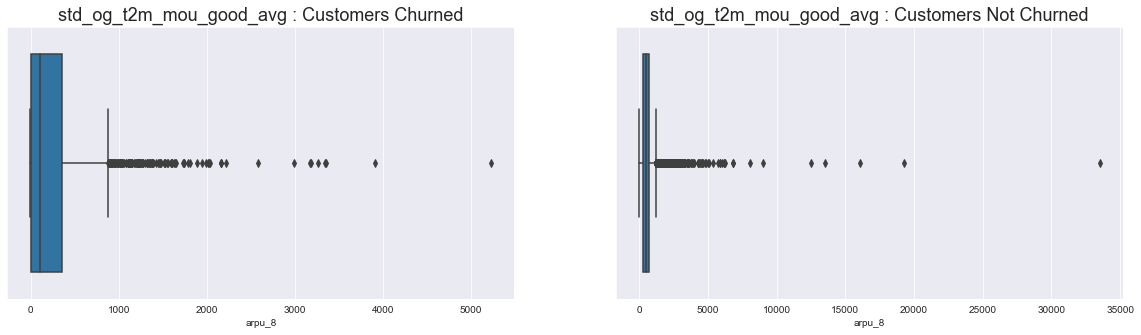

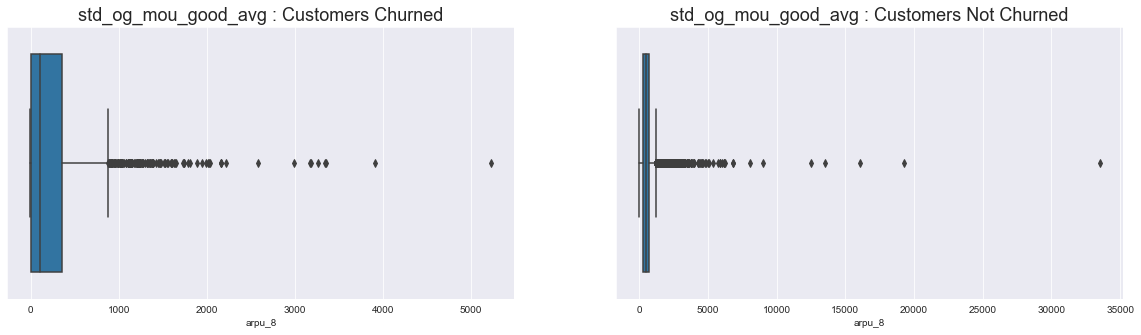

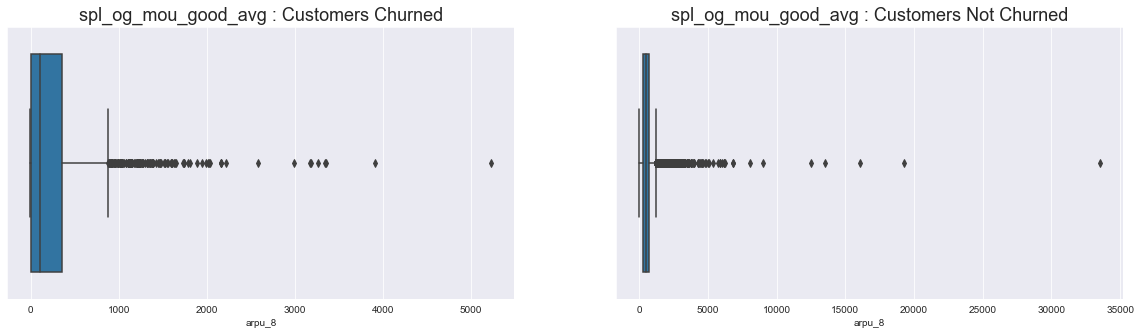

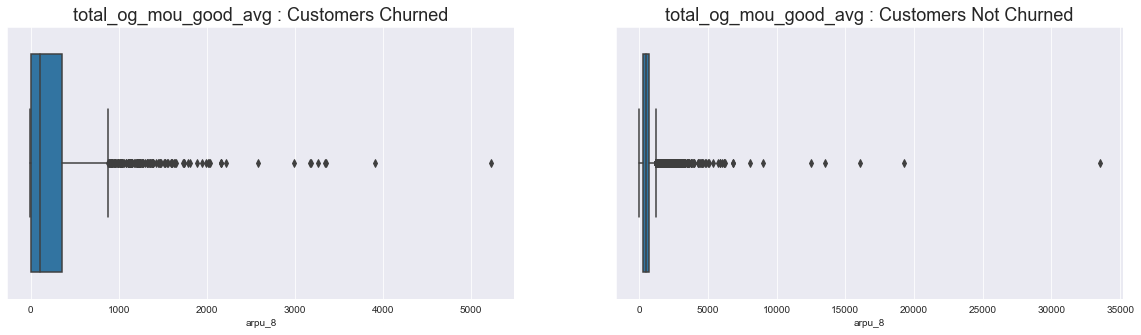

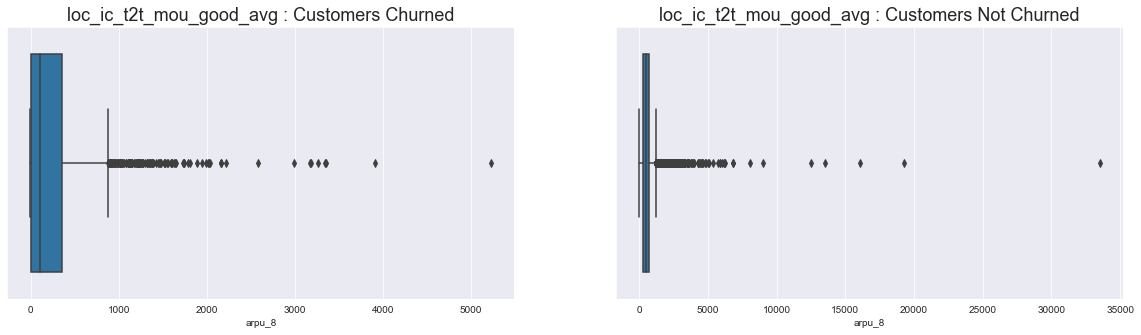

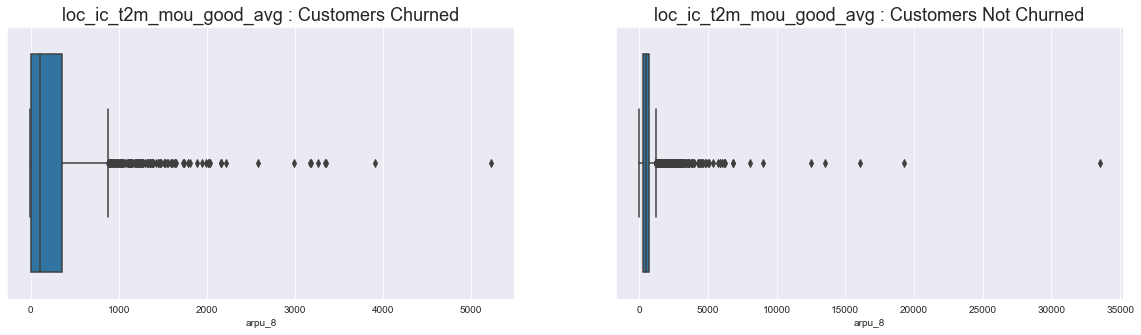

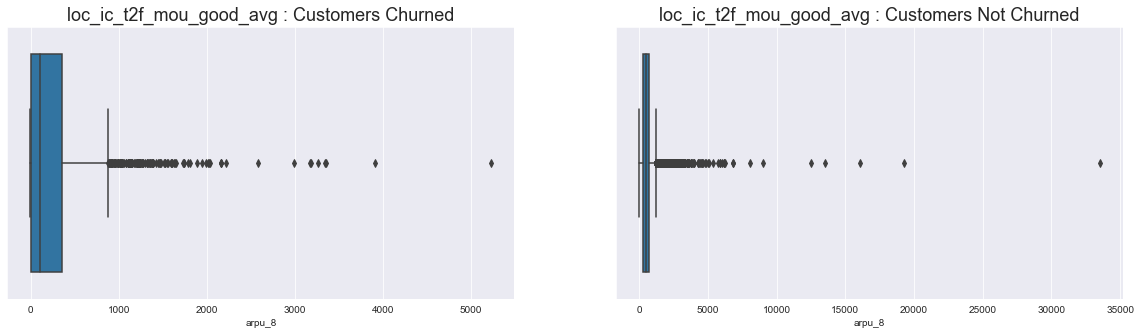

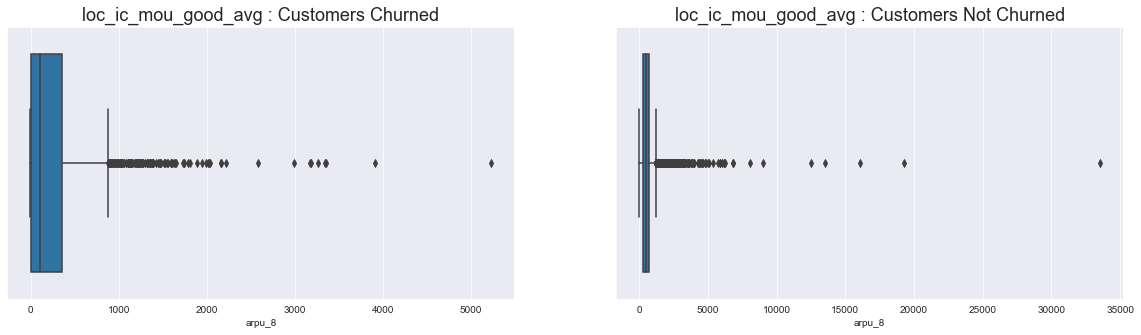

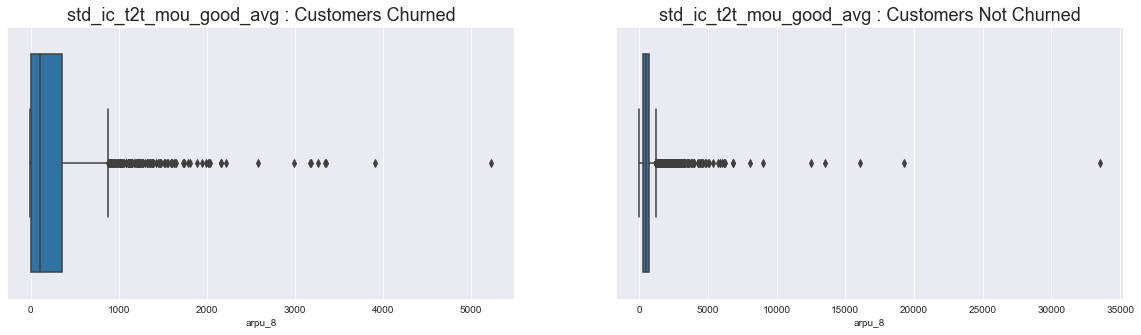

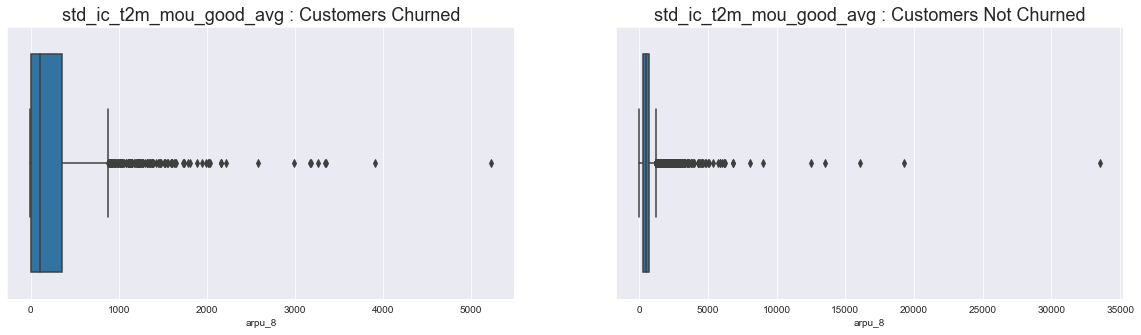

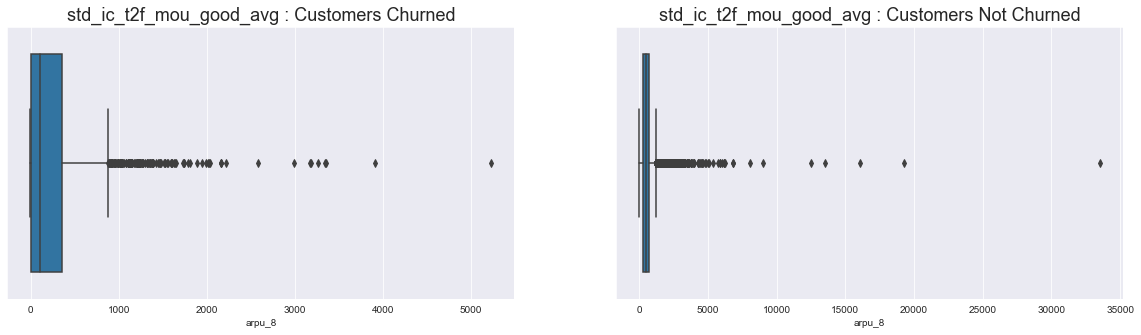

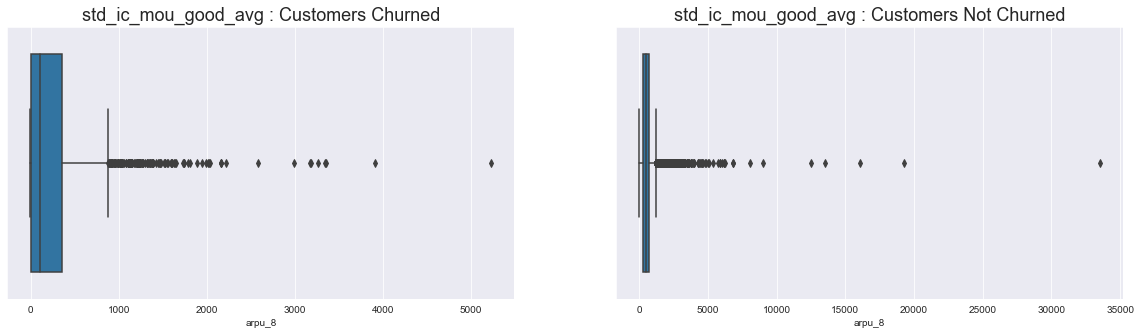

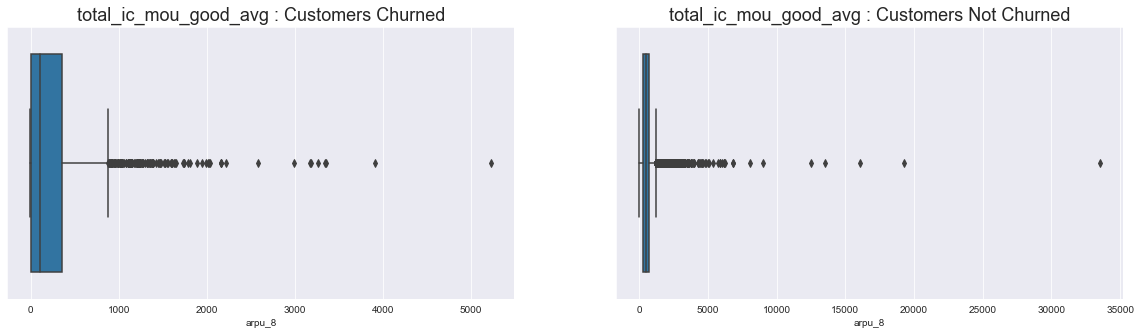

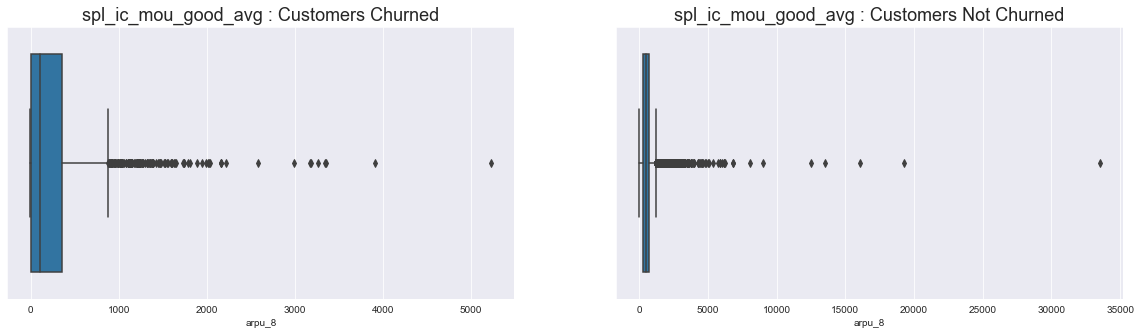

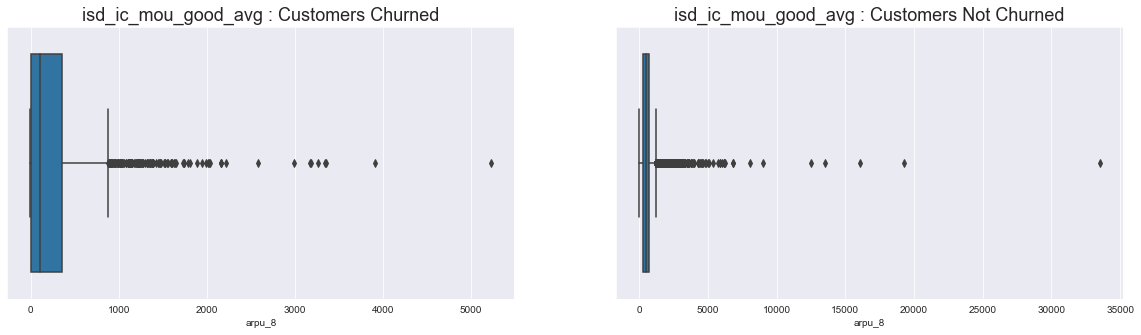

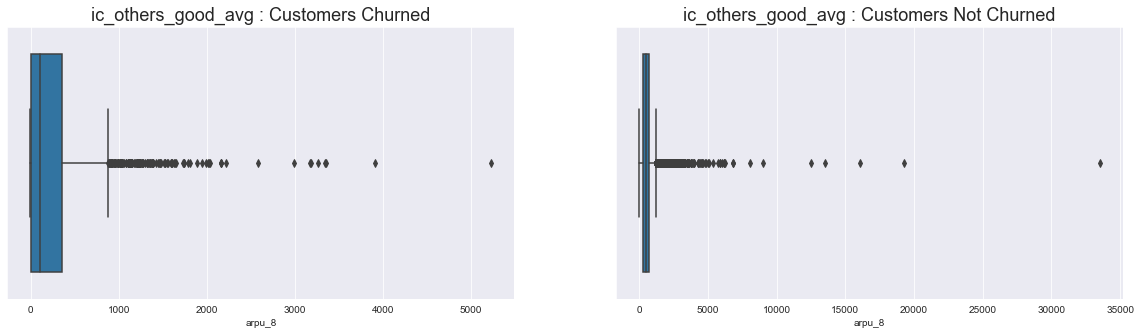

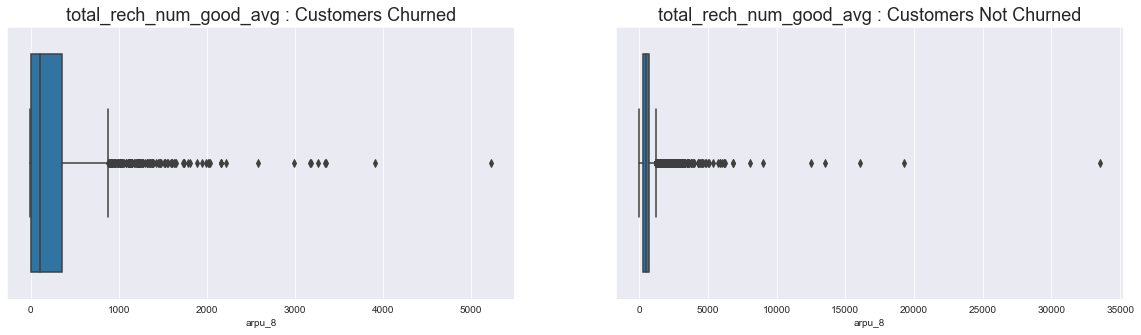

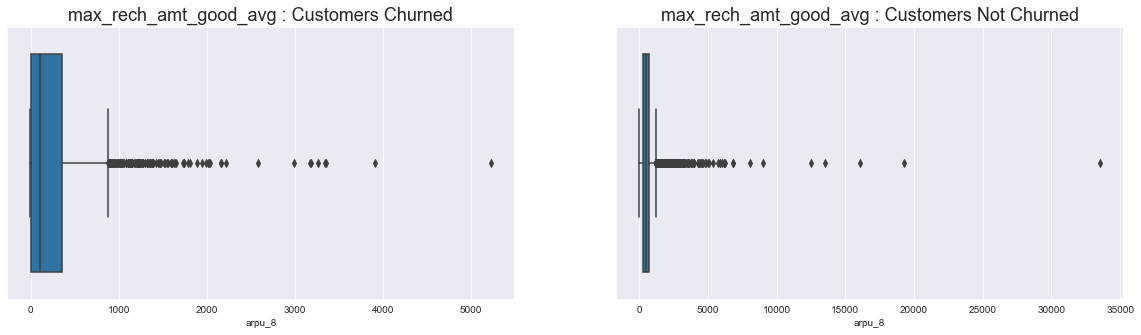

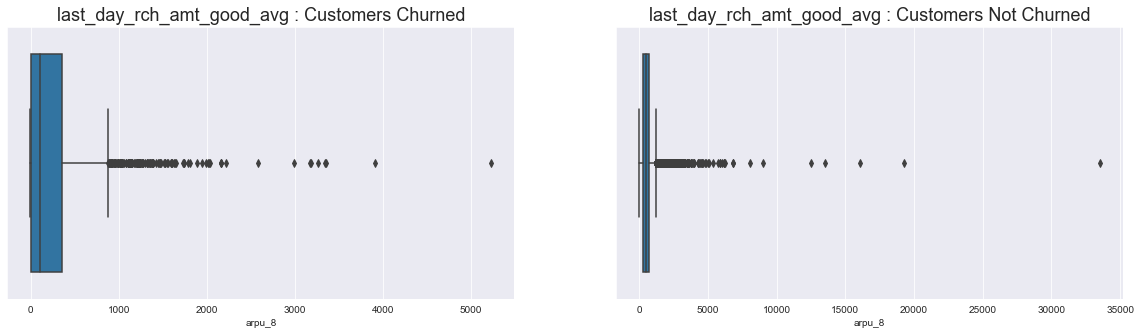

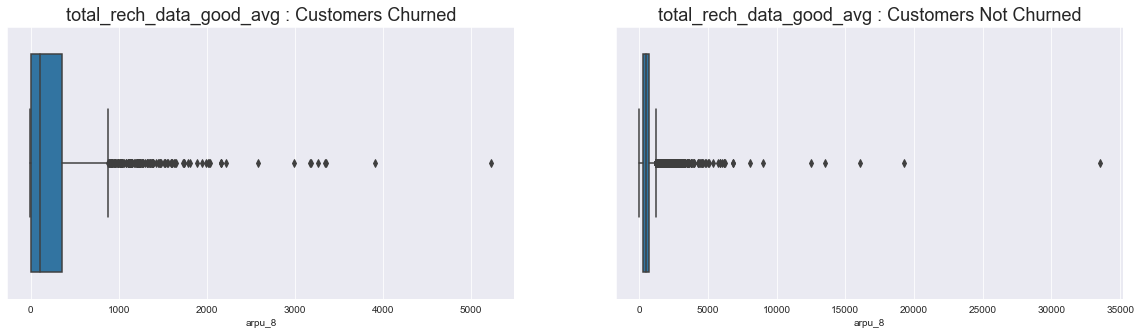

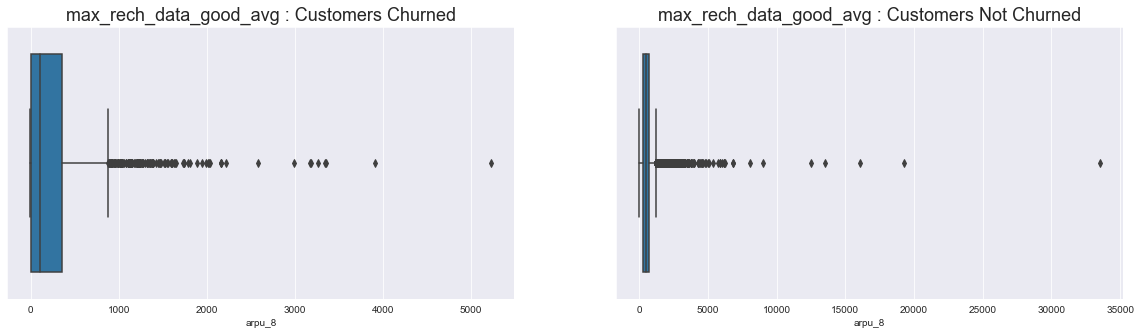

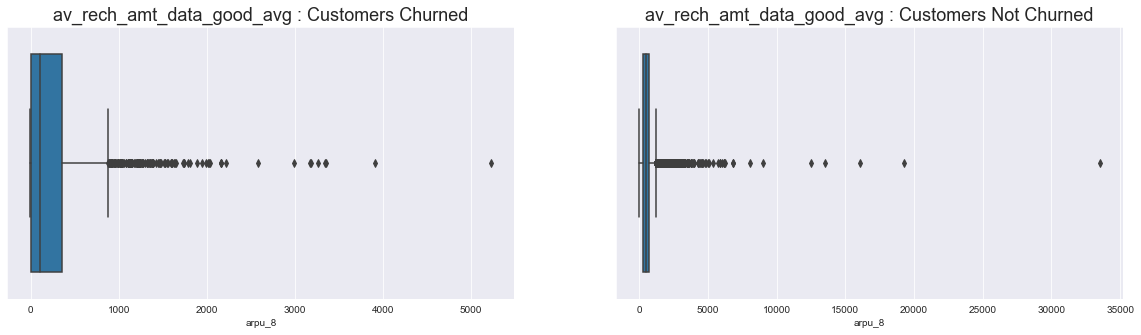

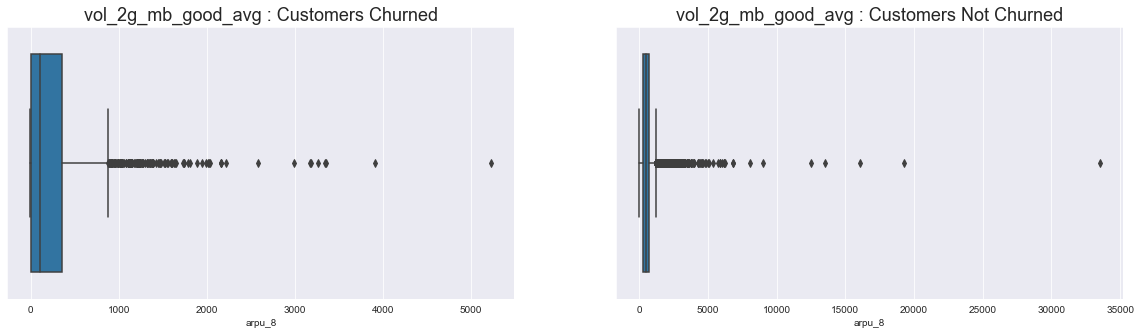

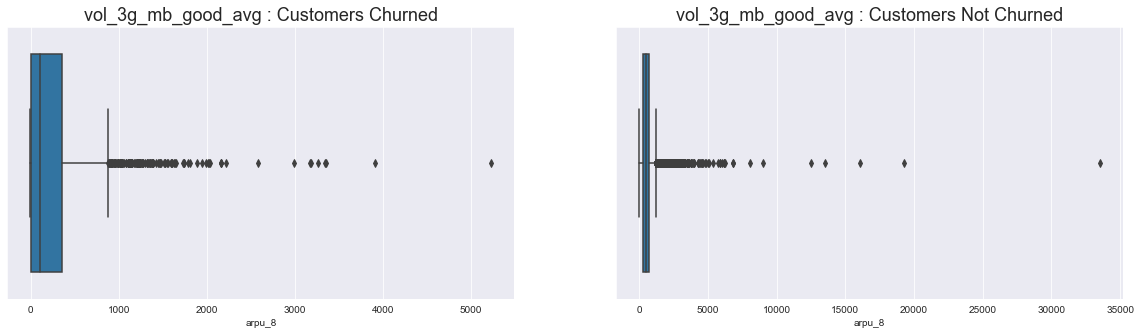

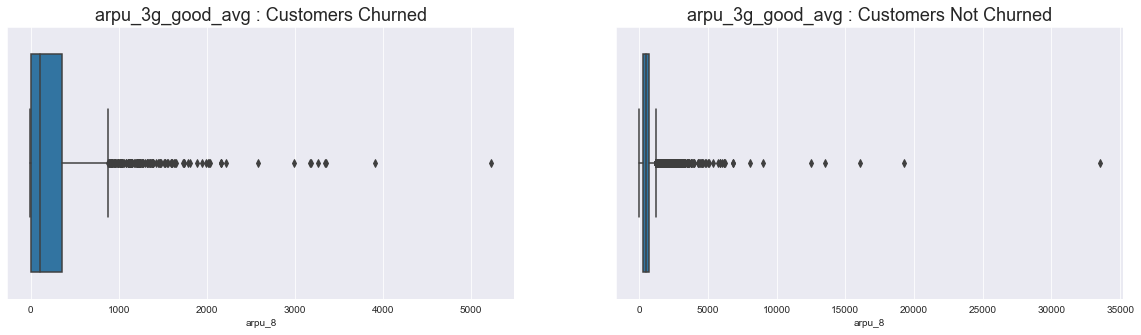

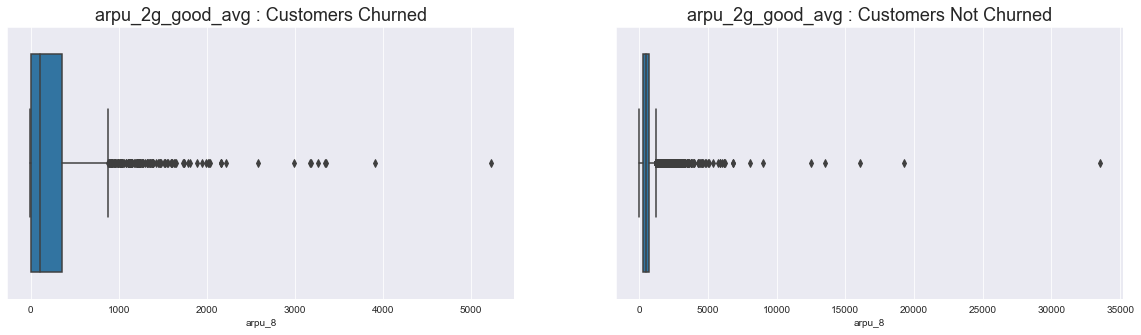

In [52]:
cols = final_df.columns

for col in cols:
    if col != "churn":
        plt.figure(figsize = (20,5))
        plt.subplot(1,2,1)
        plt.title(col + " : Customers Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 1])
        plt.subplot(1,2,2)
        plt.title(col + " : Customers Not Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 0])
        plt.show()

### Train Test Split

In [53]:
X = final_df.drop("churn", axis = 1)
y = final_df["churn"]

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42) # splitting the data

### MinMax Scaler

In [55]:
scaler = MinMaxScaler() # using MinMaxScaler() to scale all the features

cols = X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
337         0.069227  0.014194     0.004672      0.005046          0.007120   
20790       0.557218  0.021414     0.018769      0.032065          0.005268   
42083       0.773050  0.023460     0.000050      0.000000          0.000076   
95072       0.944279  0.032098     0.092012      0.002910          0.007170   
64915       0.450645  0.026883     0.018613      0.019495          0.028369   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
337            0.008971          0.033701          0.000000      0.018329   
20790          0.012015          0.000000          0.001649      0.015783   
42083          0.000000          0.000000          0.000000      0.000072   
95072          0.007947          0.000000          0.000000      0.013947   
64915          0.051829          0.000885          0.000000      0.073546   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  spl_og_mou_8  \
337            0.000000          0.000000      0.000323      0.000000   
20790          0.015327          0.026578      0.035065      0.010389   
42083          0.000000          0.000000      0.000000      0.000000   
95072          0.087400          0.000000      0.051245      0.000000   
64915          0.000000          0.000480      0.000471      0.000000   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
337          0.007643          0.002945          0.014967          0.006541   
20790        0.042243          0.008950          0.042438          0.000000   
42083        0.000029          0.024395          0.003252          0.000900   
95072        0.056154          0.005056          0.011770          0.031526   
64915        0.029855          0.057736          0.061665          0.055863   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
337        0.018802          0.000000          0.000000          0.001979   
20790      0.048594          0.000134          0.001358          0.000000   
42083      0.020484          0.000000          0.000000          0.000000   
95072      0.023984          0.000374          0.002372          0.002187   
64915      0.117196          0.000307          0.000243          0.007484   

       std_ic_mou_8  total_ic_mou_8  ic_others_8  total_rech_num_8  \
337        0.000731        0.020847      0.00000          0.020408   
20790      0.001159        0.064351      0.00086          0.061224   
42083      0.000000        0.020388      0.00000          0.020408   
95072      0.002954        0.027102      0.00000          0.061224   
64915      0.003227        0.118845      0.00000          0.020408   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
337            0.016074        0.044504            0.029220   
20790          0.017643        0.029220            0.000000   
42083          0.027150        0.056642            0.056642   
95072          0.035678        0.032592            0.000000   
64915          0.030189        0.036862            0.036862   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
337             0.000000         0.126770         0.022727   
20790                NaN              NaN              NaN   
42083           0.018519         0.161519         0.000000   
95072           0.018519         0.092664         0.000000   
64915           0.018519         0.104891         0.000000   

       av_rech_amt_data_8  vol_2g_mb_8  arpu_3g_8  arpu_2g_8       aon  \
337              0.048522     0.000049   0.005588   0.006997  0.300169   
20790                 NaN     0.000000        NaN        NaN  0.002173   
42083            0.123892     0.001259   0.132202   0.128528  0.662159   
95072            0.071182     0.001287   0.040560   0.041958  0.228930   
64915            0.080542     0.081684   0.085642   0.087198  0.548901   

       total_rech_amt_good_avg  arpu_good_avg  onnet_mou_good_avg  \
337  

In [61]:
X_test[cols] = scaler.transform(X_test[cols])

# head to confirm
X_test.head()

mobile_number    arpu_8   onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
39713   -2904.316093  0.000262  3.353985e-06  9.438610e-07      6.979878e-07   
80955   -2904.316093  0.000259  6.709834e-07  2.386349e-08      0.000000e+00   
80034   -2904.316093  0.000264  4.824090e-05  3.747276e-06      0.000000e+00   
93911   -2904.316093  0.000261  6.902942e-06  2.046322e-06      4.486394e-06   
55461   -2904.316093  0.000261  1.520021e-05  2.391035e-06      9.033059e-06   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
39713          0.000003          0.000000          0.000063      0.000003   
80955          0.000000          0.000000          0.000000      0.000000   
80034          0.000004          0.000011          0.000000      0.000004   
93911          0.000012          0.000090          0.000043      0.000015   
55461          0.000002          0.000003          0.000000      0.000010   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  spl_og_mou_8  \
39713          0.000003      4.705312e-07      0.000002      0.000016   
80955          0.000000      0.000000e+00      0.000000      0.000000   
80034          0.000045      1.306512e-06      0.000017      0.000000   
93911          0.000005      2.545861e-07      0.000002      0.000004   
55461          0.000011      2.167012e-06      0.000006      0.000000   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
39713        0.000002      2.591464e-06      3.796851e-06      6.340582e-08   
80955        0.000000      0.000000e+00      0.000000e+00      0.000000e+00   
80034        0.000017      4.118387e-08      7.928959e-07      3.677538e-06   
93911        0.000004      5.078096e-06      5.858805e-06      8.781706e-06   
55461        0.000007      3.761460e-06      3.134231e-06      1.232054e-05   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
39713      0.000005      2.829448e-06      0.000000e+00      0.000000e+00   
80955      0.000000      0.000000e+00      0.000000e+00      0.000000e+00   
80034      0.000001      5.401209e-07      2.522186e-06      0.000000e+00   
93911      0.000009      8.481519e-07      7.731810e-07      0.000000e+00   
55461      0.000006      8.387659e-07      1.659746e-06      5.036701e-07   

       std_ic_mou_8  total_ic_mou_8   ic_others_8  total_rech_num_8  \
39713      0.000002        0.000006  0.000000e+00          0.001145   
80955      0.000000        0.000000  0.000000e+00          0.000078   
80034      0.000002        0.000003  0.000000e+00          0.000364   
93911      0.000001        0.000009  1.769414e-06          0.000104   
55461      0.000002        0.000007  1.776246e-07          0.000312   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
39713          0.000003        0.000003            0.000001   
80955          0.000000        0.000000            0.000000   
80034          0.000007        0.000015            0.000015   
93911          0.000002        0.000038            0.000000   
55461          0.000002        0.000007            0.000000   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
39713          -0.015775        -0.000625         0.004649   
80955                NaN              NaN              NaN   
80034                NaN              NaN              NaN   
93911                NaN              NaN              NaN   
55461          -0.018176        -0.000634         0.001033   

       av_rech_amt_data_8   vol_2g_mb_8  arpu_3g_8  arpu_2g_8       aon  \
39713           -0.000230  4.935225e-07   0.005730   0.007000 -0.043444   
80955                 NaN  0.000000e+00        NaN        NaN -0.043448   
80034                 NaN  0.000000e+00        NaN        NaN -0.043336   
93911                 NaN  0.000000e+00        NaN        NaN -0.043457   
55461           -0.000243  0.000000e+00   0.005721   0.006999 -0.043447   

       total_rech_amt_good_avg  arpu_good_avg  onnet_mou

In [62]:
X_train.describe(percentiles=(0.25,0.5, 0.75,0.9,0.95)) # confirming that the values are between 0 and 1 since we used MinMaxScaler

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  \
count   21007.000000  21007.000000  20347.000000  20347.000000   
mean        0.506100      0.027939      0.034001      0.028569   
std         0.283621      0.024237      0.057279      0.035532   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.264740      0.015336      0.003922      0.007819   
50%         0.509978      0.023630      0.013072      0.018402   
75%         0.750127      0.034941      0.038326      0.036369   
90%         0.896889      0.050974      0.091805      0.064152   
95%         0.948686      0.065880      0.139549      0.089016   
max         1.000000      1.000000      1.000000      1.000000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      20347.000000      20347.000000      20347.000000      20347.000000   
mean           0.016792          0.034691          0.011484          0.004965   
std            0.040332          0.048113          0.033479          0.021626   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.001332          0.005386          0.000000          0.000000   
50%            0.005806          0.019045          0.000538          0.000000   
75%            0.016598          0.046163          0.008594          0.000313   
90%            0.037844          0.084947          0.030111          0.012904   
95%            0.062963          0.118924          0.055072          0.026965   
max            1.000000          1.000000          1.000000          1.000000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  \
count  20347.000000      20347.000000      20347.000000  20347.000000   
mean       0.048273          0.021971          0.013912      0.026664   
std        0.063666          0.051847          0.031386      0.045503   
min        0.000000          0.000000          0.000000      0.000000   
25%        0.008188          0.000000          0.000034      0.000231   
50%        0.028198          0.000935          0.002039      0.006194   
75%        0.064489          0.017585          0.013190      0.036647   
90%        0.115304          0.071792          0.041416      0.078507   
95%        0.161720          0.118160          0.068019      0.112628   
max        1.000000          1.000000          1.000000      1.000000   

       spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
count  20347.000000    21007.000000      20347.000000      20347.000000   
mean       0.005047        0.044813          0.016840          0.027528   
std        0.016961        0.049032          0.039586          0.038332   
min        0.000000        0.000000          0.000000          0.000000   
25%        0.000000        0.013501          0.001993          0.005871   
50%        0.000489        0.031198          0.007067          0.016330   
75%        0.004716        0.060012          0.017931          0.035280   
90%        0.013242        0.100265          0.037403          0.063817   
95%        0.022090        0.135604          0.058773          0.090415   
max        1.000000        1.000000          1.000000          1.000000   

       loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
count      20347.000000  20347.000000      20347.000000      20347.000000   
mean           0.009584      0.041855          0.004528          0.010859   
std            0.028419      0.053782          0.020740          0.034729   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000      0.009915          0.000000          0.000080   
50%            0.001284      0.025891          0.000222          0.002202   
75%            0.007535      0.054012          0.002711          0.009287   
90%            0.023901      0.096286          0.009626          0.024526   
95%            0.044005      0.133838          0.018575          

In [63]:
for col in X_train.columns:
    print(col + " : " + str(np.isinf(X_train[col]).sum())) # Checking if any column has infinite value so that later it doesn't cause any issue

mobile_number : 0
arpu_8 : 0
onnet_mou_8 : 0
offnet_mou_8 : 0
loc_og_t2t_mou_8 : 0
loc_og_t2m_mou_8 : 0
loc_og_t2f_mou_8 : 0
loc_og_t2c_mou_8 : 0
loc_og_mou_8 : 0
std_og_t2t_mou_8 : 0
std_og_t2m_mou_8 : 0
std_og_mou_8 : 0
spl_og_mou_8 : 0
total_og_mou_8 : 0
loc_ic_t2t_mou_8 : 0
loc_ic_t2m_mou_8 : 0
loc_ic_t2f_mou_8 : 0
loc_ic_mou_8 : 0
std_ic_t2t_mou_8 : 0
std_ic_t2m_mou_8 : 0
std_ic_t2f_mou_8 : 0
std_ic_mou_8 : 0
total_ic_mou_8 : 0
ic_others_8 : 0
total_rech_num_8 : 0
total_rech_amt_8 : 0
max_rech_amt_8 : 0
last_day_rch_amt_8 : 0
total_rech_data_8 : 0
max_rech_data_8 : 0
count_rech_2g_8 : 0
av_rech_amt_data_8 : 0
vol_2g_mb_8 : 0
arpu_3g_8 : 0
arpu_2g_8 : 0
aon : 0
total_rech_amt_good_avg : 0
arpu_good_avg : 0
onnet_mou_good_avg : 0
offnet_mou_good_avg : 0
roam_ic_mou_good_avg : 0
roam_og_mou_good_avg : 0
loc_og_t2t_mou_good_avg : 0
loc_og_t2m_mou_good_avg : 0
loc_og_t2f_mou_good_avg : 0
loc_og_t2c_mou_good_avg : 0
loc_og_mou_good_avg : 0
std_og_t2t_mou_good_avg : 0
std_og_t2m_mou_good

## Modeling

### Interpretable Model

Using Logistic Regression to make an interpretable model.

#### Feature scaling using RFE

Getting top 15 columns from RFE to make the model

In [65]:
X_train_interpretable = X_train.copy()

logreg = LogisticRegression(class_weight= 'balanced') # as the churn (target variable) is imbalanced

rfe = RFE(logreg, 15) # getting top 15 columns from RFE to make the model
rfe = rfe.fit(X_train_interpretable,y_train)

rfe.support_

TypeError: __init__() takes 2 positional arguments but 3 were given

In [52]:
list(zip(X_train_interpretable.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 37),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 43),
 ('loc_og_t2c_mou_8', False, 32),
 ('loc_og_mou_8', False, 31),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 48),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 9),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 7),
 ('loc_ic_mou_8', False, 8),
 ('std_ic_t2t_mou_8', False, 33),
 ('std_ic_t2m_mou_8', False, 34),
 ('std_ic_t2f_mou_8', False, 39),
 ('std_ic_mou_8', False, 27),
 ('total_ic_mou_8', True, 1),
 ('ic_others_8', False, 42),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 11),
 ('max_rech_amt_8', False, 10),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('aon', False, 5),
 ('total_rech_amt_good_avg', True, 1),
 ('arpu_good_avg', False, 23),
 ('onnet_mou_good_avg', False, 3),
 ('o

In [53]:
col = X_train_interpretable.columns[rfe.support_] # Get the top 15 features

#### Model 1

In [54]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.3
Date:                Mon, 18 Jan 2021   Deviance:                       8150.7
Time:                        14:05:05   Pearson chi2:                 1.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5627      0.064     -8.821      0.000      -0.688      -0.438
onnet_mou_8                 2.9598      0.495      5.980      0.000       1.990       3.930
offnet_mou_8                2.1417      0.425      5.041      0.000       1.309       2.974
loc_og_t2m_mou_8           -1.0512      0.498     -2.111      0.035      -2.027      -0.075
std_og_t2t_mou_8           -4.4893      0.653     -6.875      0.000      -5.769      -3.210
std_og_t2m_mou_8           -3.4598      0.524     -6.604      0.000      -4.487      -2.433
std_og_mou_8                7.2395      1.076      6.731      0.000       5.131       9.348
total_og_mou_8             -7.4942      0.937     -7.997      0.000      -9.331      -5.658
loc_ic_t2m_mou_8           -1.3481      0.485     -2.780      0.005      -2.299      -0.398
total_ic_mou_8             -3.7013      0.430     -8.616      0.000      -4.543      -2.859
total_rech_num_8           -1.9816      0.178    -11.124      0.000      -2.331      -1.632
last_day_rch_amt_8         -2.4407      0.138    -17.647      0.000      -2.712      -2.170
vol_2g_mb_8                -1.9835      0.228     -8.692      0.000      -2.431      -1.536
total_rech_amt_good_avg     1.0963      0.130      8.452      0.000       0.842       1.350
std_og_mou_good_avg         0.8053      0.126      6.374      0.000       0.558       1.053
loc_ic_t2m_mou_good_avg     1.3084      0.196      6.678      0.000       0.924       1.692
===========================================================================================
"""

Checking VIF

In [55]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5              std_og_mou_8  61.65
6            total_og_mou_8  57.95
1              offnet_mou_8  34.27
3          std_og_t2t_mou_8  25.48
4          std_og_t2m_mou_8  23.42
0               onnet_mou_8  21.83
2          loc_og_t2m_mou_8  12.59
7          loc_ic_t2m_mou_8  12.41
8            total_ic_mou_8   7.28
14  loc_ic_t2m_mou_good_avg   6.90
13      std_og_mou_good_avg   4.58
12  total_rech_amt_good_avg   3.32
9          total_rech_num_8   3.02
10       last_day_rch_amt_8   2.07
11              vol_2g_mb_8   1.21

Removing std_og_mou_8 as the feature has a really high VIF value.

In [56]:
col = col.drop('std_og_mou_8',1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 2

In [57]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm2 = sm.GLM(y_train, X_train_interpretable[col], family = sm.families.Binomial())
res = logm2.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.7
Date:                Mon, 18 Jan 2021   Deviance:                       8279.5
Time:                        14:05:05   Pearson chi2:                 1.31e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
onnet_mou_8                 1.1488      0.436      2.636      0.008       0.295       2.003
offnet_mou_8                2.8212      0.406      6.951      0.000       2.026       3.617
loc_og_t2m_mou_8           -3.3826      0.402     -8.425      0.000      -4.169      -2.596
std_og_t2t_mou_8           -0.5897      0.356     -1.655      0.098      -1.288       0.109
std_og_t2m_mou_8           -1.7756      0.459     -3.867      0.000      -2.676      -0.876
total_og_mou_8             -2.4485      0.542     -4.519      0.000      -3.511      -1.387
loc_ic_t2m_mou_8           -0.9515      0.497     -1.913      0.056      -1.926       0.023
total_ic_mou_8             -4.7070      0.434    -10.834      0.000      -5.559      -3.855
total_rech_num_8           -2.6696      0.171    -15.634      0.000      -3.004      -2.335
last_day_rch_amt_8         -2.7270      0.133    -20.429      0.000      -2.989      -2.465
vol_2g_mb_8                -2.1305      0.230     -9.266      0.000      -2.581      -1.680
total_rech_amt_good_avg     0.9892      0.129      7.657      0.000       0.736       1.242
std_og_mou_good_avg         0.3591      0.113      3.165      0.002       0.137       0.582
loc_ic_t2m_mou_good_avg     0.8681      0.191      4.538      0.000       0.493       1.243
===========================================================================================
"""

Checking VIF

In [58]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              offnet_mou_8  32.45
5            total_og_mou_8  30.84
0               onnet_mou_8  15.49
4          std_og_t2m_mou_8  13.33
6          loc_ic_t2m_mou_8  12.40
2          loc_og_t2m_mou_8  11.38
7            total_ic_mou_8   7.25
3          std_og_t2t_mou_8   6.95
13  loc_ic_t2m_mou_good_avg   6.90
12      std_og_mou_good_avg   4.48
11  total_rech_amt_good_avg   3.32
8          total_rech_num_8   3.02
9        last_day_rch_amt_8   2.06
10              vol_2g_mb_8   1.21

Removing offnet_mou_8 as this feature has a really high VIF value.

In [59]:
col = col.drop("offnet_mou_8",1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 3

In [60]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4120.3
Date:                Mon, 18 Jan 2021   Deviance:                       8240.6
Time:                        14:05:06   Pearson chi2:                 1.15e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5821      0.064     -9.138      0.000      -0.707      -0.457
onnet_mou_8                 1.9395      0.431      4.504      0.000       1.095       2.784
loc_og_t2m_mou_8           -1.6450      0.355     -4.631      0.000      -2.341      -0.949
std_og_t2t_mou_8           -1.2917      0.328     -3.942      0.000      -1.934      -0.649
std_og_t2m_mou_8            0.5447      0.336      1.623      0.105      -0.113       1.203
total_og_mou_8             -3.0375      0.564     -5.387      0.000      -4.143      -1.932
loc_ic_t2m_mou_8           -1.0689      0.489     -2.184      0.029      -2.028      -0.110
total_ic_mou_8             -4.4828      0.433    -10.351      0.000      -5.332      -3.634
total_rech_num_8           -1.8744      0.172    -10.880      0.000      -2.212      -1.537
last_day_rch_amt_8         -2.2998      0.134    -17.111      0.000      -2.563      -2.036
vol_2g_mb_8                -1.9370      0.224     -8.652      0.000      -2.376      -1.498
total_rech_amt_good_avg     1.3215      0.125     10.557      0.000       1.076       1.567
std_og_mou_good_avg         0.8080      0.125      6.440      0.000       0.562       1.054
loc_ic_t2m_mou_good_avg     1.3572      0.196      6.936      0.000       0.974       1.741
===========================================================================================
"""

Checking VIF

In [61]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4            total_og_mou_8  25.07
0               onnet_mou_8  13.95
5          loc_ic_t2m_mou_8  12.37
6            total_ic_mou_8   7.25
2          std_og_t2t_mou_8   6.93
12  loc_ic_t2m_mou_good_avg   6.90
1          loc_og_t2m_mou_8   6.51
3          std_og_t2m_mou_8   6.49
11      std_og_mou_good_avg   4.47
10  total_rech_amt_good_avg   3.19
7          total_rech_num_8   3.00
8        last_day_rch_amt_8   2.05
9               vol_2g_mb_8   1.21

Removing total_og_mou_8 as it has a really high VIF value.

In [62]:
col = col.drop("total_og_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 4

In [63]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4137.2
Date:                Mon, 18 Jan 2021   Deviance:                       8274.3
Time:                        14:05:06   Pearson chi2:                 8.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5320      0.063     -8.441      0.000      -0.656      -0.408
onnet_mou_8                 0.2221      0.298      0.747      0.455      -0.361       0.805
loc_og_t2m_mou_8           -2.6195      0.301     -8.711      0.000      -3.209      -2.030
std_og_t2t_mou_8           -1.4616      0.301     -4.858      0.000      -2.051      -0.872
std_og_t2m_mou_8           -1.1003      0.158     -6.955      0.000      -1.410      -0.790
loc_ic_t2m_mou_8           -0.9494      0.491     -1.933      0.053      -1.912       0.013
total_ic_mou_8             -4.7881      0.436    -10.973      0.000      -5.643      -3.933
total_rech_num_8           -1.8987      0.172    -11.059      0.000      -2.235      -1.562
last_day_rch_amt_8         -2.3130      0.134    -17.261      0.000      -2.576      -2.050
vol_2g_mb_8                -1.9305      0.223     -8.647      0.000      -2.368      -1.493
total_rech_amt_good_avg     1.3171      0.124     10.612      0.000       1.074       1.560
std_og_mou_good_avg         0.7993      0.126      6.357      0.000       0.553       1.046
loc_ic_t2m_mou_good_avg     1.3914      0.196      7.103      0.000       1.007       1.775
===========================================================================================
"""

Checking VIF

In [64]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4          loc_ic_t2m_mou_8  12.36
0               onnet_mou_8   7.37
5            total_ic_mou_8   7.25
2          std_og_t2t_mou_8   6.93
11  loc_ic_t2m_mou_good_avg   6.86
10      std_og_mou_good_avg   4.47
1          loc_og_t2m_mou_8   3.86
9   total_rech_amt_good_avg   3.17
6          total_rech_num_8   2.99
3          std_og_t2m_mou_8   2.44
7        last_day_rch_amt_8   2.05
8               vol_2g_mb_8   1.21

Removing loc_ic_t2m_mou_8 as it has a really high VIF value.

In [65]:
col = col.drop("loc_ic_t2m_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'total_rech_amt_good_avg',
       'std_og_mou_good_avg', 'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 5

In [66]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.0
Date:                Mon, 18 Jan 2021   Deviance:                       8278.1
Time:                        14:05:06   Pearson chi2:                 8.65e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5318      0.063     -8.445      0.000      -0.655      -0.408
onnet_mou_8                 0.2757      0.295      0.935      0.350      -0.302       0.853
loc_og_t2m_mou_8           -2.8097      0.288     -9.757      0.000      -3.374      -2.245
std_og_t2t_mou_8           -1.5173      0.298     -5.084      0.000      -2.102      -0.932
std_og_t2m_mou_8           -1.1003      0.158     -6.961      0.000      -1.410      -0.791
total_ic_mou_8             -5.3633      0.334    -16.050      0.000      -6.018      -4.708
total_rech_num_8           -1.8950      0.172    -11.048      0.000      -2.231      -1.559
last_day_rch_amt_8         -2.3086      0.134    -17.235      0.000      -2.571      -2.046
vol_2g_mb_8                -1.9287      0.223     -8.645      0.000      -2.366      -1.491
total_rech_amt_good_avg     1.3264      0.124     10.688      0.000       1.083       1.570
std_og_mou_good_avg         0.8149      0.125      6.494      0.000       0.569       1.061
loc_ic_t2m_mou_good_avg     1.2186      0.175      6.982      0.000       0.877       1.561
===========================================================================================
"""

Checking VIF

In [67]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               onnet_mou_8  7.27
2          std_og_t2t_mou_8  6.83
4            total_ic_mou_8  4.76
10  loc_ic_t2m_mou_good_avg  4.54
9       std_og_mou_good_avg  4.46
1          loc_og_t2m_mou_8  3.38
8   total_rech_amt_good_avg  3.14
5          total_rech_num_8  2.98
3          std_og_t2m_mou_8  2.44
6        last_day_rch_amt_8  2.05
7               vol_2g_mb_8  1.21

As onnet_mou_8 still has a high VIF (Greater than 5), we'll drop this feature.

In [68]:
col = col.drop("onnet_mou_8",1)
col

Index(['loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 6

In [69]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit(class_weight = 'balanced')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.5
Date:                Mon, 18 Jan 2021   Deviance:                       8278.9
Time:                        14:05:07   Pearson chi2:                 8.47e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5293      0.063     -8.411      0.000      -0.653      -0.406
loc_og_t2m_mou_8           -2.7948      0.287     -9.723      0.000      -3.358      -2.231
std_og_t2t_mou_8           -1.2801      0.159     -8.076      0.000      -1.591      -0.969
std_og_t2m_mou_8           -1.1153      0.157     -7.089      0.000      -1.424      -0.807
total_ic_mou_8             -5.3295      0.332    -16.052      0.000      -5.980      -4.679
total_rech_num_8           -1.8711      0.169    -11.048      0.000      -2.203      -1.539
last_day_rch_amt_8         -2.2981      0.133    -17.233      0.000      -2.560      -2.037
vol_2g_mb_8                -1.9321      0.223     -8.660      0.000      -2.369      -1.495
total_rech_amt_good_avg     1.3395      0.123     10.866      0.000       1.098       1.581
std_og_mou_good_avg         0.8069      0.125      6.446      0.000       0.562       1.052
loc_ic_t2m_mou_good_avg     1.2078      0.174      6.935      0.000       0.866       1.549
===========================================================================================
"""

Checking VIF

In [70]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3           total_ic_mou_8  4.58
9  loc_ic_t2m_mou_good_avg  4.50
8      std_og_mou_good_avg  4.45
0         loc_og_t2m_mou_8  3.35
7  total_rech_amt_good_avg  3.06
4         total_rech_num_8  2.93
2         std_og_t2m_mou_8  2.42
1         std_og_t2t_mou_8  2.31
5       last_day_rch_amt_8  2.03
6              vol_2g_mb_8  1.20

Since P-value for all features is lower than 0.05, and VIF is lower than 5, model has been created. Now predicting the training and test dataframes:

#### Prediction

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1) # Predicting the training set

In [72]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_Prob' : y_train_pred})

y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.102921
1      0    0.025520
2      0    0.023561
3      0    0.058727
4      0    0.000337

In [73]:
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0) # Using 0.5 as an example as the cut-off point

# Checking head for the predicted value
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.102921          0
1      0    0.025520          0
2      0    0.023561          0
3      0    0.058727          0
4      0    0.000337          0

Checking the overall accuracy of the cut-off being 0.5

In [74]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9227400390346076


Overall accuracy of this model with cut-off being 0.5 is 92%. Will now check the confusion matrix, sensitivity and specificity with 0.5. Then will go ahead to find the optimal cut-off point

#### Confusion Matrix, Sensitivity, Specificity

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
print(confusion)

[[18920   267]
 [ 1356   464]]


In [76]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [77]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.2549450549450549
-------- 
Specificity
0.9860843279303695


#### ROC Curve

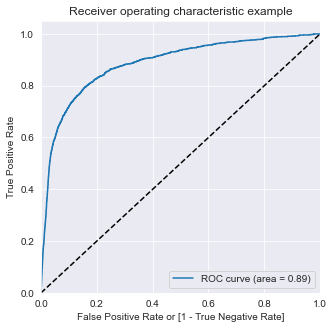

In [78]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])


Area under the curve is 0.89, which is very good. Sensitivity is really low, so will now find the optimal cut-off point to get better accuracy

#### Optimal Cut-Off Point

In [79]:
numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.102921          0    1    1    0    0    0    0    0    0    0   
1      0    0.025520          0    1    0    0    0    0    0    0    0    0   
2      0    0.023561          0    1    0    0    0    0    0    0    0    0   
3      0    0.058727          0    1    0    0    0    0    0    0    0    0   
4      0    0.000337          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

Now calculating accuracy, sensitivity and specificity for all the above cut-off points

In [80]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensitivity", "specificity"])

numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.086638     1.000000     0.000000
0.1   0.1  0.830342     0.801648     0.833064
0.2   0.2  0.897510     0.687912     0.917392
0.3   0.3  0.918646     0.605495     0.948350
0.4   0.4  0.928357     0.471978     0.971647
0.5   0.5  0.922740     0.254945     0.986084
0.6   0.6  0.919551     0.131319     0.994319
0.7   0.7  0.916742     0.062637     0.997759
0.8   0.8  0.914552     0.020879     0.999322
0.9   0.9  0.913410     0.000549     1.000000


Plotting accuracy, sensitivity and specificity

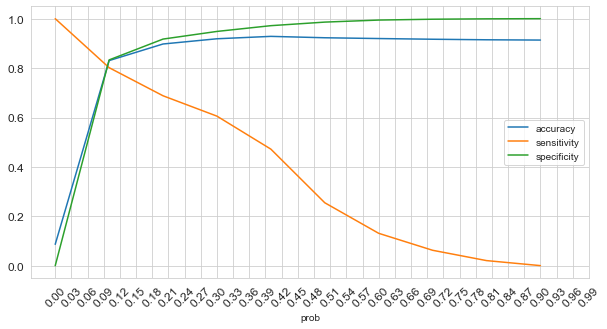

In [81]:
# Plotting accuracy, sensitivity and specificity for various possibilities above

sns.set_style("whitegrid") 

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.03), size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()


From above graph, it can be observed that the optimal cut-off point seems to be 0.1

In [82]:
y_train_pred_final["FinalPredicted"] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.1 else 0)

Checking Accuracy, Confusion Matrix, Sensitivity and Specificity of the final predicted (i.e. cut-off point being 0.1)

In [83]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.FinalPredicted))

0.8303422668634265


In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])
print(confusion)

[[15984  3203]
 [  361  1459]]


In [85]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [86]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8016483516483517
-------- 
Specificity
0.8330640537864179


It can be observed from above that even though the accuracy dropped, the sensitivity has increased vastly. In this case, high sensitivity is required since the prediction is for the users who would churn. With this optimal cut-off point i.e. 0.1, will predict more churned customers (maybe even some that won't churn), which will be better.

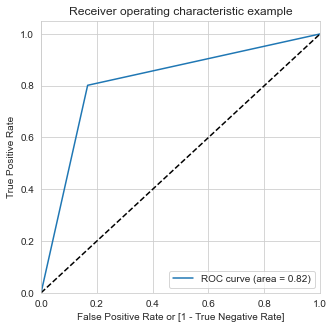

In [87]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])


#### Prediction on Test Dataset

In [88]:
X_test_interpretable = X_test.copy()

X_test_interpretable = X_test_interpretable[col] # only the columns that we have from out training model
X_test_interpretable.head()

loc_og_t2m_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  total_ic_mou_8  \
39713          0.144827          0.209870          0.095459        0.215733   
80955          0.000000          0.000000          0.000000        0.000000   
80034          0.178103          1.000000          0.265058        0.109642   
93911          0.503546          0.341714          0.051649        0.340712   
55461          0.082446          0.777492          0.439632        0.236833   

       total_rech_num_8  last_day_rch_amt_8  vol_2g_mb_8  \
39713          1.000000            0.099206     0.148815   
80955          0.107143            0.000000     0.000000   
80034          0.500000            1.000000     0.000000   
93911          0.142857            0.000000     0.000000   
55461          0.428571            0.000000     0.000000   

       total_rech_amt_good_avg  std_og_mou_good_avg  loc_ic_t2m_mou_good_avg  
39713                 0.145060             0.167005                 0.272126  
80955                 1.000000             1.000000                 0.034691  
80034                 1.000000             0.188270                 0.000343  
93911                 0.369157             0.092289                 0.255060  
55461                 0.224578             0.435875                 0.178056

In [89]:
X_test_sm = sm.add_constant(X_test_interpretable)

y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
39713  0.014952
80955  0.811303
80034  0.007182
93911  0.025637
55461  0.031013

In [90]:
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

churn  Churn_Prob
0      0    0.014952
1      1    0.811303
2      0    0.007182
3      0    0.025637
4      0    0.031013

In [91]:
y_pred_final['FinalPredicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0) # as our cut-off point was 0.1, we'll use that to predict our test dataset as well
y_pred_final.head()

churn  Churn_Prob  FinalPredicted
0      0    0.014952               0
1      1    0.811303               1
2      0    0.007182               0
3      0    0.025637               0
4      0    0.031013               0

#### Checking Accuracy, Confusion Matrix, Sensitivity and Specificity on the Test Dataset

In [92]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final["churn"], y_pred_final["FinalPredicted"])

0.8277432252332296

In [93]:
confusion2 = metrics.confusion_matrix(y_pred_final["churn"], y_pred_final["FinalPredicted"] )
confusion2

array([[6854, 1377],
       [ 174,  599]], dtype=int64)

In [94]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [95]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8016483516483517
-------- 
Specificity
0.8330640537864179


Comparing the training dataset and test dataset, below are the metrics:
1. Accuracy for training : 83.03% and Accuracy for testing : 82.77% 
2. Sensitivity for training : 80.16% and Sensitivity for testing : 80.16%
3. Specificity for training : 83.3% and Specificity for testing : 83.3%

#### Feature Importance

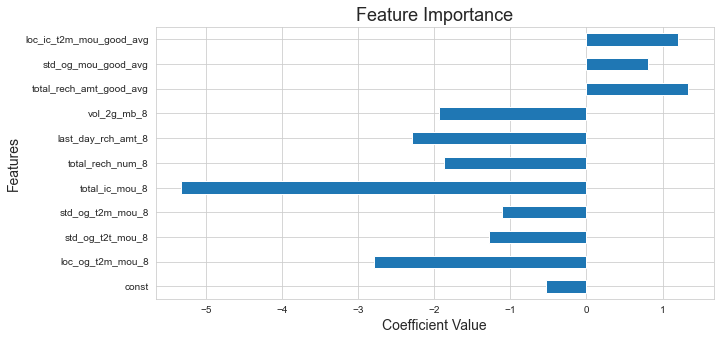

In [142]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.show()

From the coefficient graph above, it can be observerd that the top 3 features to decide if a customer will churn or not are below:
1. total_ic_mou_8 : -5.3295
2. loc_og_t2m_mou_8 : -2.7948
3. last_day_rch_amt_8 : -2.2981

### High Performance Models

Using PCA from the Statsmodels library to reduce the dimensions and then creating 3 high performance models in the order:
1. Logistic Regression
2. Random Forest
3. XGBoost

Based on their accuracy and confusion matrix, will select the best performing model.

### PCA

In [96]:
pca = PCA(random_state = 42)


In [98]:
pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()


array([0.18958225, 0.33317866, 0.40195417, 0.45746652, 0.51154641,
       0.55161439, 0.58592845, 0.61836544, 0.64654446, 0.67305194,
       0.6982361 , 0.72209158, 0.74463114, 0.76398452, 0.78179275,
       0.79917881, 0.81421936, 0.82886024, 0.8424089 , 0.85530787,
       0.86754095, 0.87853539, 0.88763219, 0.89658957, 0.90489461,
       0.91291611, 0.92065862, 0.92768454, 0.93453461, 0.94060106,
       0.94646531, 0.95205517, 0.95656006, 0.96070968, 0.96472822,
       0.96841907, 0.97203745, 0.97543979, 0.97837045, 0.98111608,
       0.98368151, 0.98595042, 0.98806623, 0.98969959, 0.99120493,
       0.99266389, 0.99377462, 0.99470153, 0.9955726 , 0.99628182,
       0.99680796, 0.99727774, 0.99773019, 0.99812248, 0.99848563,
       0.99884518, 0.99917167, 0.99943616, 0.99964095, 0.99978744,
       0.9999148 , 1.        ])

From the cumulative sum of the explained variance above, it can be observed that after 82%, the addition of the variance is low. So taking the value of 0.82, using the scree plot below will decide the optimal number of components

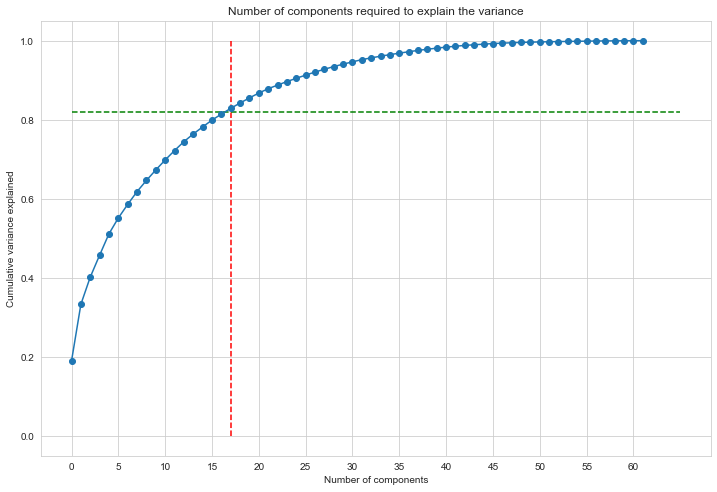

In [99]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)


fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.82, xmax=65, xmin=0, colors="g", linestyles="--")
plt.xticks(np.arange(0,65,step=5))
plt.plot(var_cumu, marker = 'o')
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.title("Number of components required to explain the variance")
plt.show()

So the optimal number of PCA is 17.

In [101]:
pca_final = IncrementalPCA(n_components = 17)
# Incremental PCA doesn't build all the components. It only builds until n_components whereas PCA builds all and then take the top n_components. 
# Since we don't require all the PCA components, we're using Incremental PCA

X_train_PCA = pca_final.fit_transform(X_train)
X_train_PCA.shape

(21007, 17)

In [102]:
X_test_PCA = pca_final.transform(X_test)
X_test_PCA.shape

(9004, 17)

Writing a function to get the accuracy and confusion matrix for training and test dataset that can be called after predicting the datasets using each high performance model

In [103]:
# evaluating the models on the trained test and the test set

def evaluate_model(classifier):
    print("Train Accuracy :", metrics.accuracy_score(y_train, classifier.predict(X_train_PCA)))
    print("Train Confusion Matrix:")
    print(metrics.confusion_matrix(y_train, classifier.predict(X_train_PCA)))
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, classifier.predict(X_test_PCA)))
    print("Test Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, classifier.predict(X_test_PCA)))

### Logistic Regression

In [104]:
LogRegPCA = LogisticRegression(class_weight = "balanced")
Model_PCA = LogRegPCA.fit(X_train_PCA, y_train)

Making Predictions

In [105]:
evaluate_model(Model_PCA)

Train Accuracy : 0.8219165040224687
Train Confusion Matrix:
[[15787  3400]
 [  341  1479]]
--------------------------------------------------
Test Accuracy : 0.8260772989782319
Test Confusion Matrix:
[[6812 1419]
 [ 147  626]]


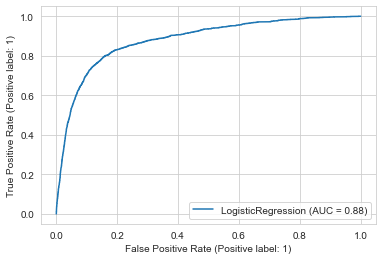

In [106]:
plot_roc_curve(Model_PCA, X_train_PCA, y_train)
plt.show()

### Random Forest

In [107]:
rf = RandomForestClassifier(random_state = 42, class_weight = "balanced", n_jobs = -1)

params = {
    "max_depth" : [5, 7, 10, 12, 14],
    "min_samples_leaf" : [5, 10, 15, 20, 50, 100, 500, 1000],
    "criterion" : ["gini","entropy"],
    "n_estimators" : [10,15,20,25,30,40,50,100],
    "max_features": ["auto", "sqrt", "log2"]
}


grid_search = model_selection.GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = 1,
                          scoring = "accuracy")

In [108]:
%%time

grid_search.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits
Wall time: 25min 33s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 12, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 100, 500,
                                              1000],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [109]:
grid_search.best_score_

0.9154566884804737

In [110]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

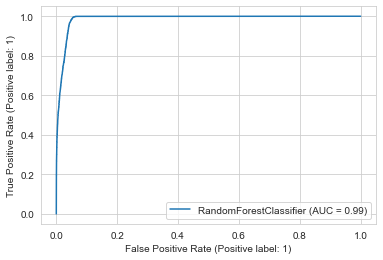

In [111]:
plot_roc_curve(rf_best, X_train_PCA, y_train)
plt.show()

In [112]:
evaluate_model(rf_best)

Train Accuracy : 0.9581568048745657
Train Confusion Matrix:
[[18406   781]
 [   98  1722]]
--------------------------------------------------
Test Accuracy : 0.9141492669924478
Test Confusion Matrix:
[[7781  450]
 [ 323  450]]


### XGBoost

In [113]:
xgb_model = xgb.XGBClassifier(class_weight = "balanced")

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator = xgb_model, 
                                       param_grid = parameters, 
                                       n_jobs=-1, cv=4, 
                                       scoring = scorer, 
                                       verbose = 1, 
                                       refit=True)

In [114]:
%%time
clf_xgb.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
[15:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 7min 48s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [115]:
clf_xgb.best_score_


0.8857157825258588

In [116]:
xg_best = clf_xgb.best_estimator_
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=19, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

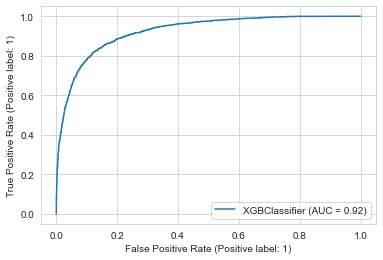

In [117]:
plot_roc_curve(xg_best, X_train_PCA, y_train)
plt.show()

In [118]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xg_best.predict_proba(X_train_PCA)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg_best.predict_proba(X_test_PCA)[:, 1]))

AUC on train data by XGBoost = 0.9234149925229822
AUC on test data by XGBoost = 0.8827867008939636


## Conclusion and Final Remarks

* 1 interpretable model was created to see what factors are the most important for a customer to decide if they'd like to churn or not. 
* 3 high performance models were created using: Logistic Regression, Random Forest, and XGBoost. All the 3 models gave fairly high accuracy for training and test datasets.
* ***Random Forest Model*** works best on the data given and will be best to predict the future customers who could possibly churn. This model was **95% accurate** on the training set, and on the unseen test dataset accuract of **91%** was received, which is very high and good. Random Forest was also less computationally less expensive.
* From the **interpretable model** , the top 3 important features:
    1. total_ic_mou_8 : -5.3295
    2. loc_og_t2m_mou_8 : -2.7948
    3. last_day_rch_amt_8 : -2.2981

### Feature Importance Graph

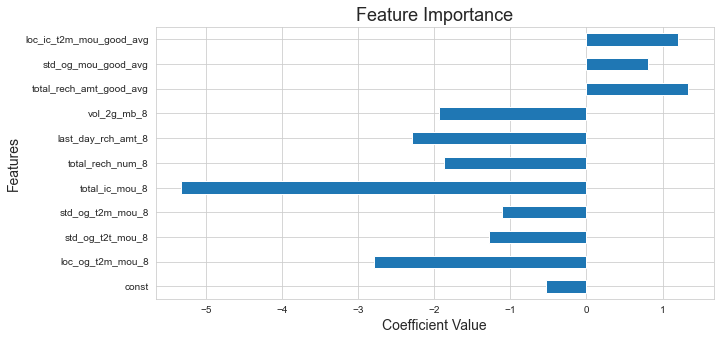

In [143]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.show()